# PyWGCNA with E-MEXP-728 (non-filtered)

In [1]:
import PyWGCNA
print(PyWGCNA.__file__)

/home/ribei027/miniconda3/envs/pywgcna3/lib/python3.9/site-packages/PyWGCNA/__init__.py


## Setting up the data and preprocessing
Starting with the transposed dataset related to the top 2000 most deviating genes calculated by MAD

In [2]:
geneExp = "../data/E-MEXP-728/eMEXP728_non-filtered.csv"
PyWGCNA_728_non_filt = PyWGCNA.WGCNA(name='E-MEXP-728',
                                  species='arabidopsis thaliana',
                                  geneExpPath=geneExp,
                                  outputPath='/home/ribei027/wgcna/analysis_notebooks/',
                                  save=True,
                             TPMcutoff=6)
PyWGCNA_728_non_filt.geneExpr.to_df().head(5)

Saving data to be True, checking requirements ...


AT2G42240  AT2G42250  AT2G42270  AT2G42280  AT2G42120  \
35D-0H-16C-A   6.794416   4.882643   6.472488   5.442943   8.041112   
35D-0H-16C-B   6.587965   4.817623   6.504620   5.169925   8.145677   
35D-2H-16C-A   6.525129   5.137504   6.193772   4.472488   7.964052   
37D-2H-16C-B   7.070389   4.921246   6.399171   4.977280   8.060696   
40D-5H-16C-A   6.617651   4.877744   6.442943   4.177918   7.719047   

              AT2G42130  AT2G42150  AT2G42160  AT2G42180  AT2G42100  ...  \
35D-0H-16C-A   8.277055   6.694880   5.307429   2.378512   3.217231  ...   
35D-0H-16C-B   8.106432   6.246028   6.089583   1.678072   3.232661  ...   
35D-2H-16C-A   7.923625   6.872829   6.046578   1.722466   2.981853  ...   
37D-2H-16C-B   8.113221   6.515700   6.346957   2.786596   1.765535  ...   
40D-5H-16C-A   7.643856   6.587965   5.852998   1.722466   1.536053  ...   

              AT3G06210  AT1G50680  AT1G50720  AT1G66480  AT1G54955  \
35D-0H-16C-A   6.155830   3.897240   1.485427   5.121015   1.321928   
35D-0H-16C-B   6.013462   3.459432   2.632268   4.832890   2.944858   
35D-2H-16C-A   6.050937   3.678072   1.432959   5.815063   2.536053   
37D-2H-16C-B   5.820179   1.632268   3.498251   5.371559   3.137504   
40D-5H-16C-A   6.419539   3.087463   3.104337   5.465974   1.963474   

              257585_at  AT1G50760  AT1G56310  AT1G30150  AT1G55050  
35D-0H-16C-A   2.321928   2.292782   7.271463   4.439623   4.857981  
35D-0H-16C-B   2.887525   3.292782   7.219169   2.000000   4.536053  
35D-2H-16C-A   2.765535   3.807355   6.311067   2.560715   3.277985  
37D-2H-16C-B   3.350497   2.827819   6.820179   4.121015   4.008989  
40D-5H-16C-A   1.485427   3.887525   6.617651   2.350497   3.560715  

[5 rows x 22553 columns]

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



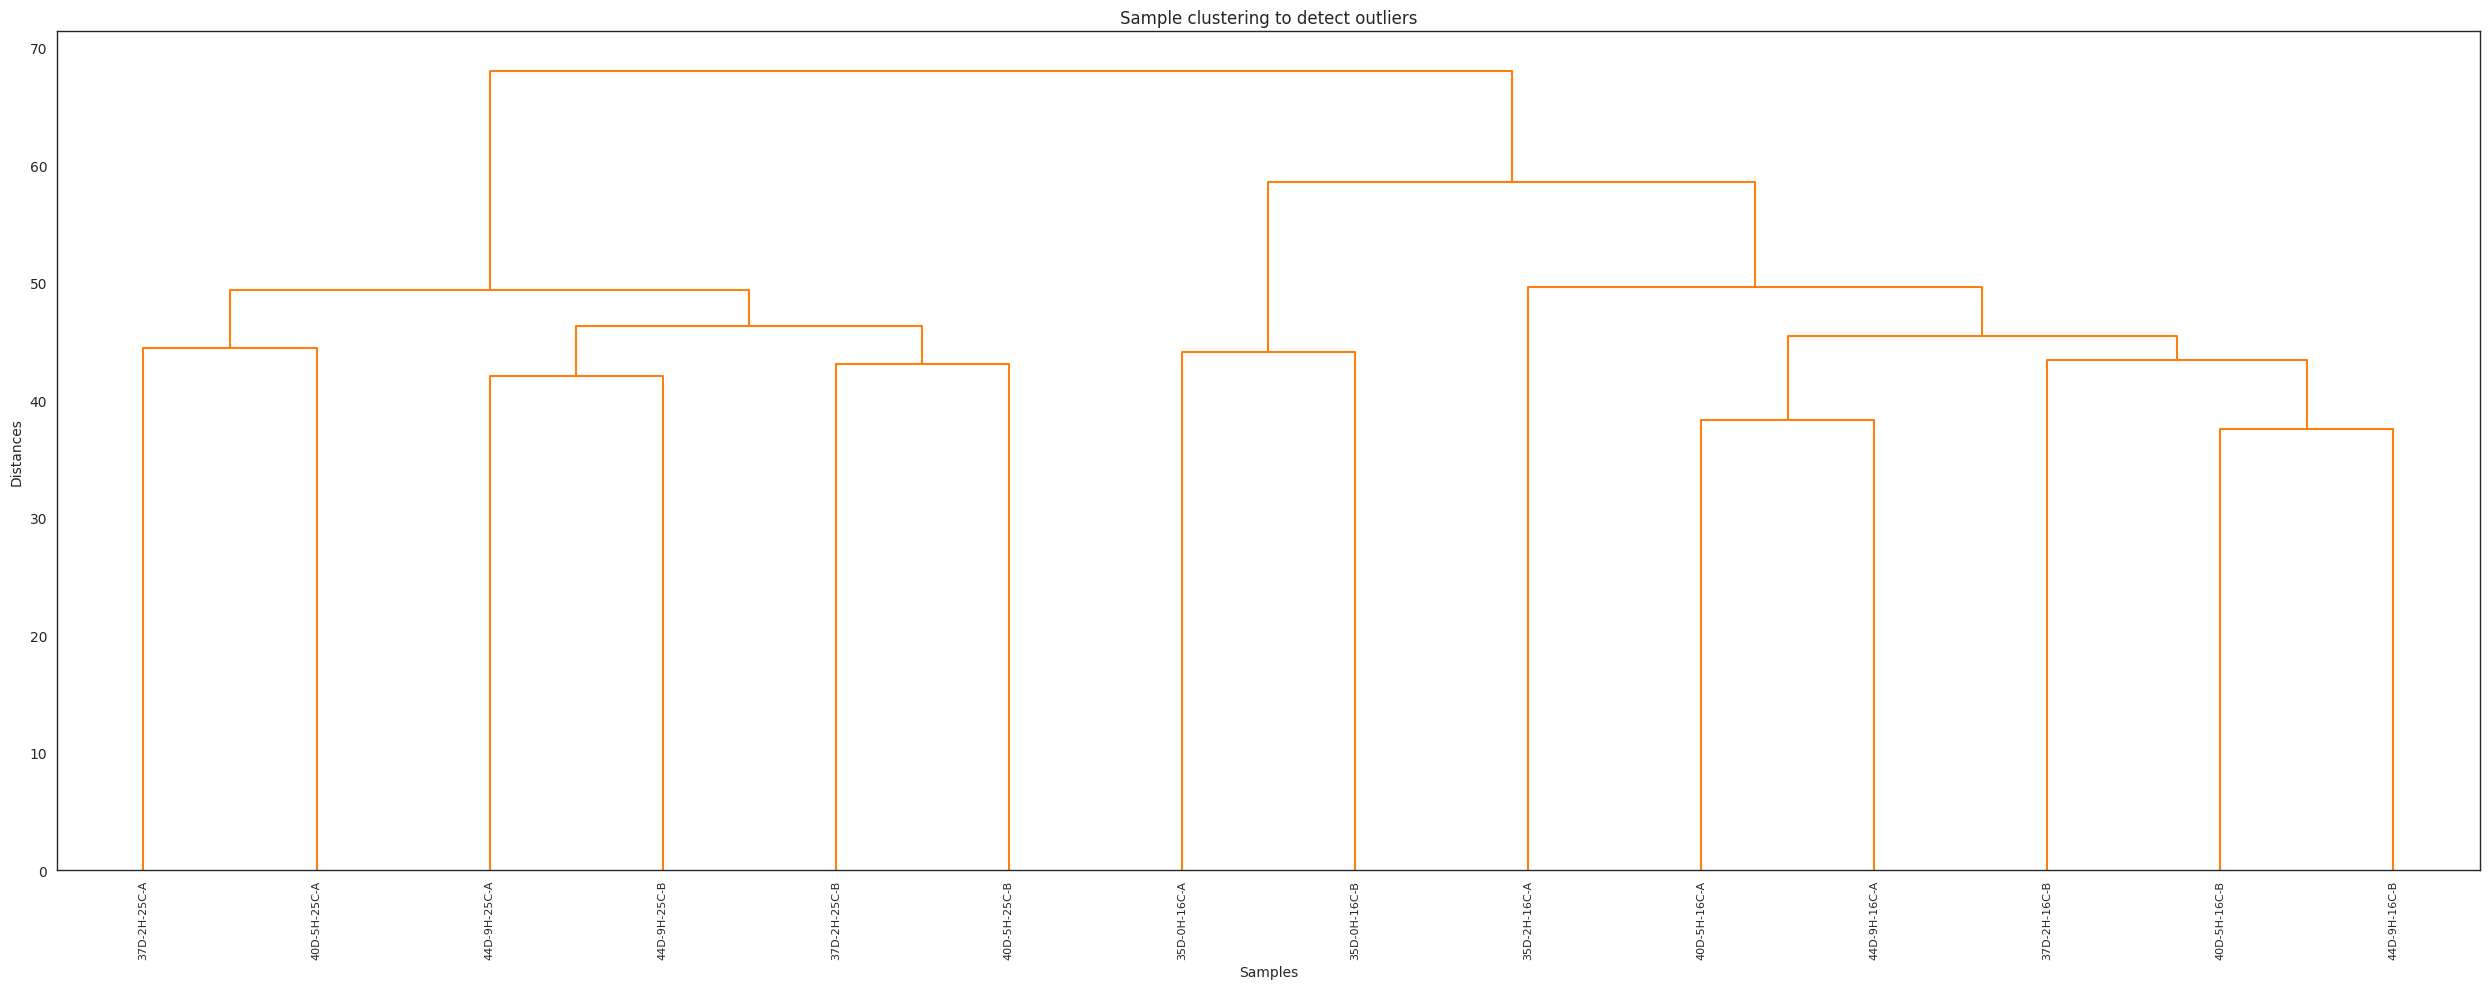

In [3]:
PyWGCNA_728_non_filt.preprocess()

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  3199
    Power  SFT.R.sq     slope truncated R.sq      mean(k)   median(k)  \
0       1  0.060183  0.666103       0.927702  2230.629397  2190.24558   
1       2  0.173414 -0.617567        0.94506  1033.674124  972.751016   
2       3  0.533771 -1.068566       0.956468   570.560187   503.91673   
3       4  0.692268 -1.298898       0.959981   349.726947  286.704912   
4       5  0.765431 -1.433931       0.965132   230.088147  174.083976   
5       6  0.795148 -1.519869       0.966515   159.357448  110.926291   
6       7  0.817551 -1.577333       0.970642   114.778261   73.415308   
7       8  0.830338 -1.621275       0.972197    85.267514   50.103097   
8       9  0.847545 -1.638337       0.979142    64.955484   34.896497   
9      10  0.855009 -1.661157       0.981889    50.523952   24.922782   
10     11  0.862056 -1.671684       0.984439    39.996241   18.172234   
11     13  0.870957 -

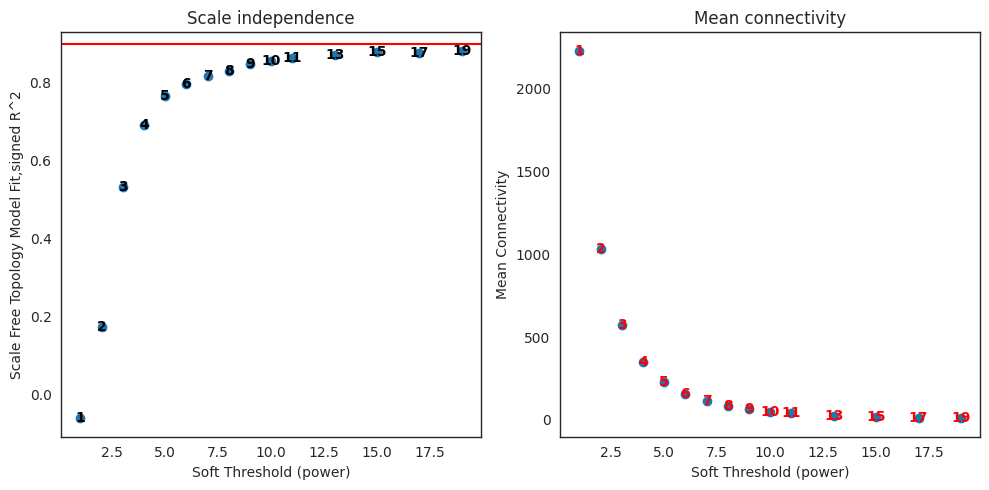

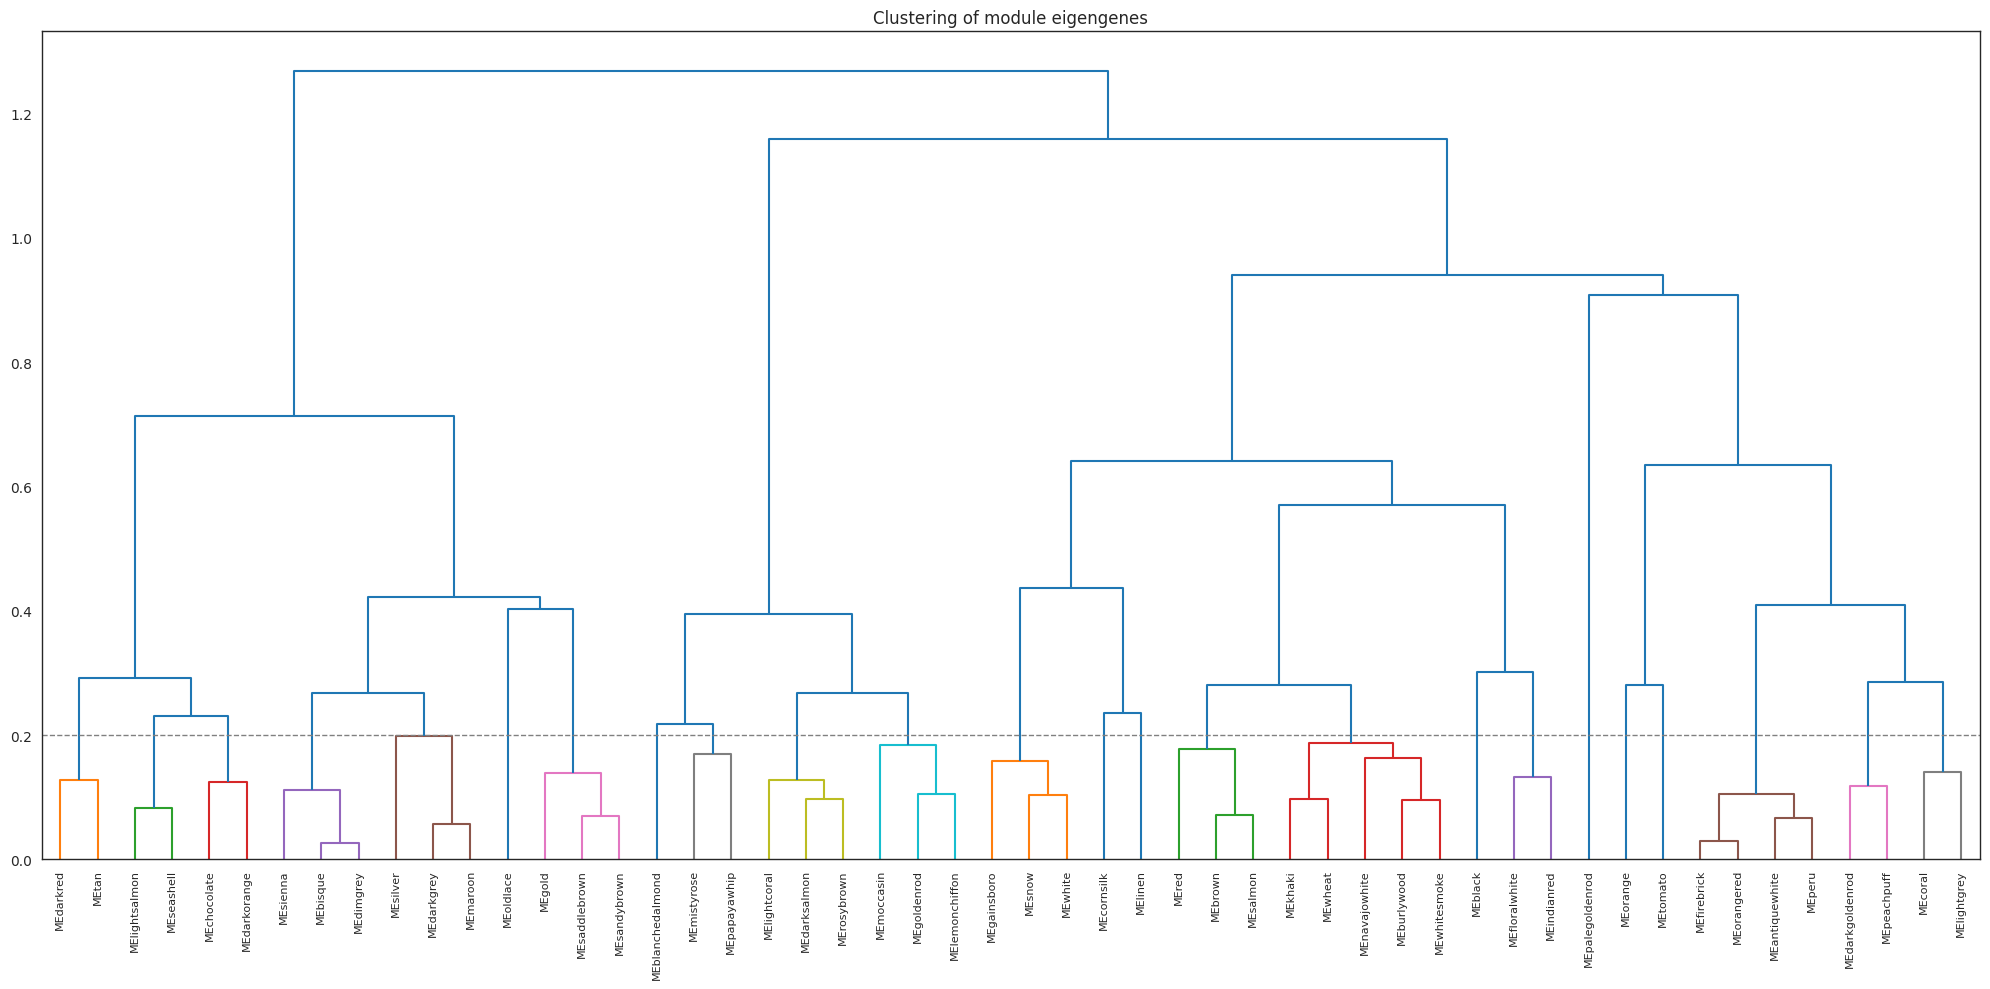

In [4]:
PyWGCNA_728_non_filt.findModules()

## Update metadata

In [5]:
PyWGCNA_728_non_filt.updateSampleInfo(path='../data/E-MEXP-728/eMEXP728SampleInfo.csv', sep=',')

# Add color to metadata

PyWGCNA_728_non_filt.setMetadataColor('Temperature', {'16c': 'blue',
                                              '25c': 'yellow'})

PyWGCNA_728_non_filt.setMetadataColor('Age', {'35d': 'thistle',
                                       '37d': 'plum',
                                       '40d': 'violet',
                                       '44d': 'purple'})

PyWGCNA_728_non_filt.setMetadataColor('Photoperiod', {'LD': 'red',
                                              'SD': 'green'})

PyWGCNA_728_non_filt.setMetadataColor('LeafNumber', {'22l': 'darkviolet',
                                              '29l': 'deeppink'})

In [6]:
geneList = PyWGCNA.getGeneList(dataset='athaliana_eg_gene',
                               attributes=['ensembl_gene_id',
                                           'external_gene_name',
                                           'gene_biotype'],
                               maps=['gene_id', 'gene_name', 'gene_biotype'])

PyWGCNA_728_non_filt.updateGeneInfo(geneList)

Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

plotting module heatmap eigengene...
	Done..

plotting module barplot eigengene...
	Done..

doing Enrichr GO analysis for each module...
No enrich terms when cutoff = 0.05 in module black
No enrich terms when cutoff = 0.05 in module blanchedalmond
No enrich terms when cutoff = 0.05 in module brown
No enrich terms when cutoff = 0.05 in module chocolate
No enrich terms when cutoff = 0.05 in module coral
No enrich terms when cutoff = 0.05 in module cornsilk
No enrich terms when cutoff = 0.05 in module darkgoldenrod
No enrich terms when cutoff = 0.05 in module darkred
No enrich terms when cutoff = 0.05 in module firebrick
No enrich terms when cutoff = 0.05 in module floralwhite
No enrich terms when cutoff = 0.05 in module gold
No enrich terms when cutoff = 0.05 in module lightcoral
No enrich terms when cutoff = 0.05 in module linen
No enrich te

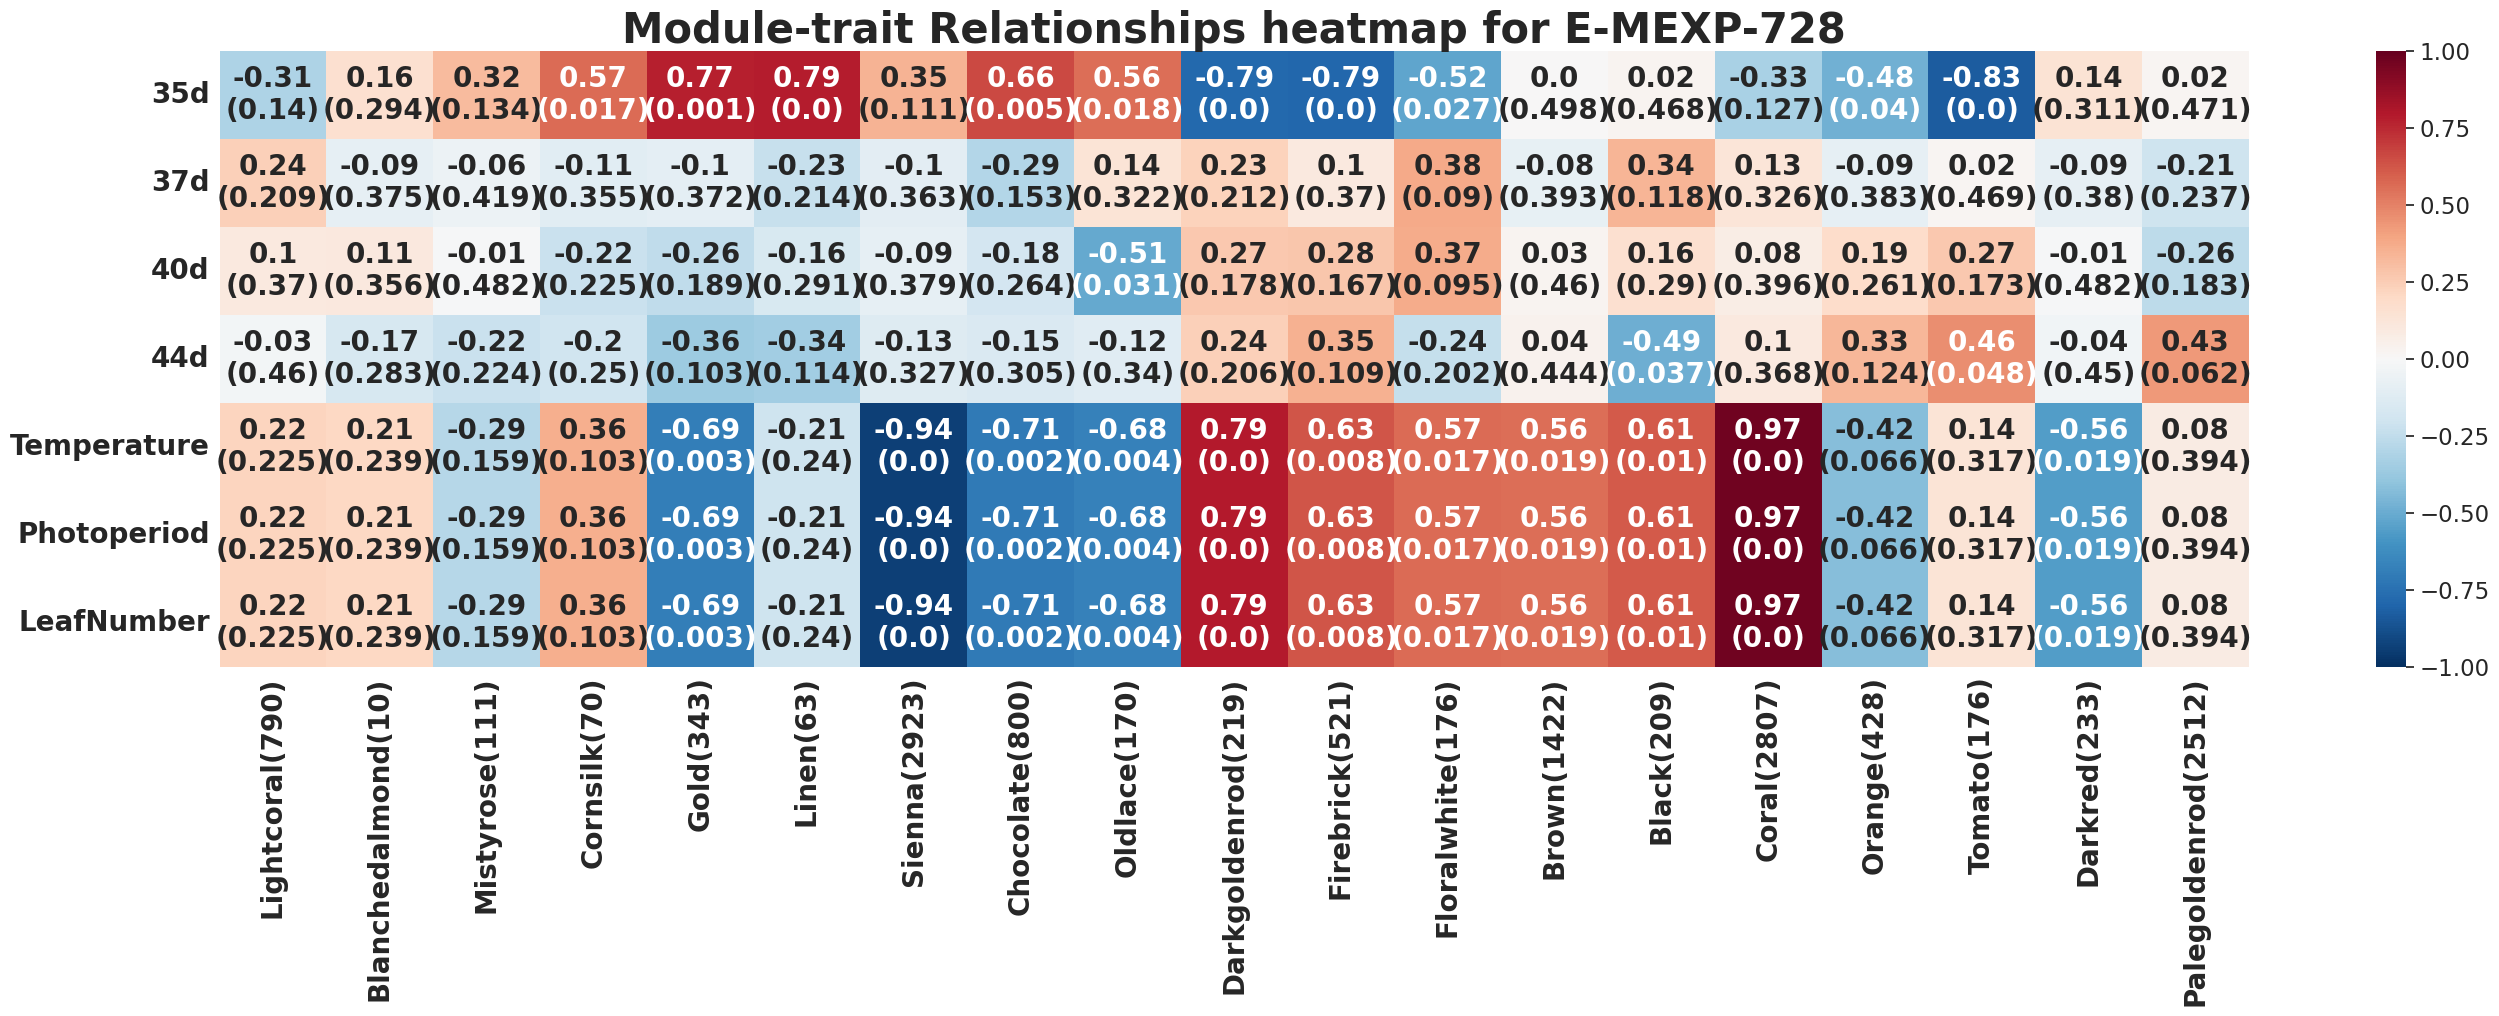

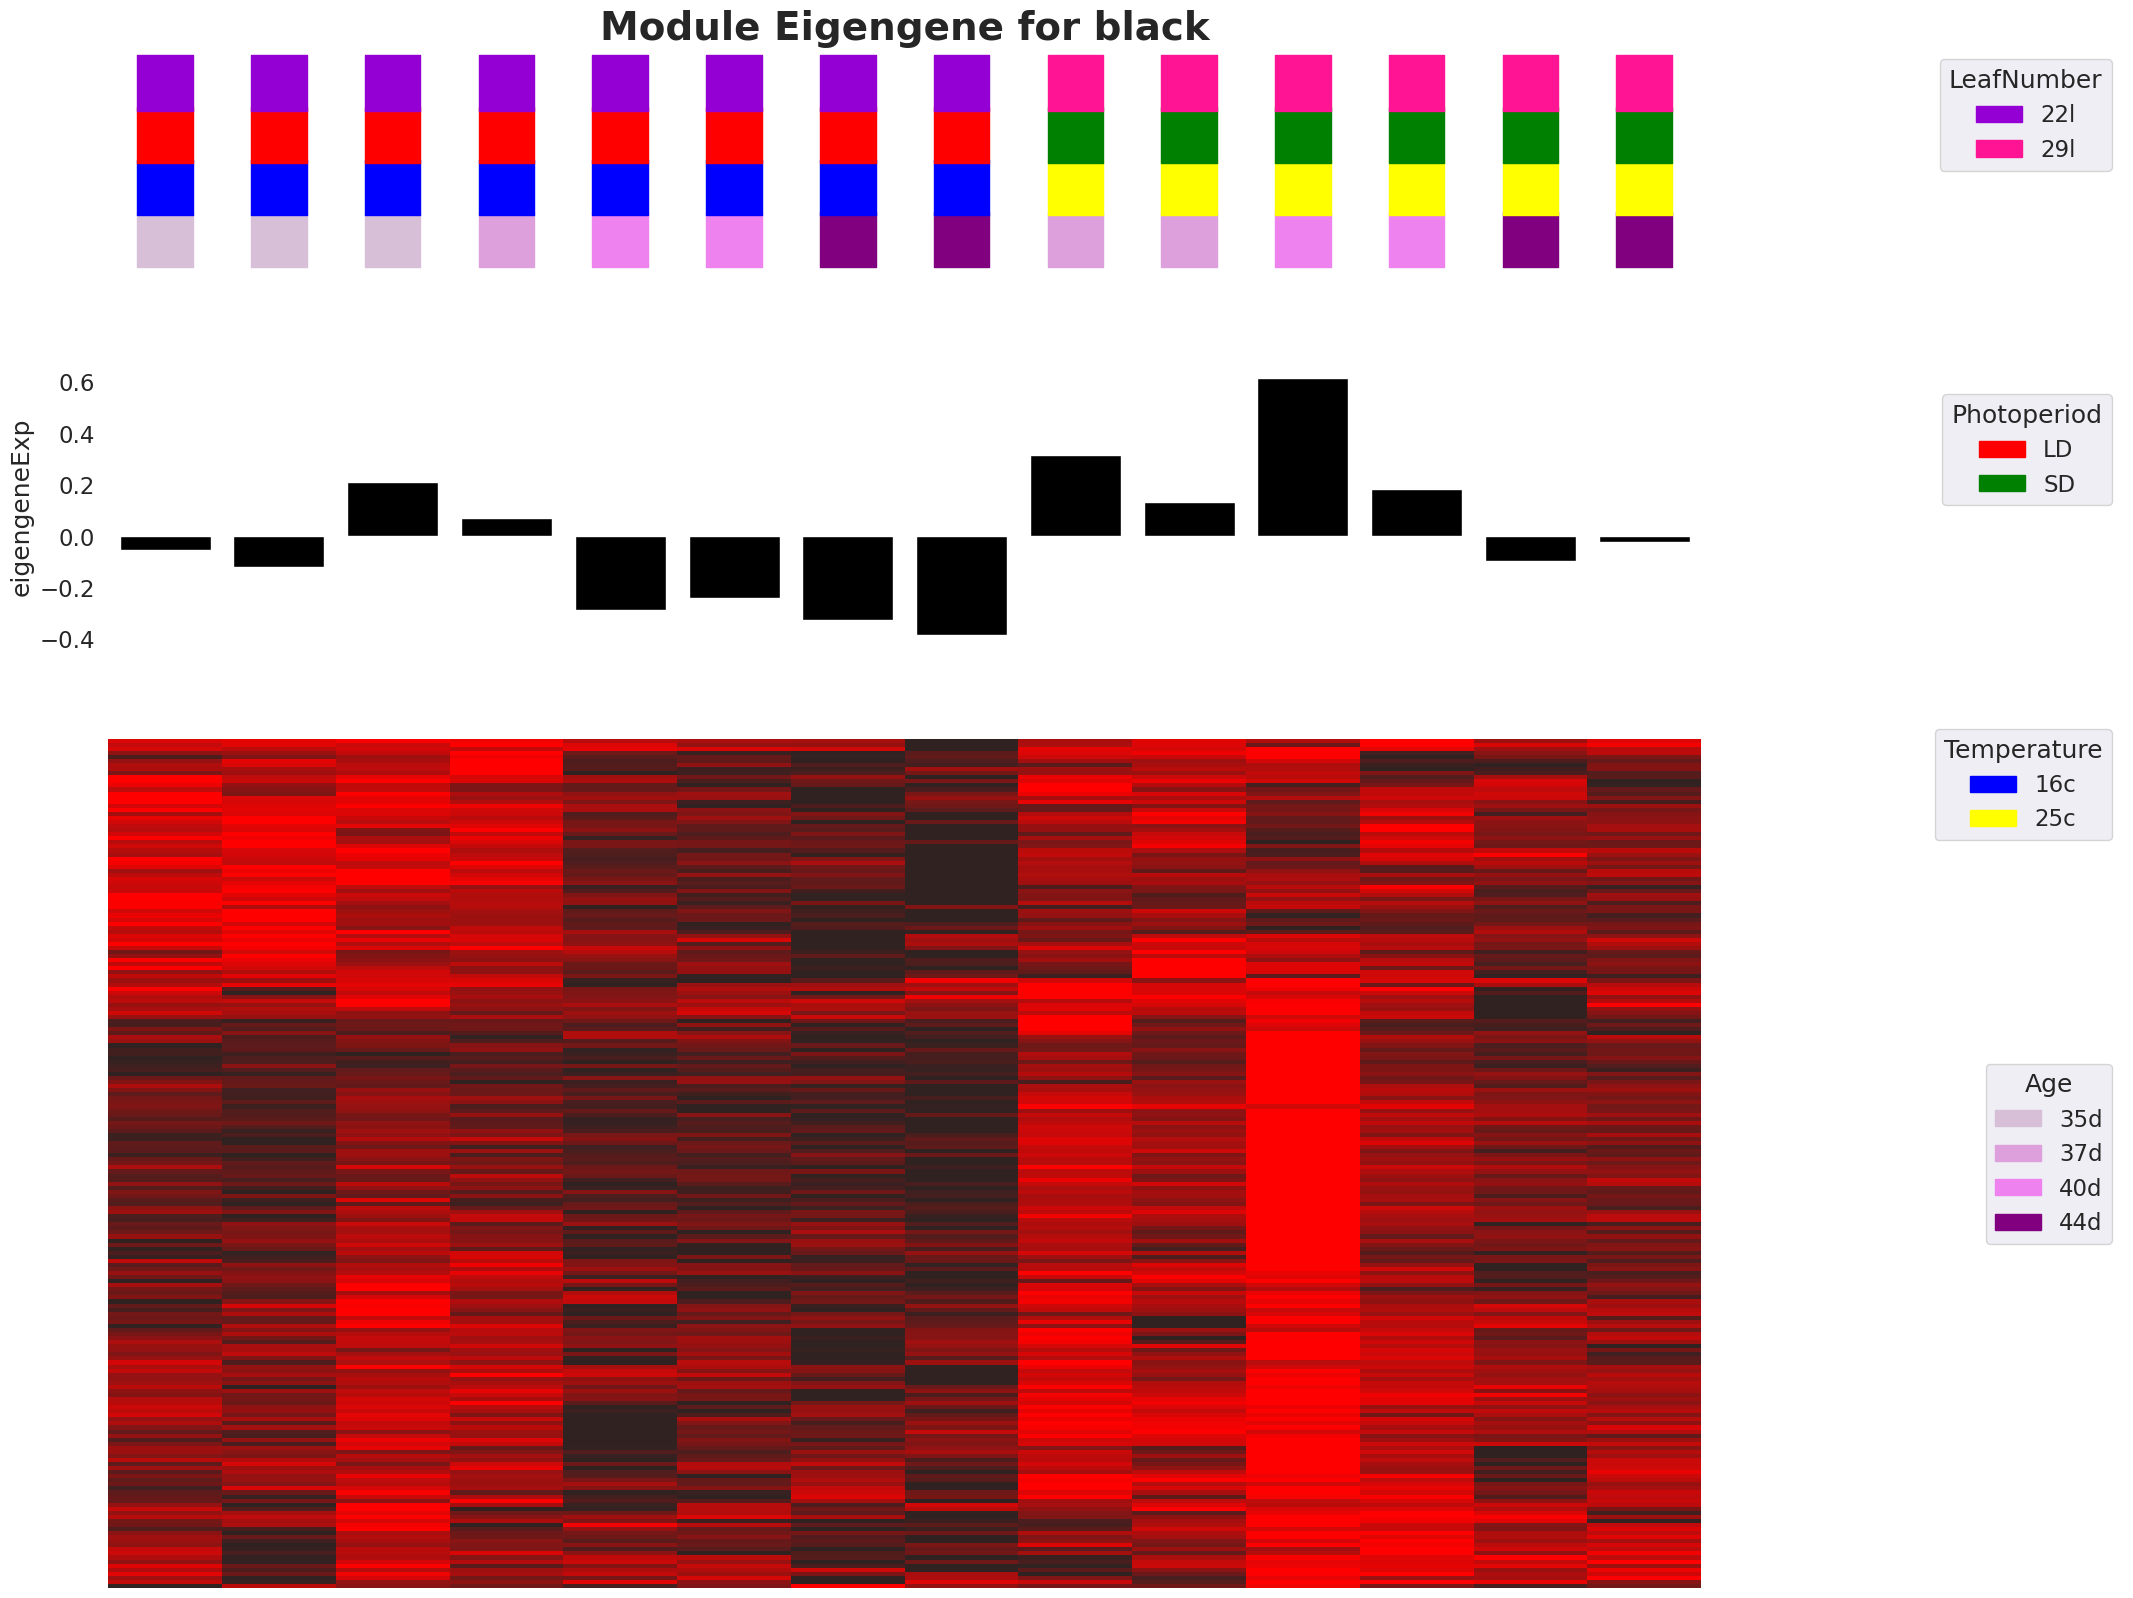

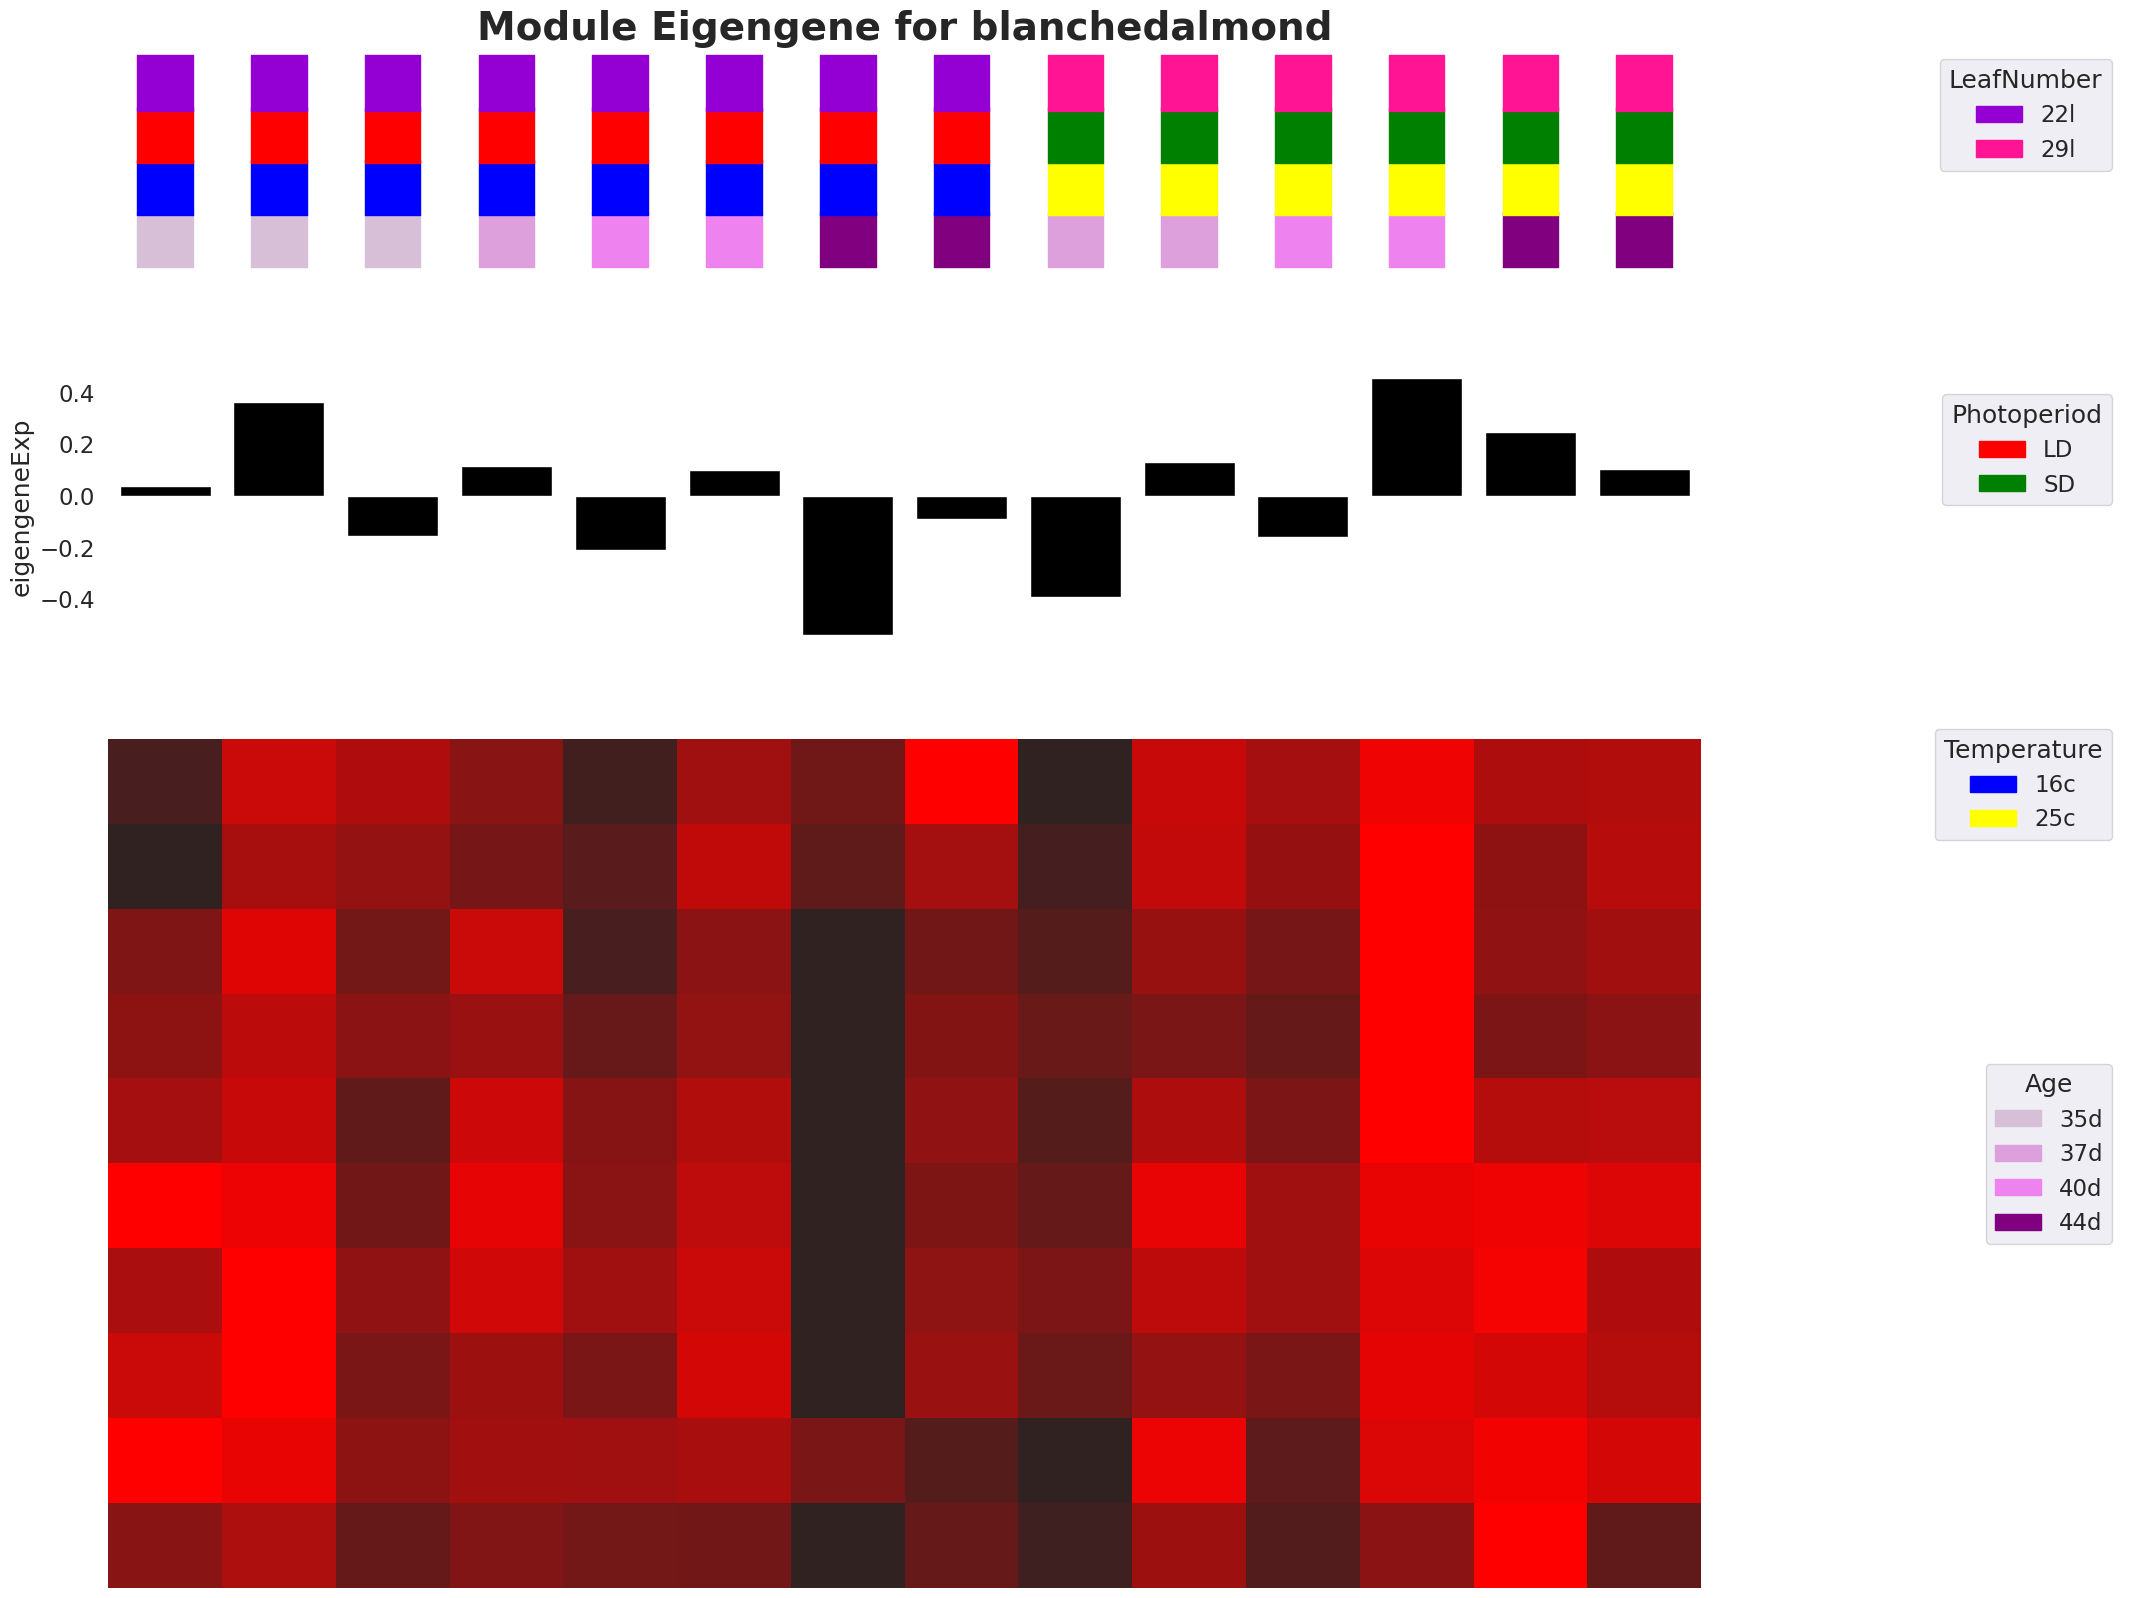

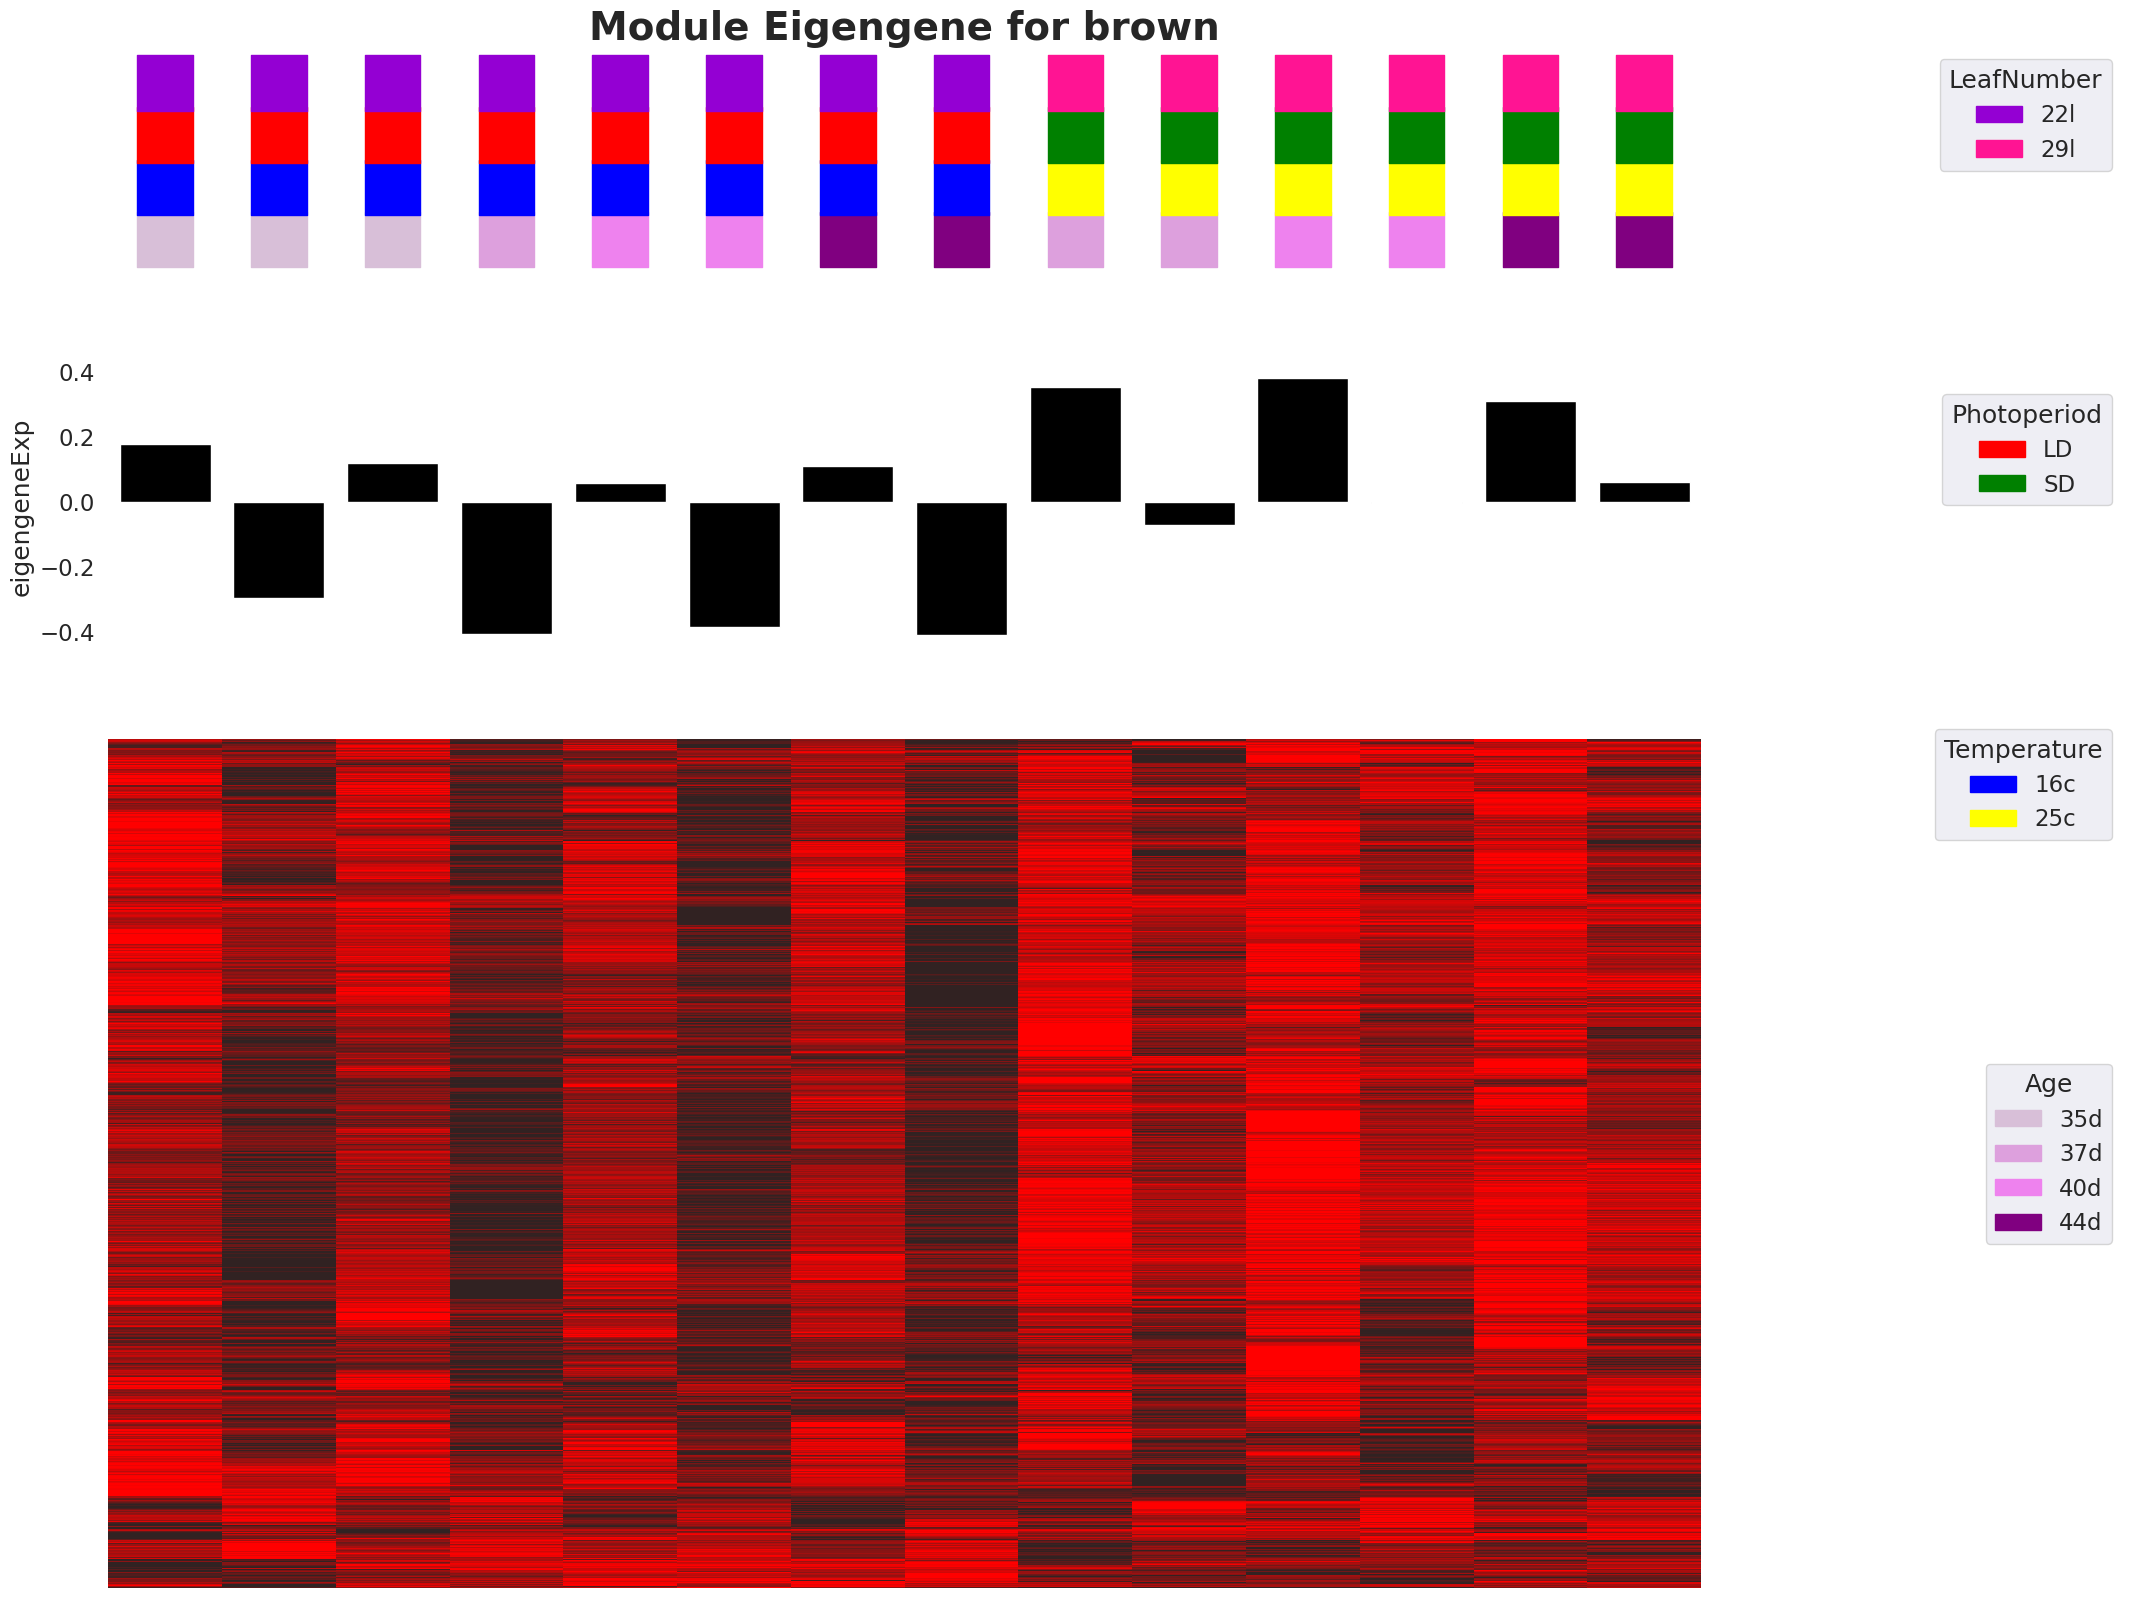

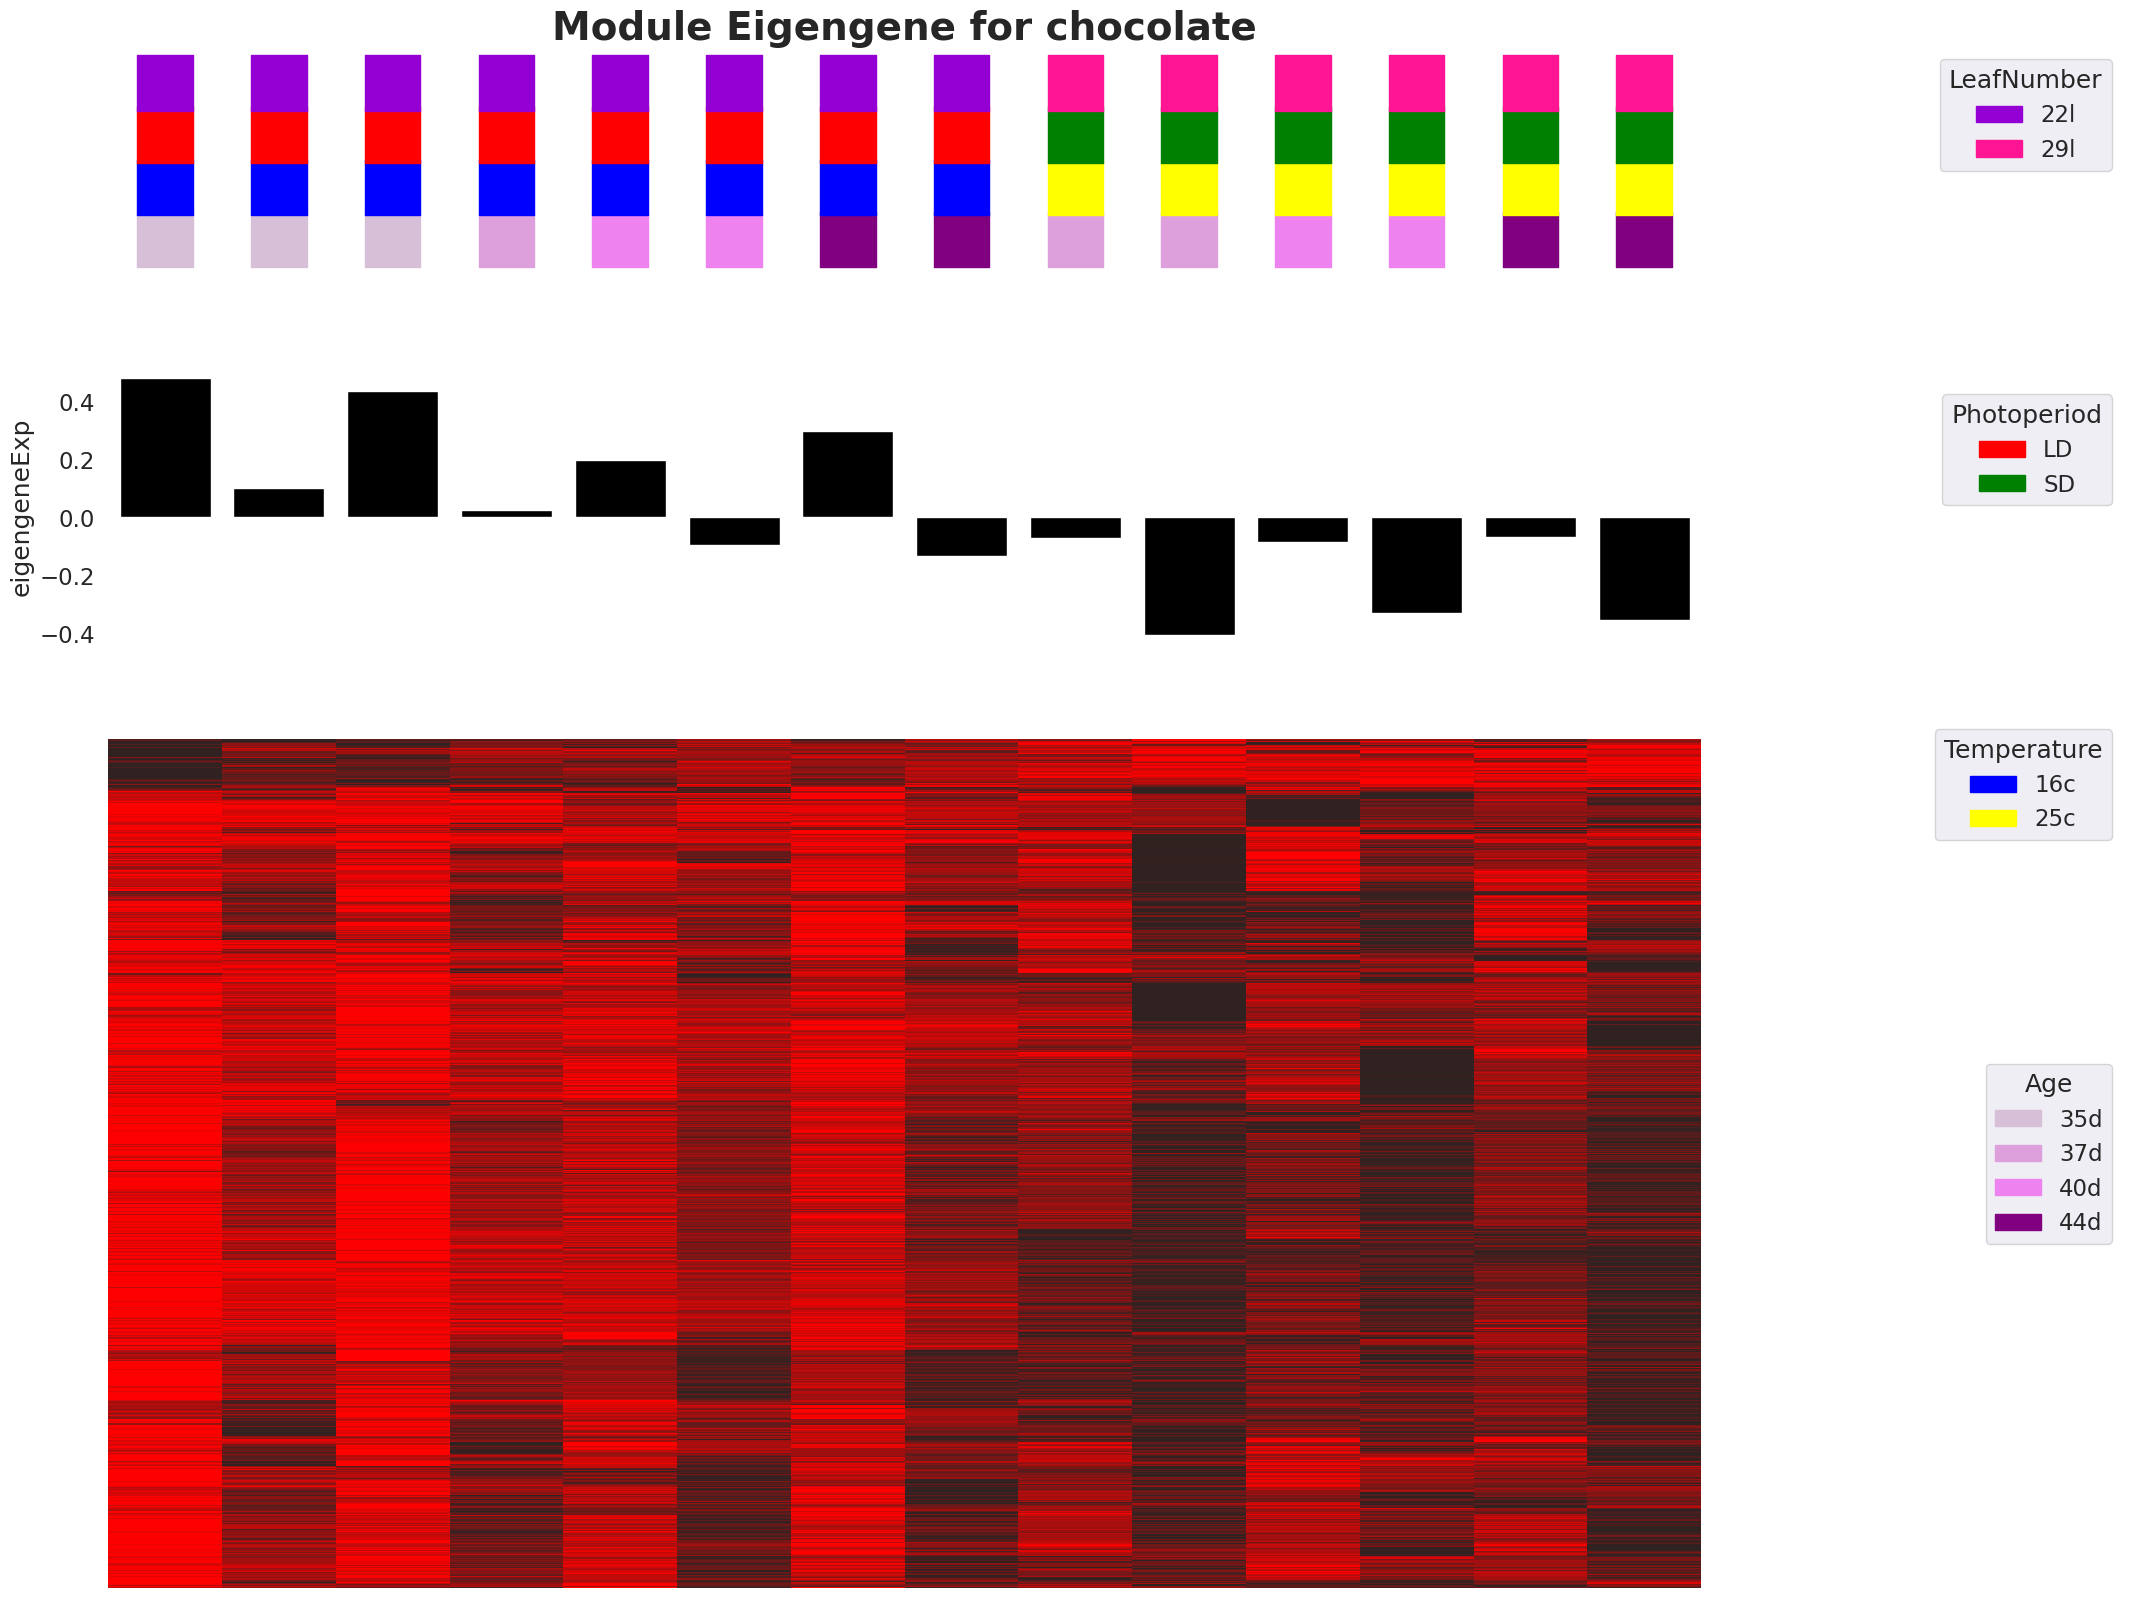

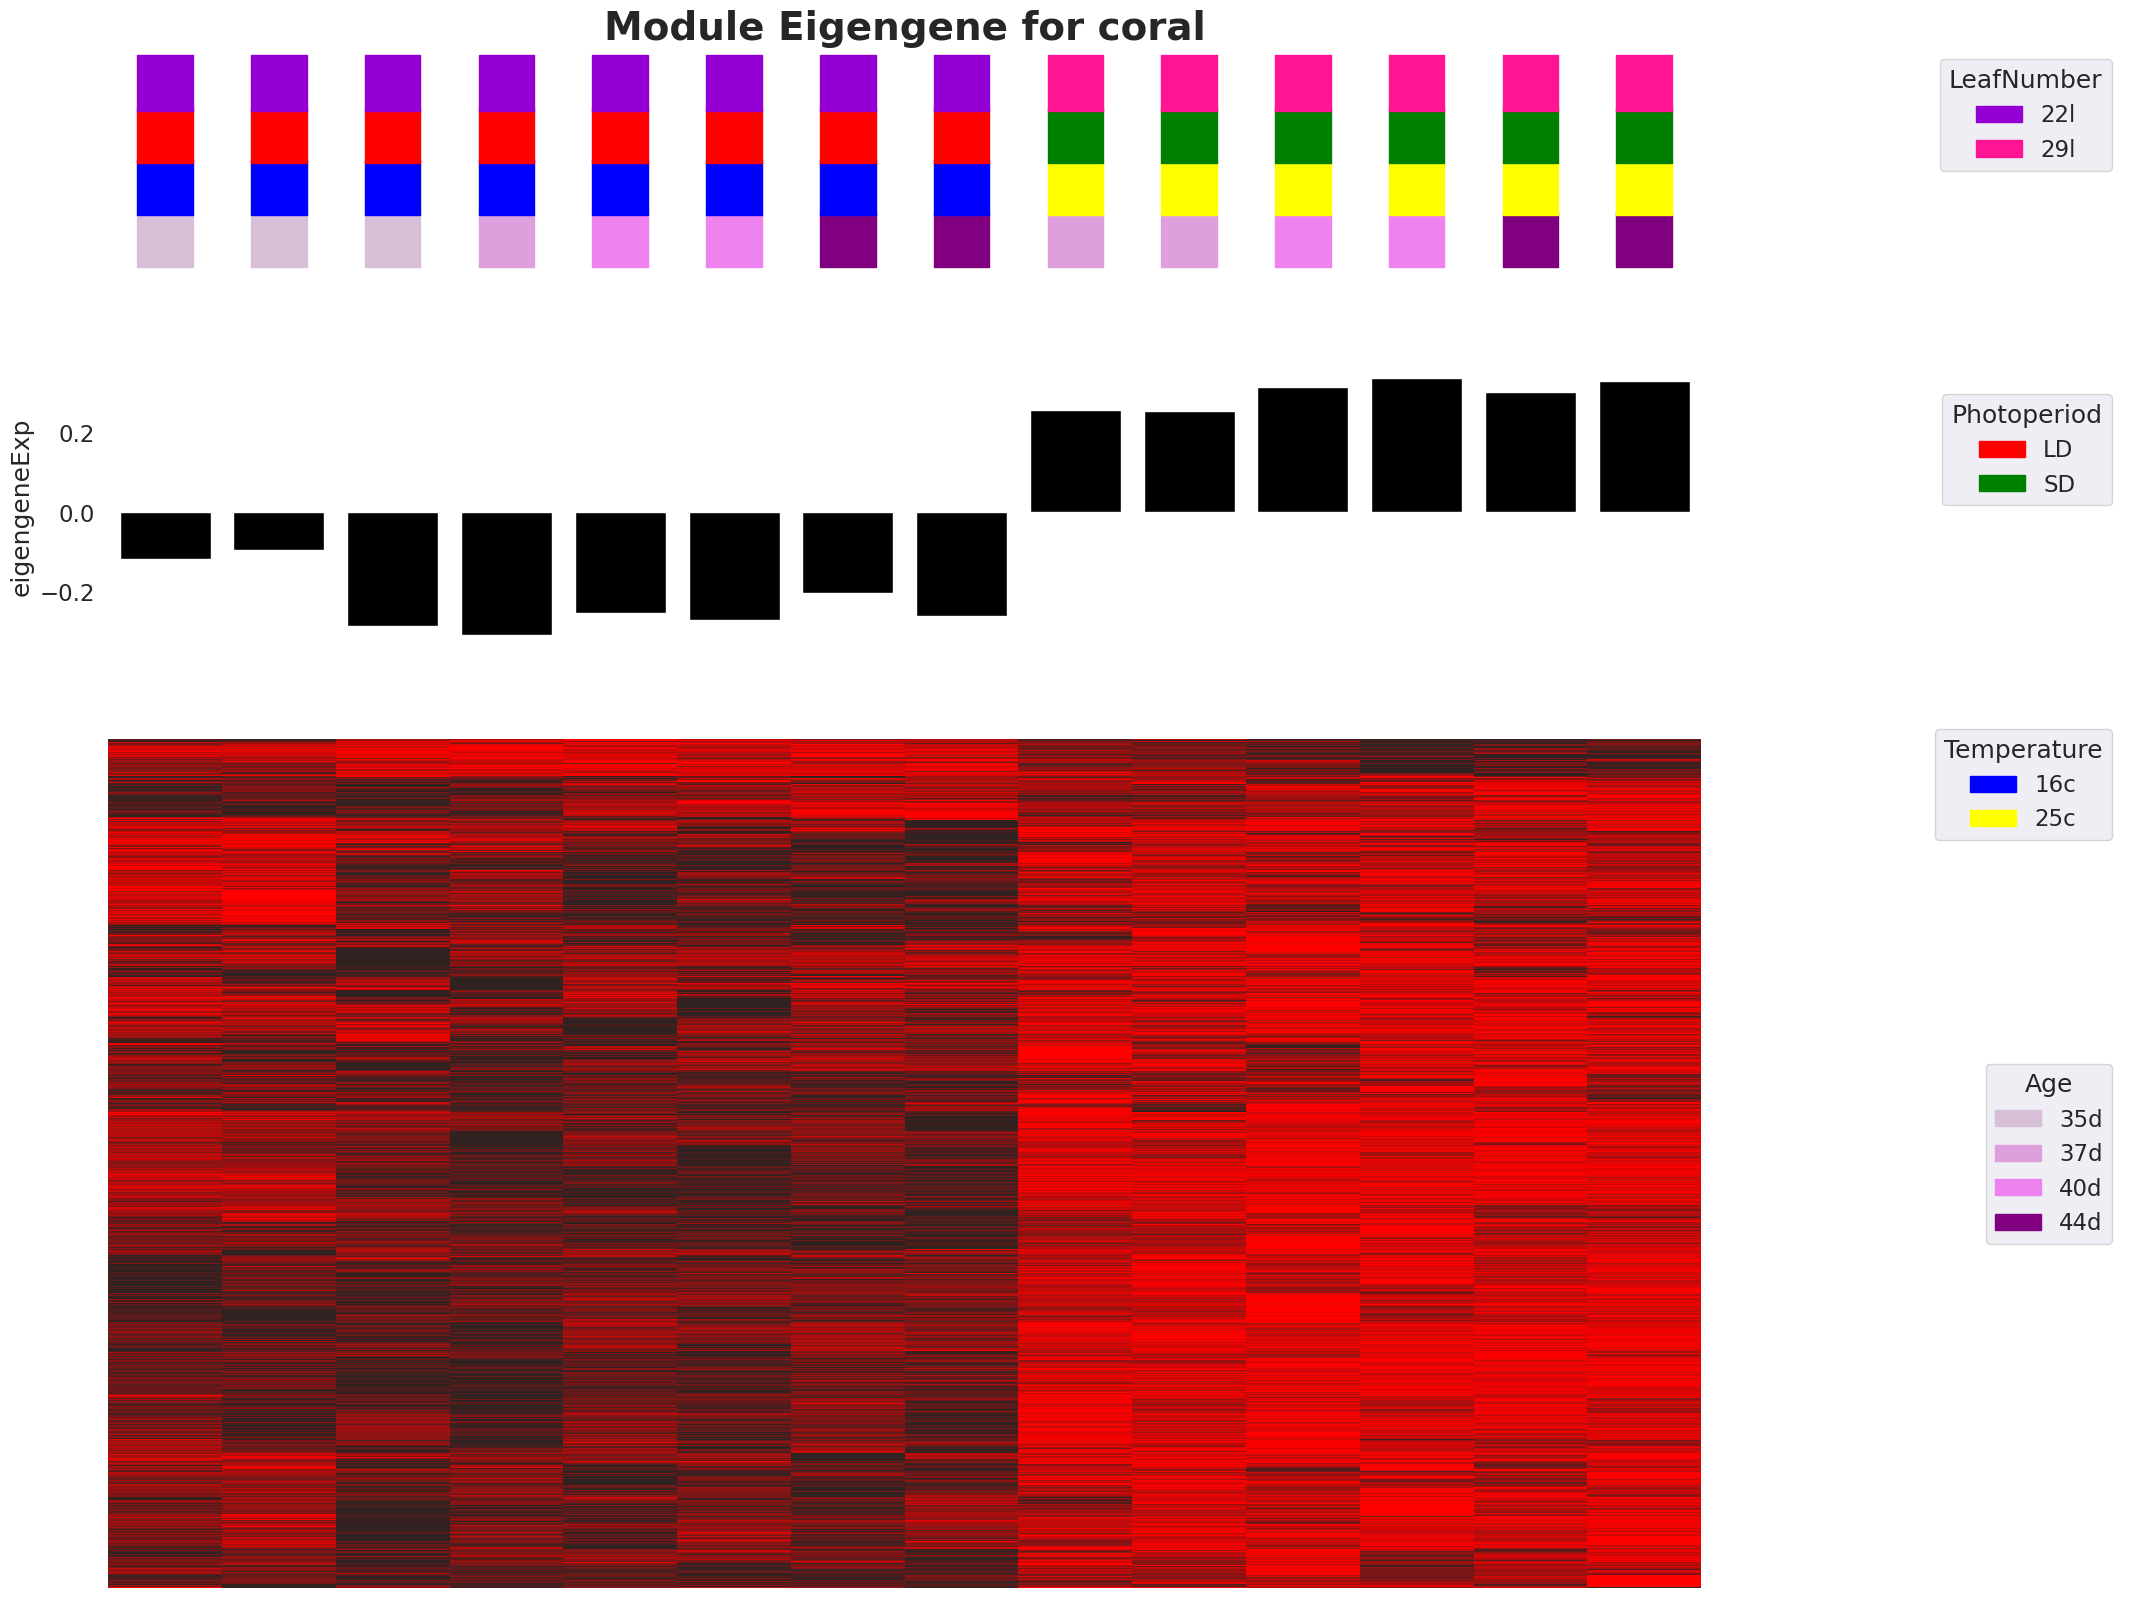

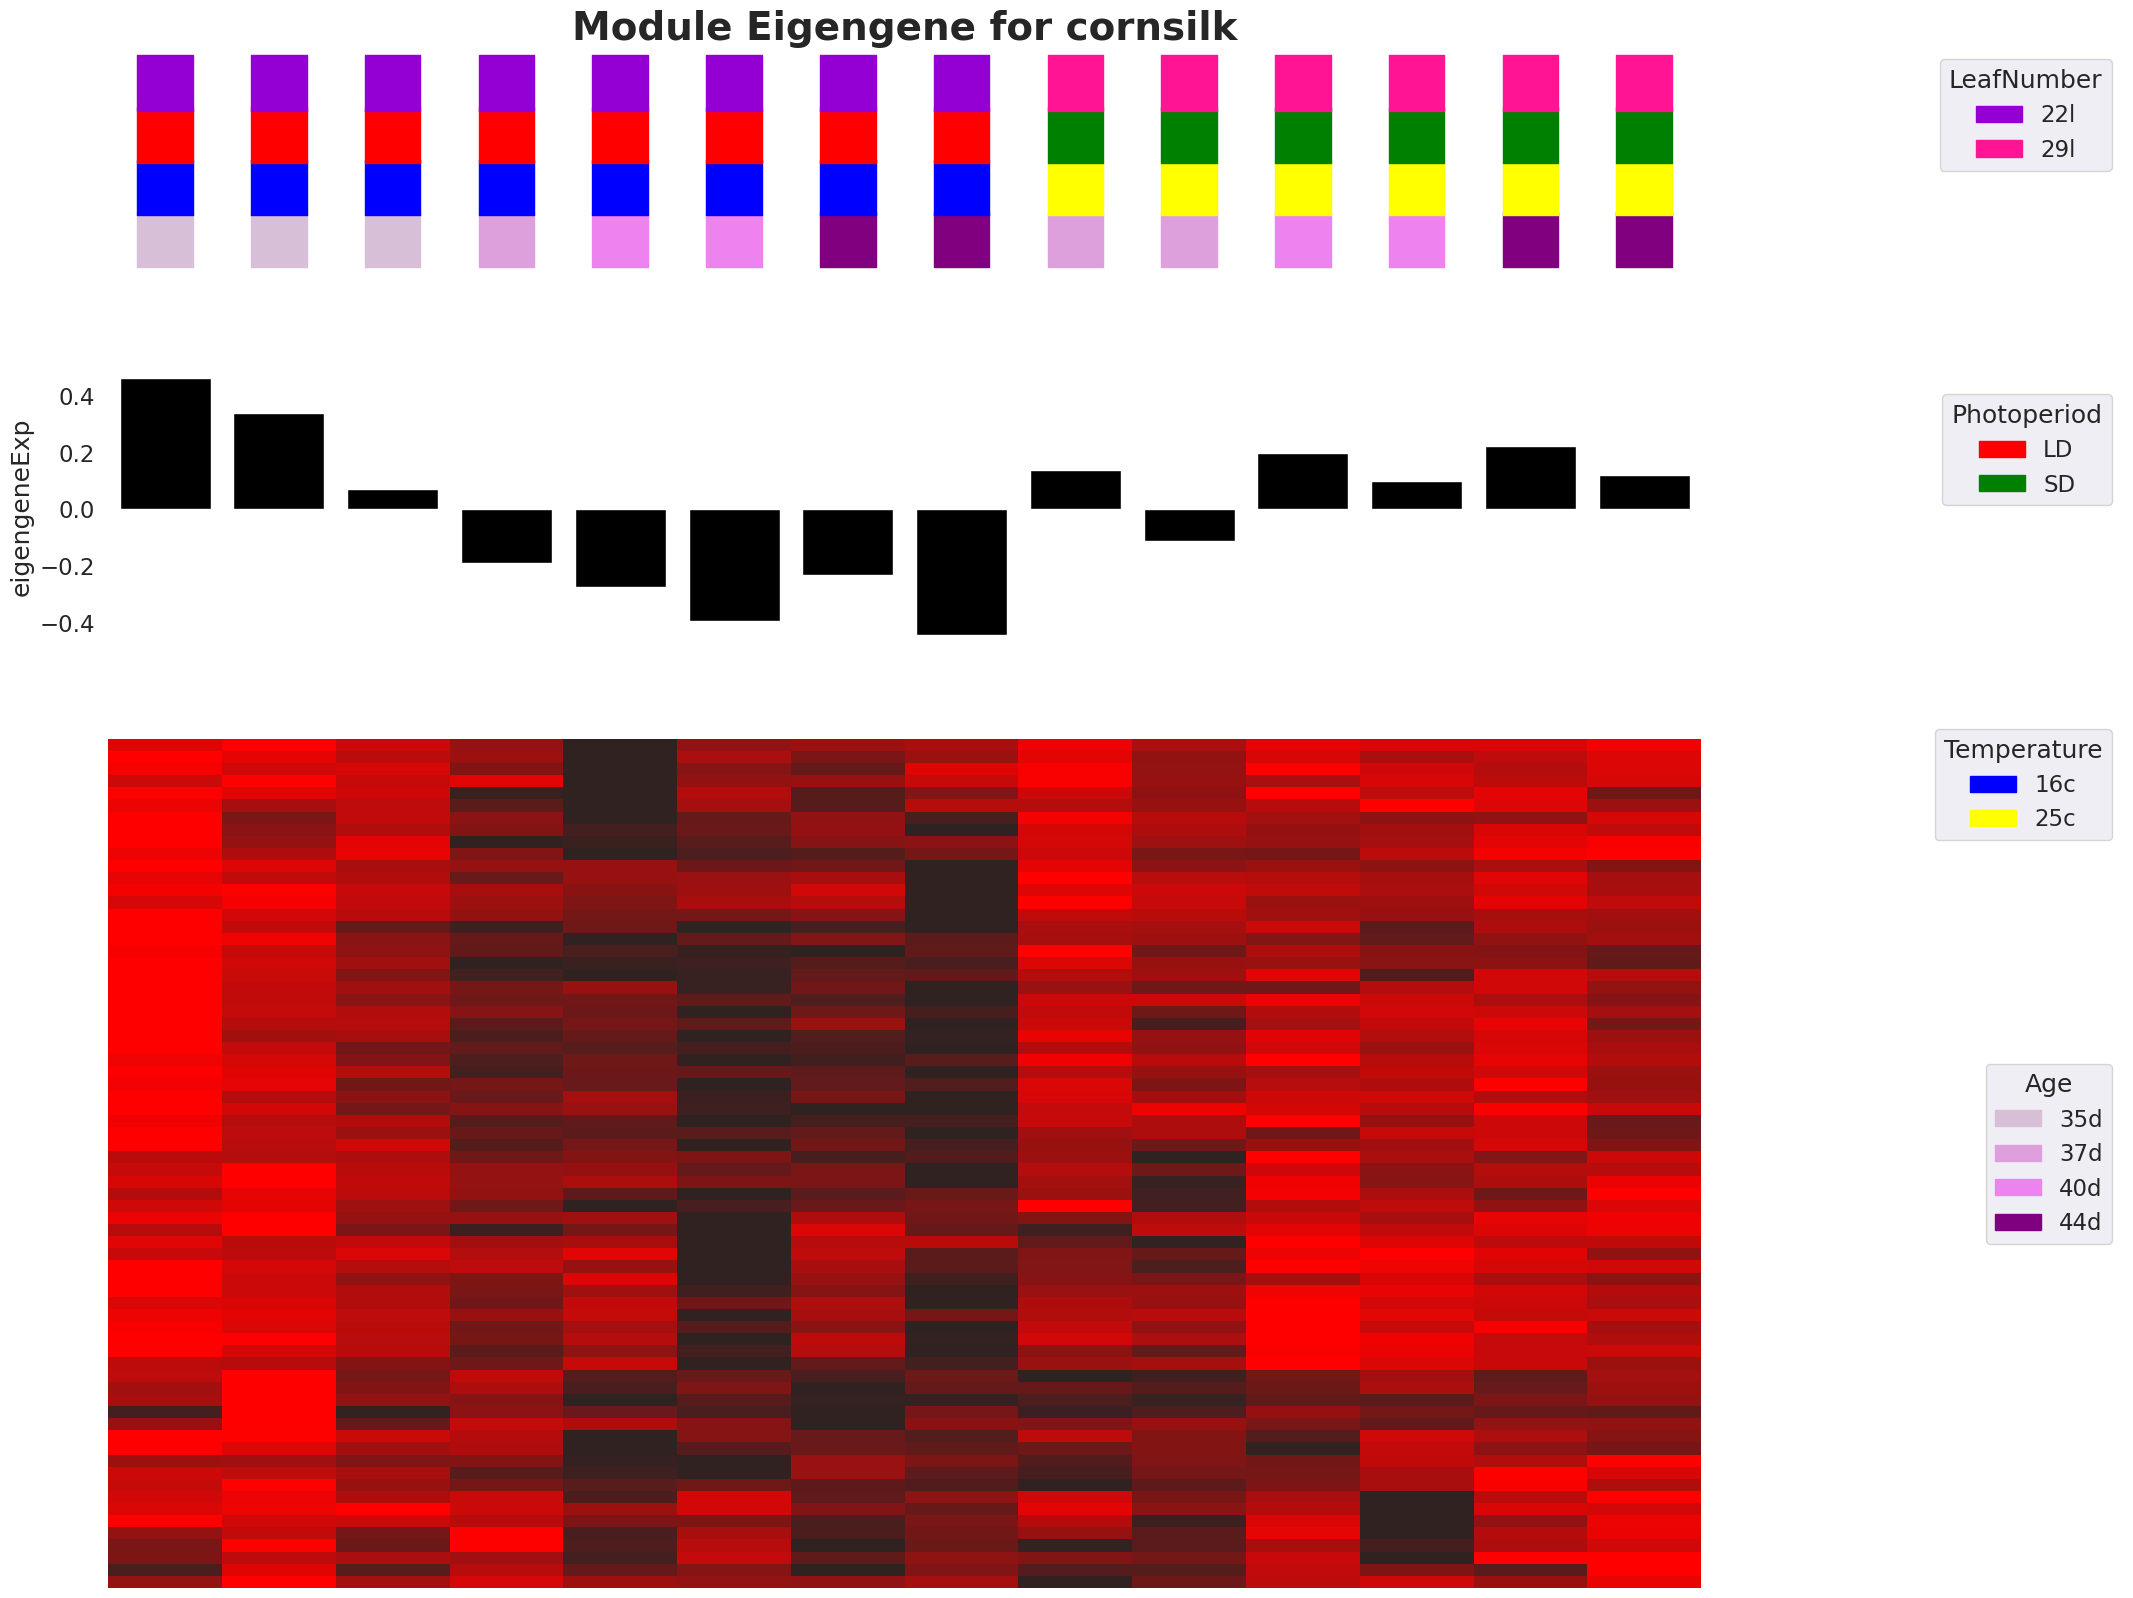

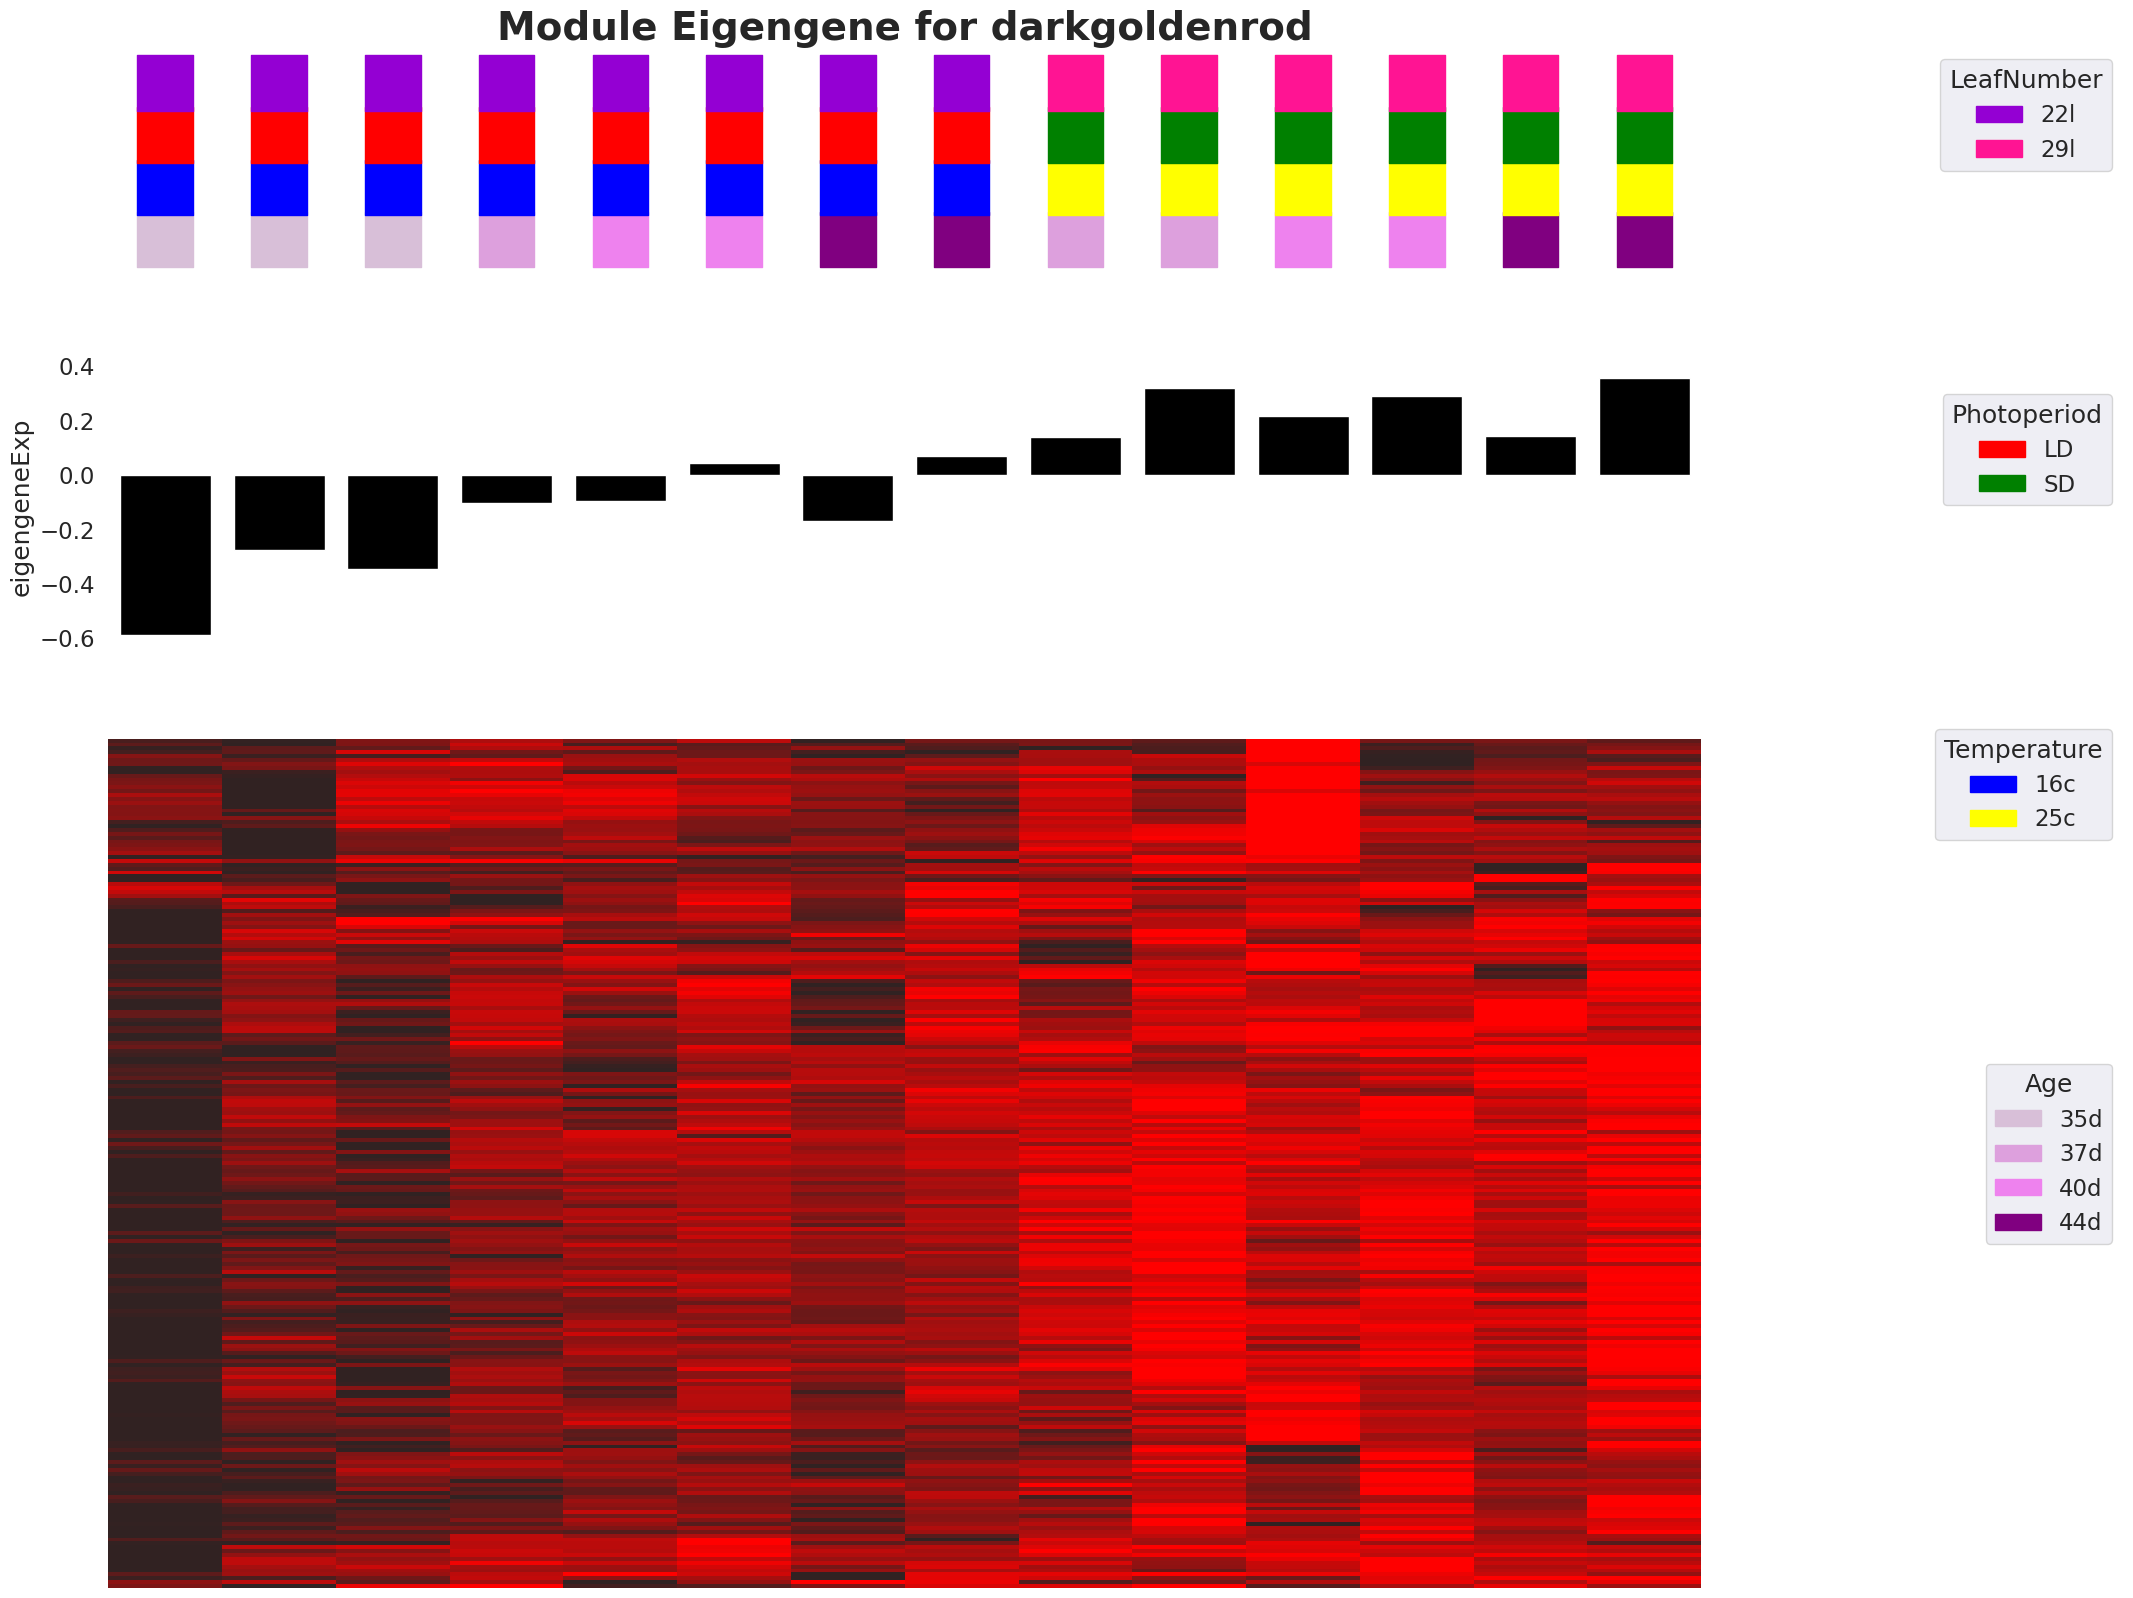

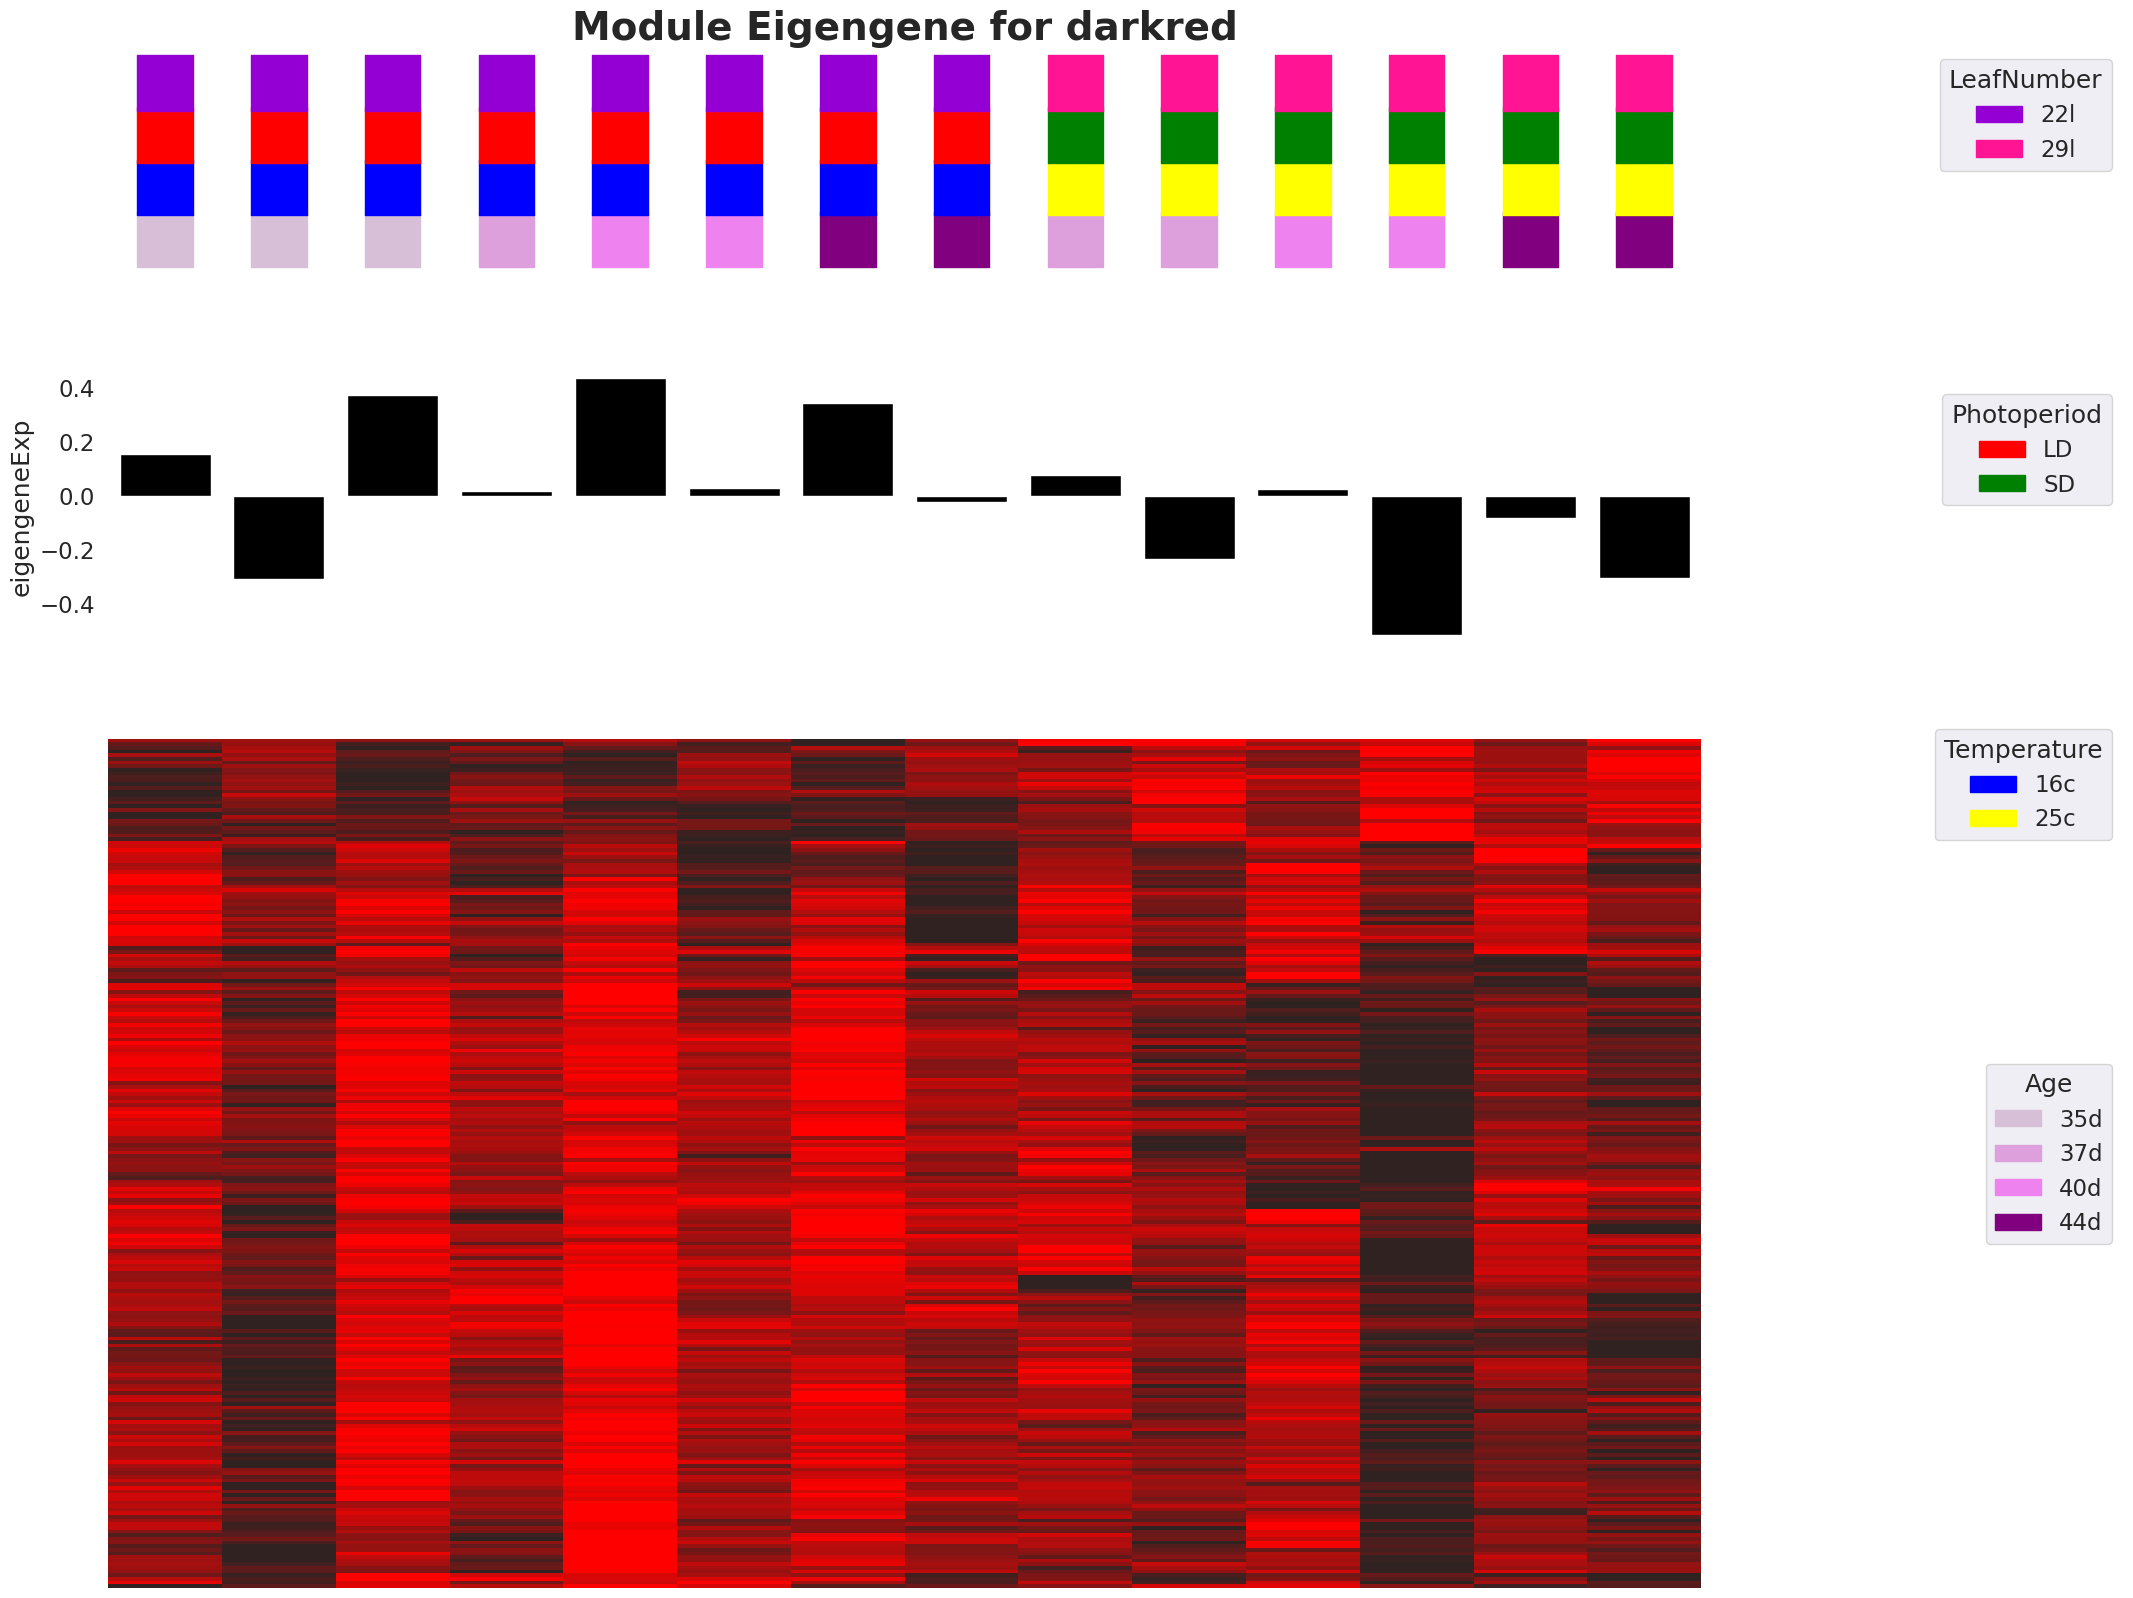

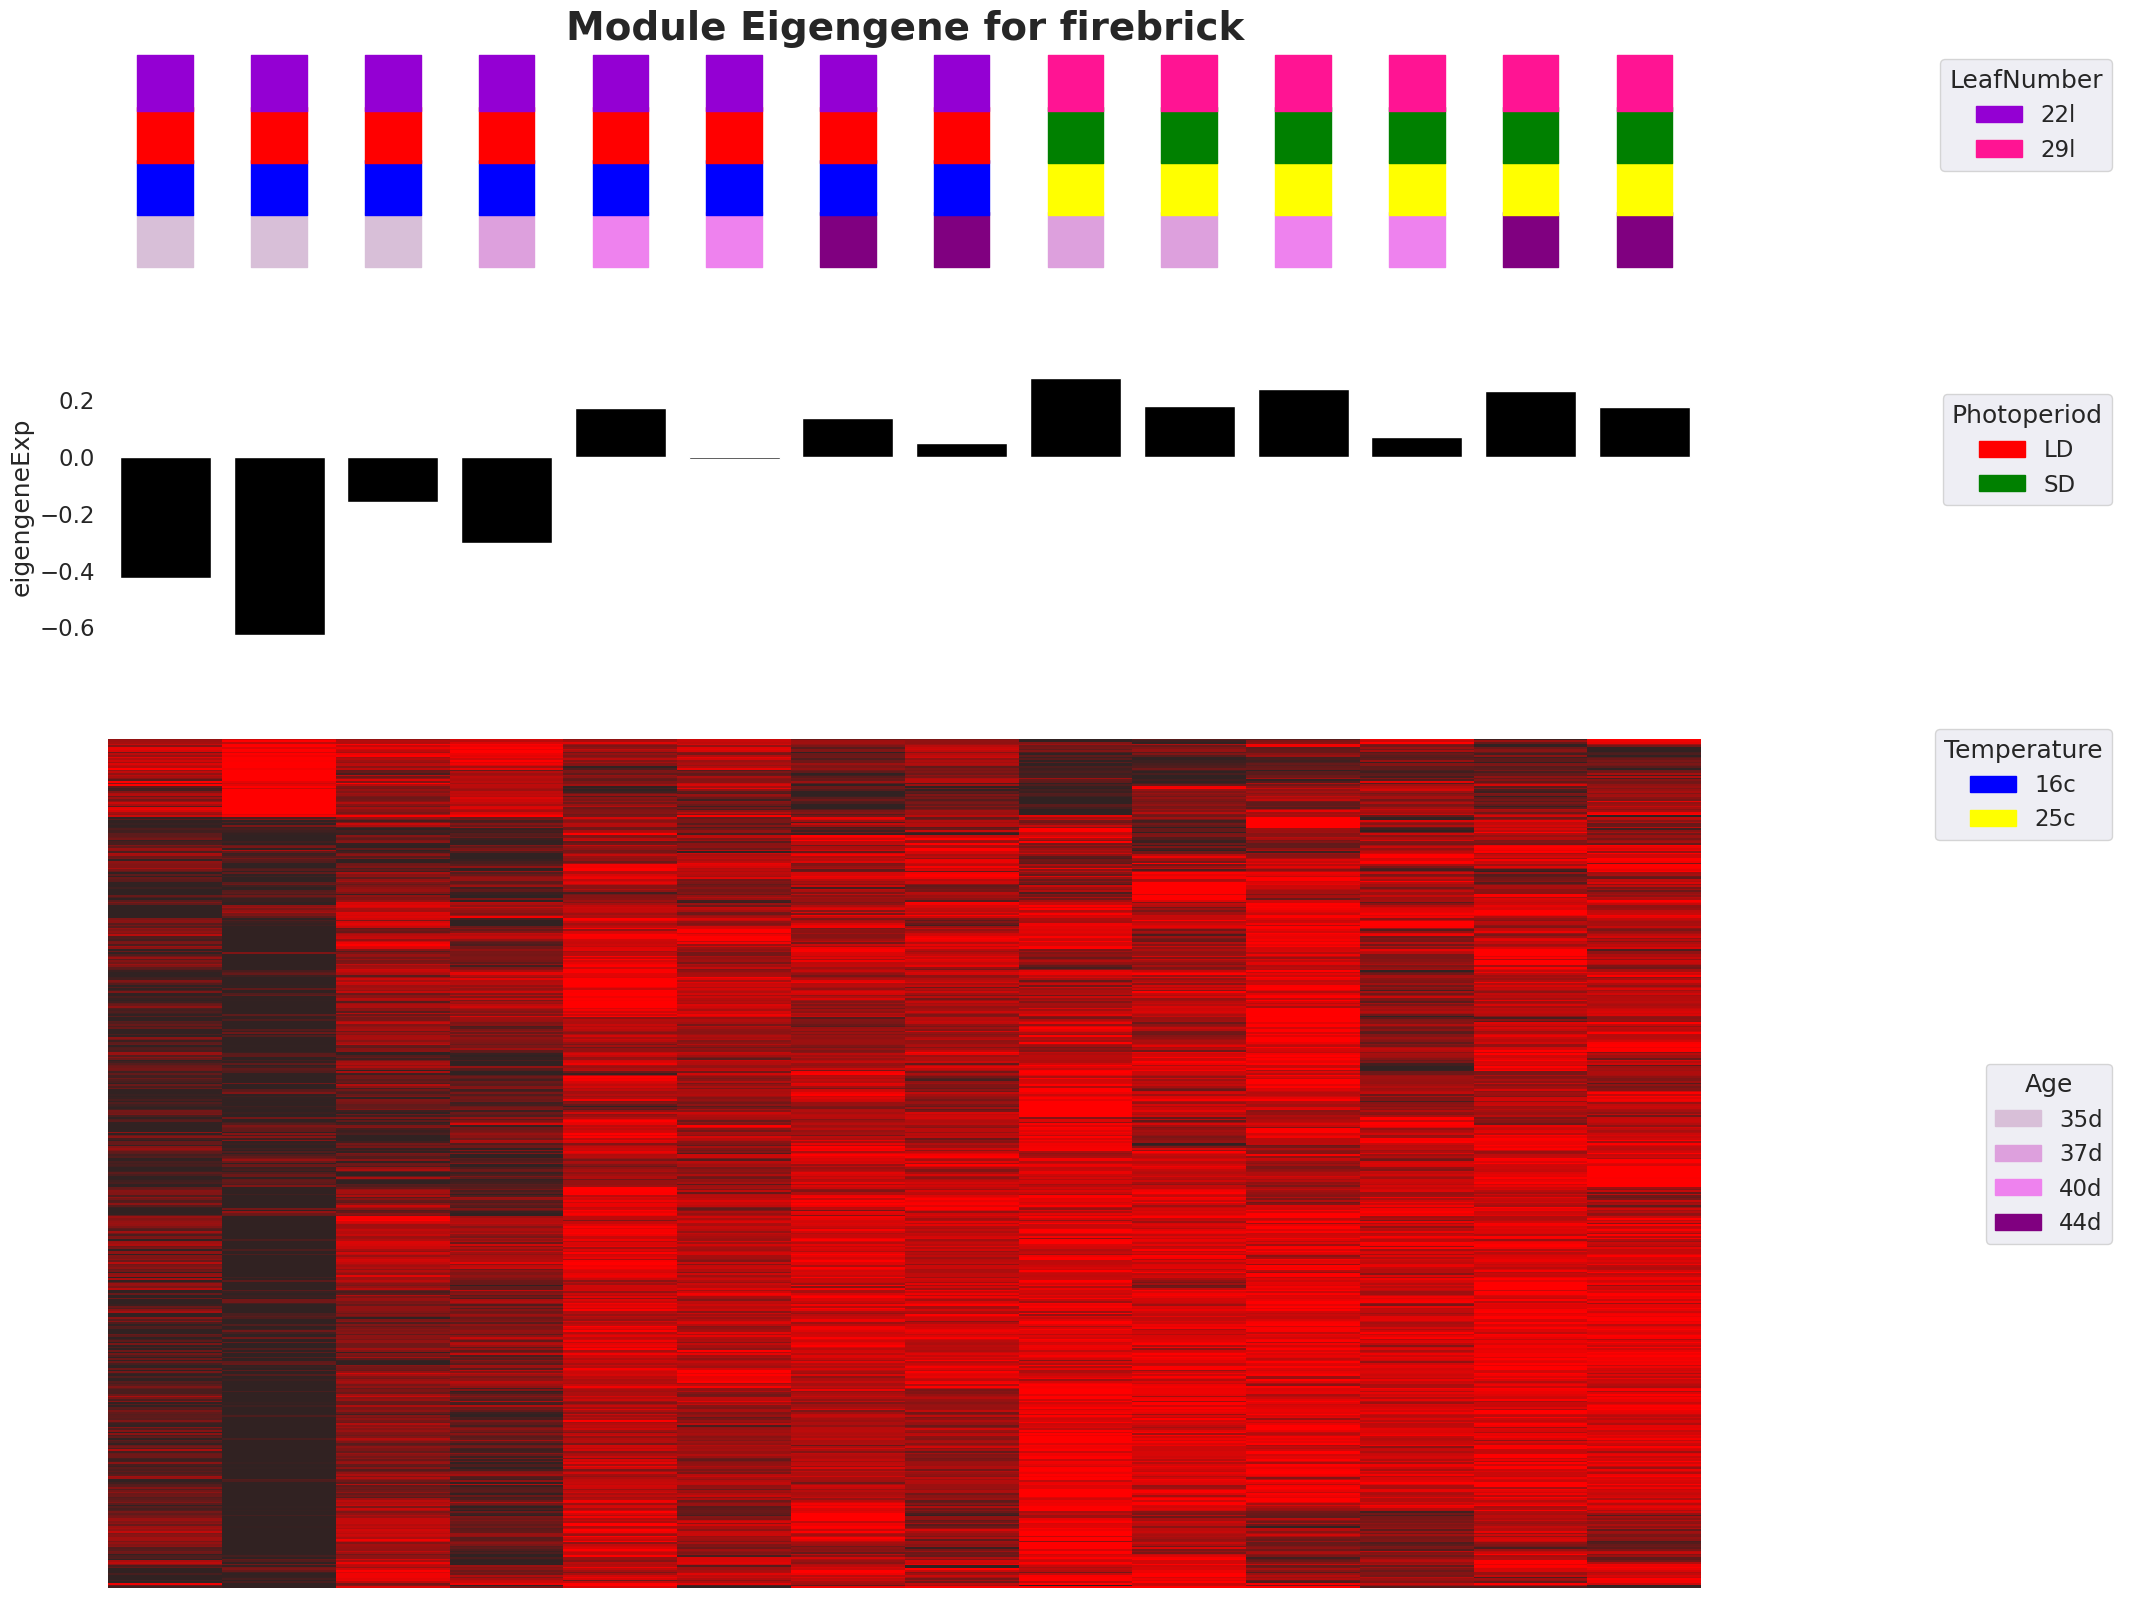

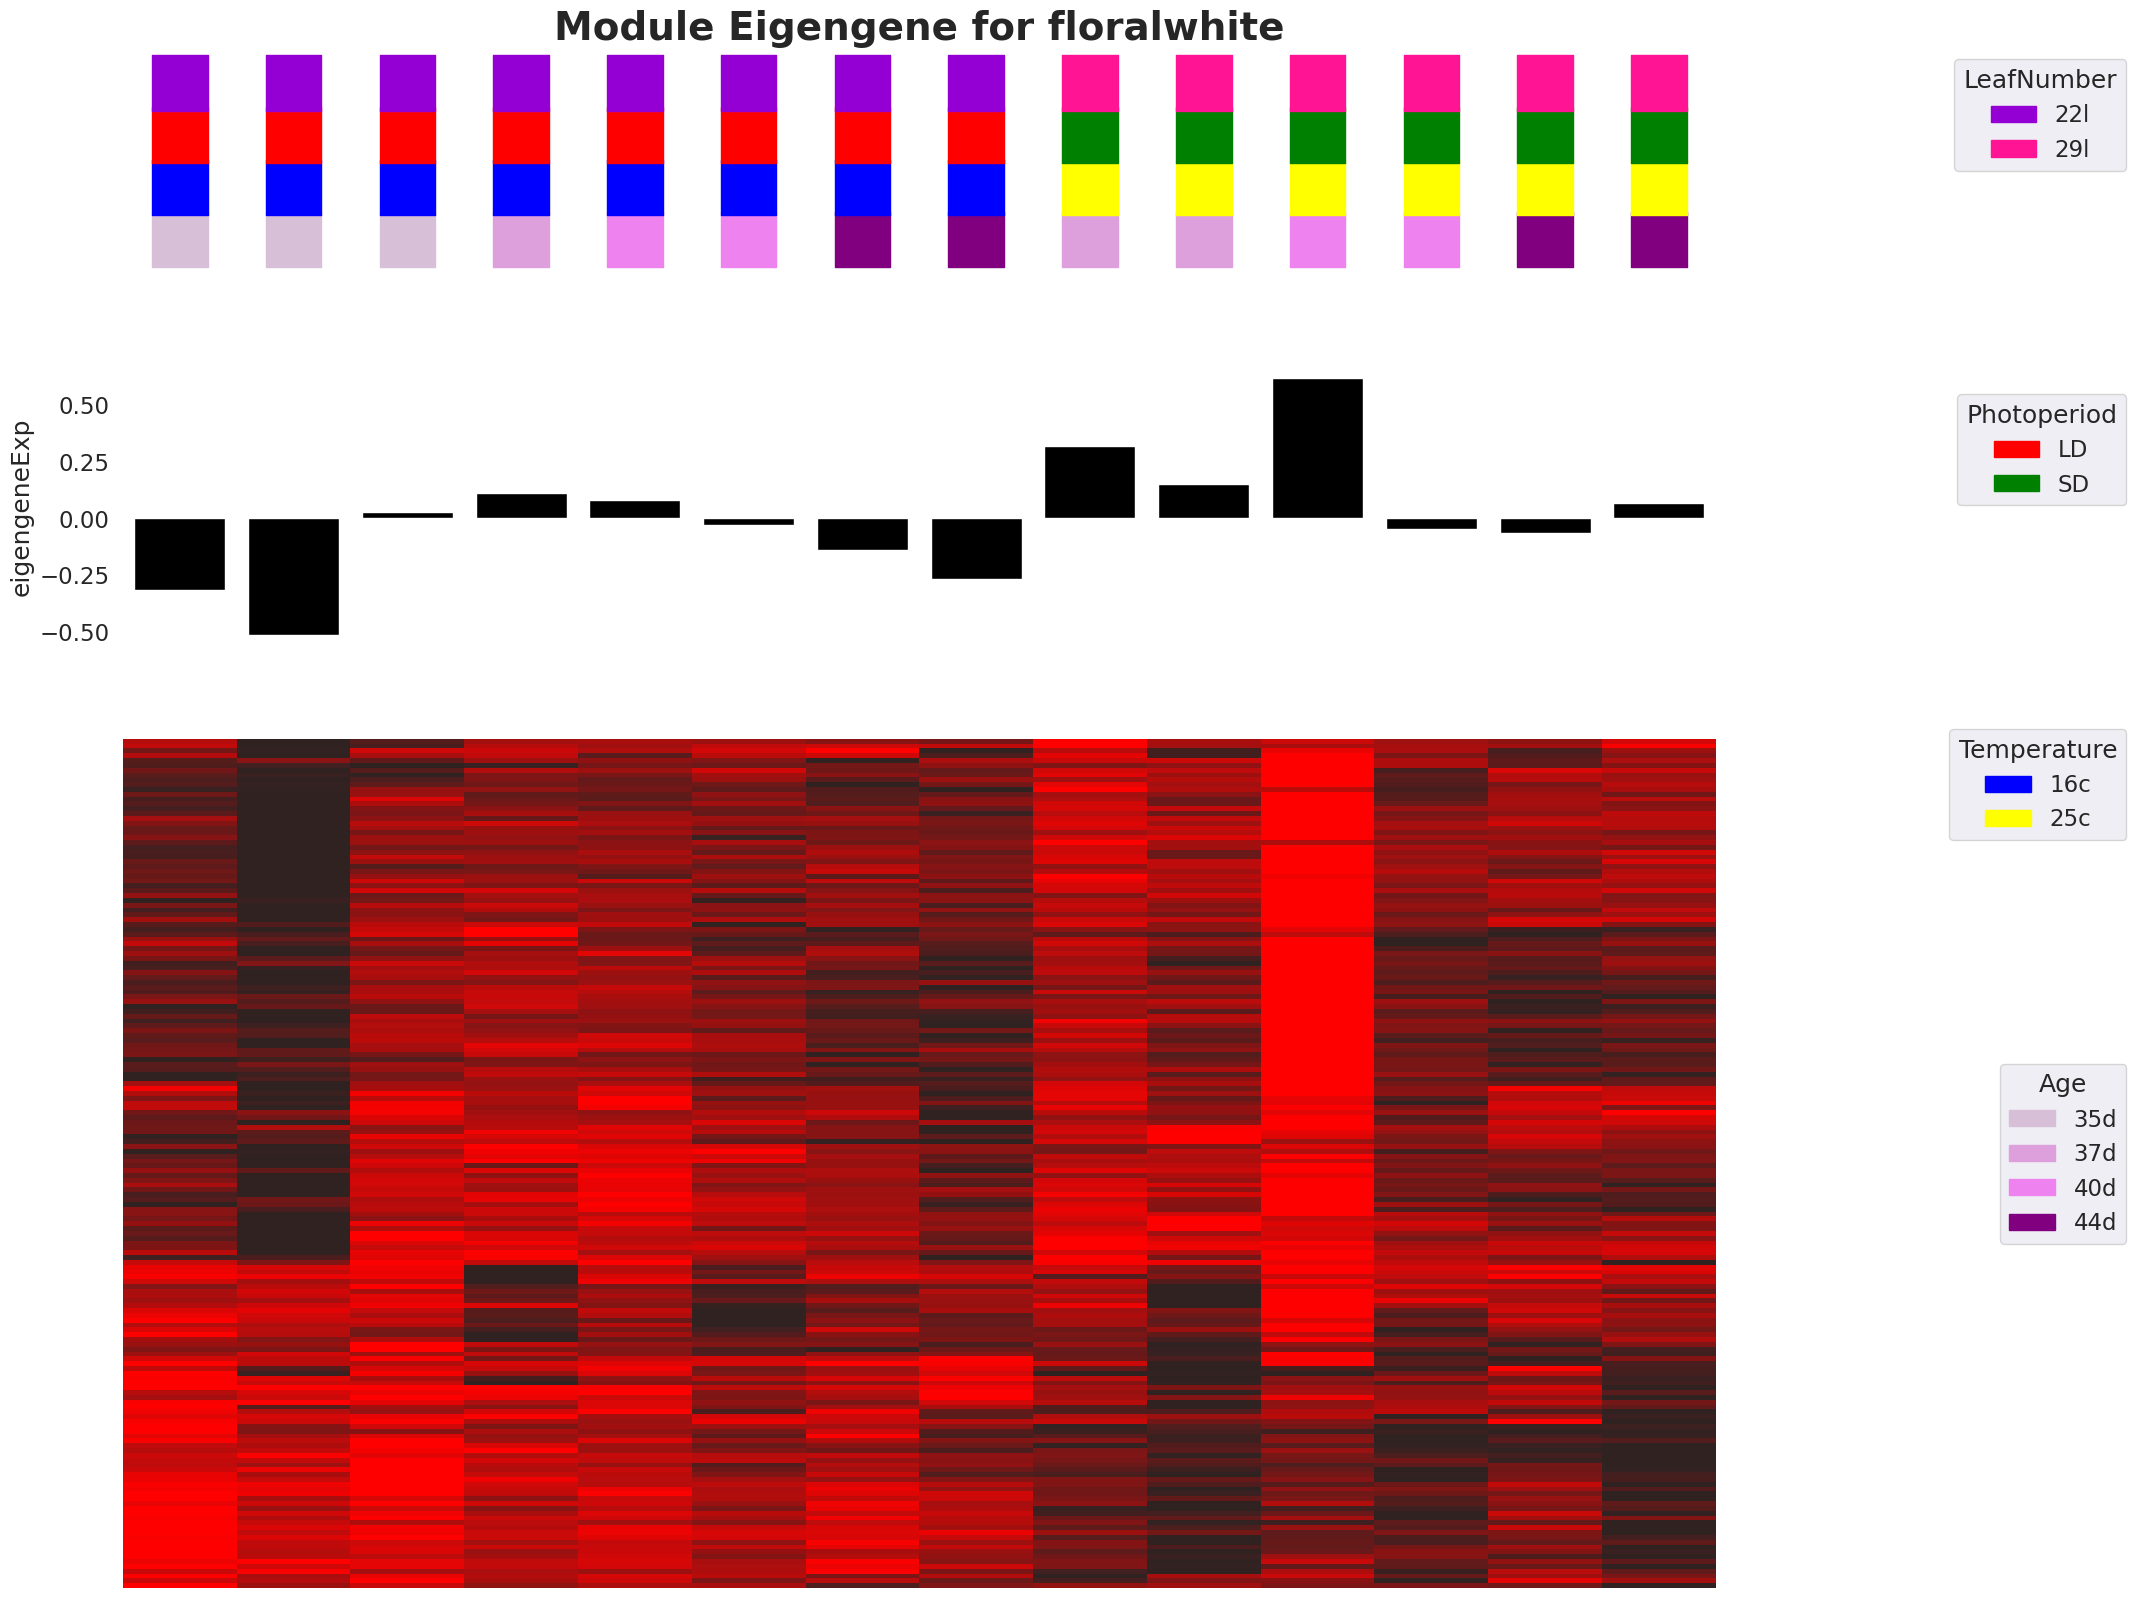

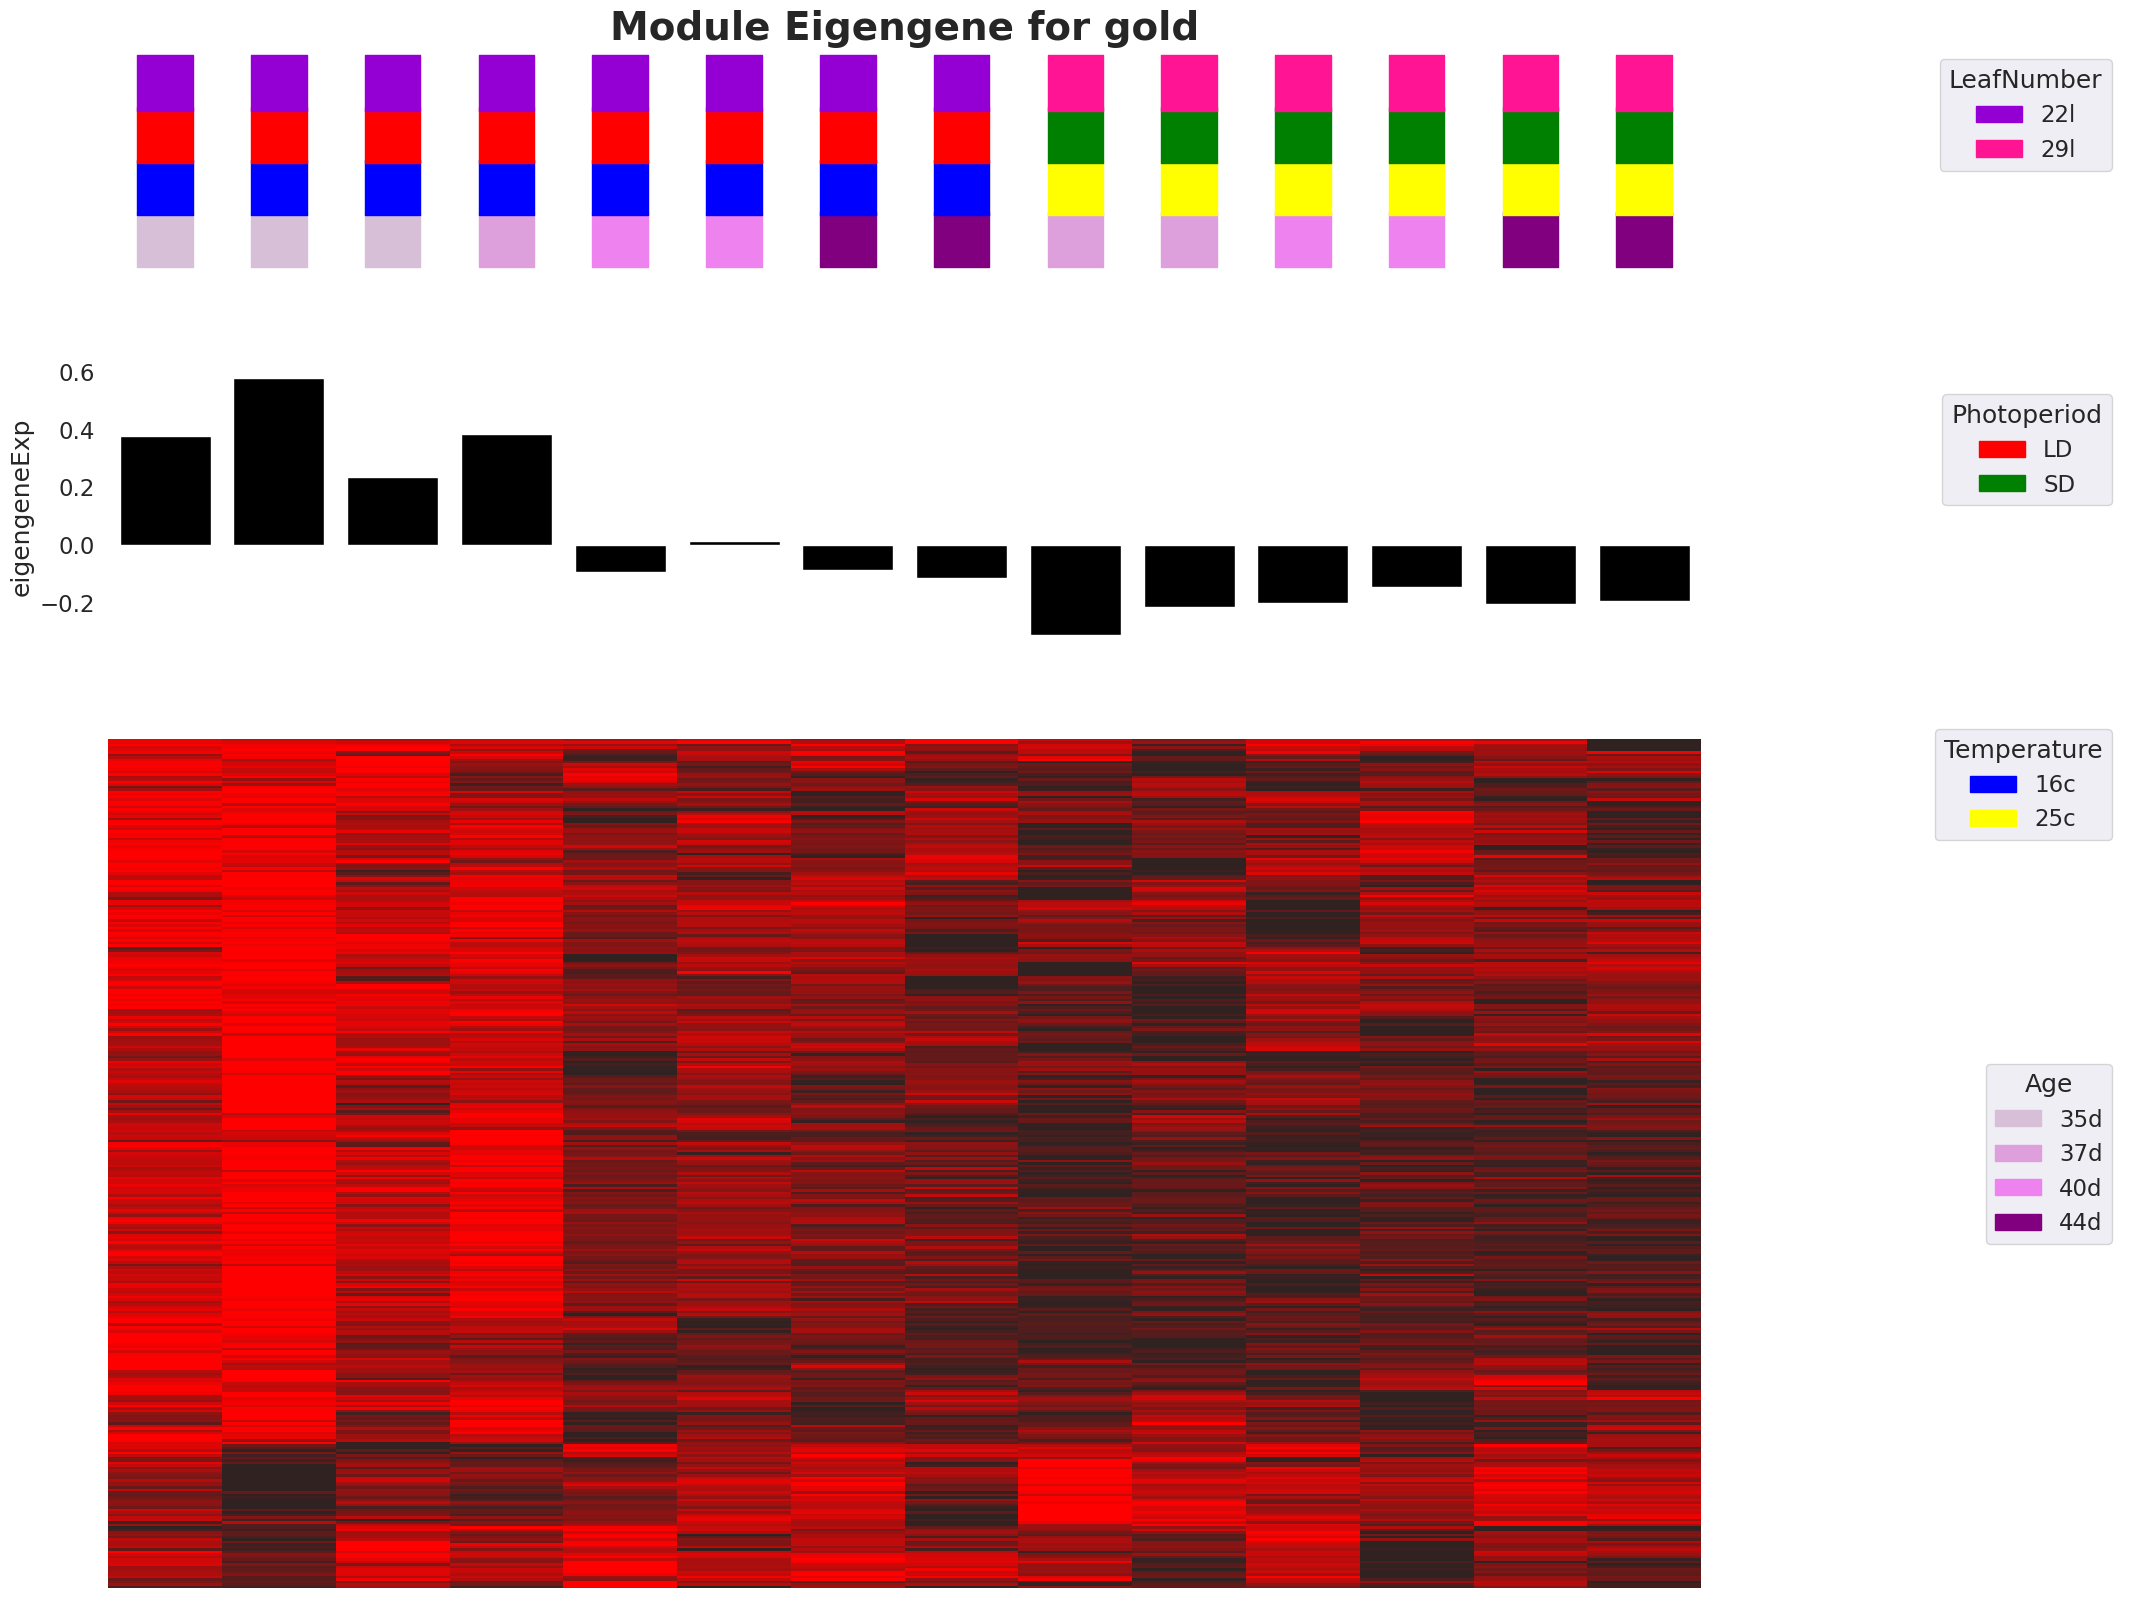

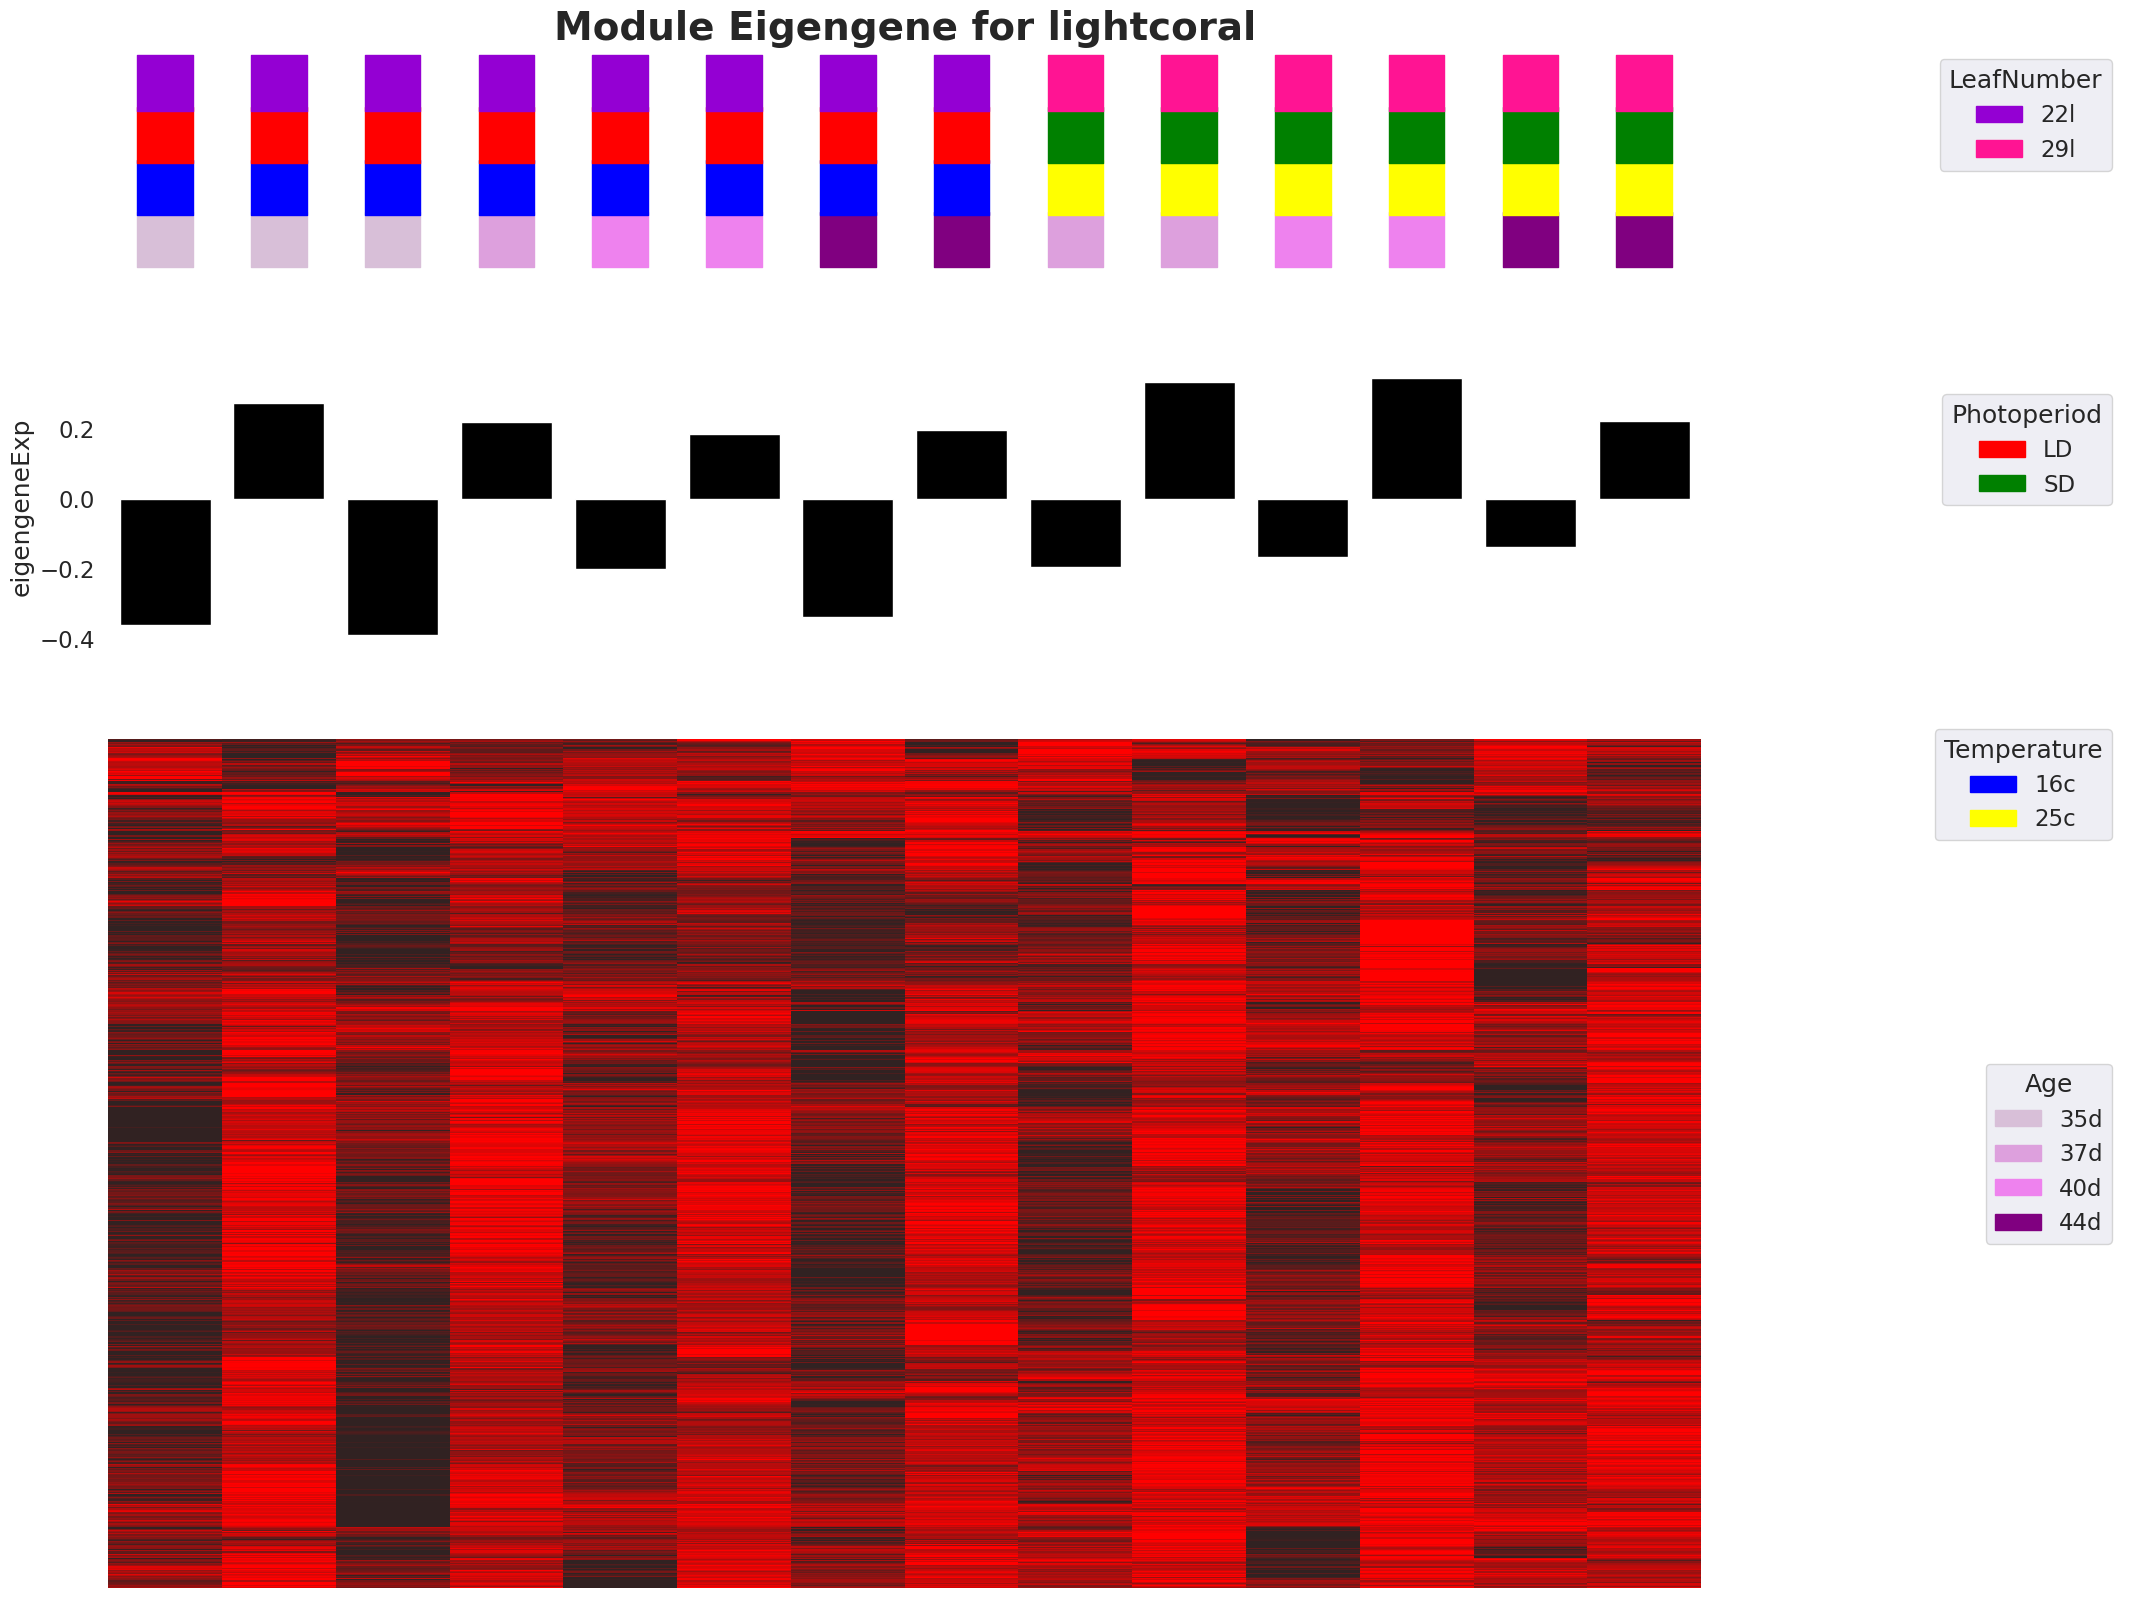

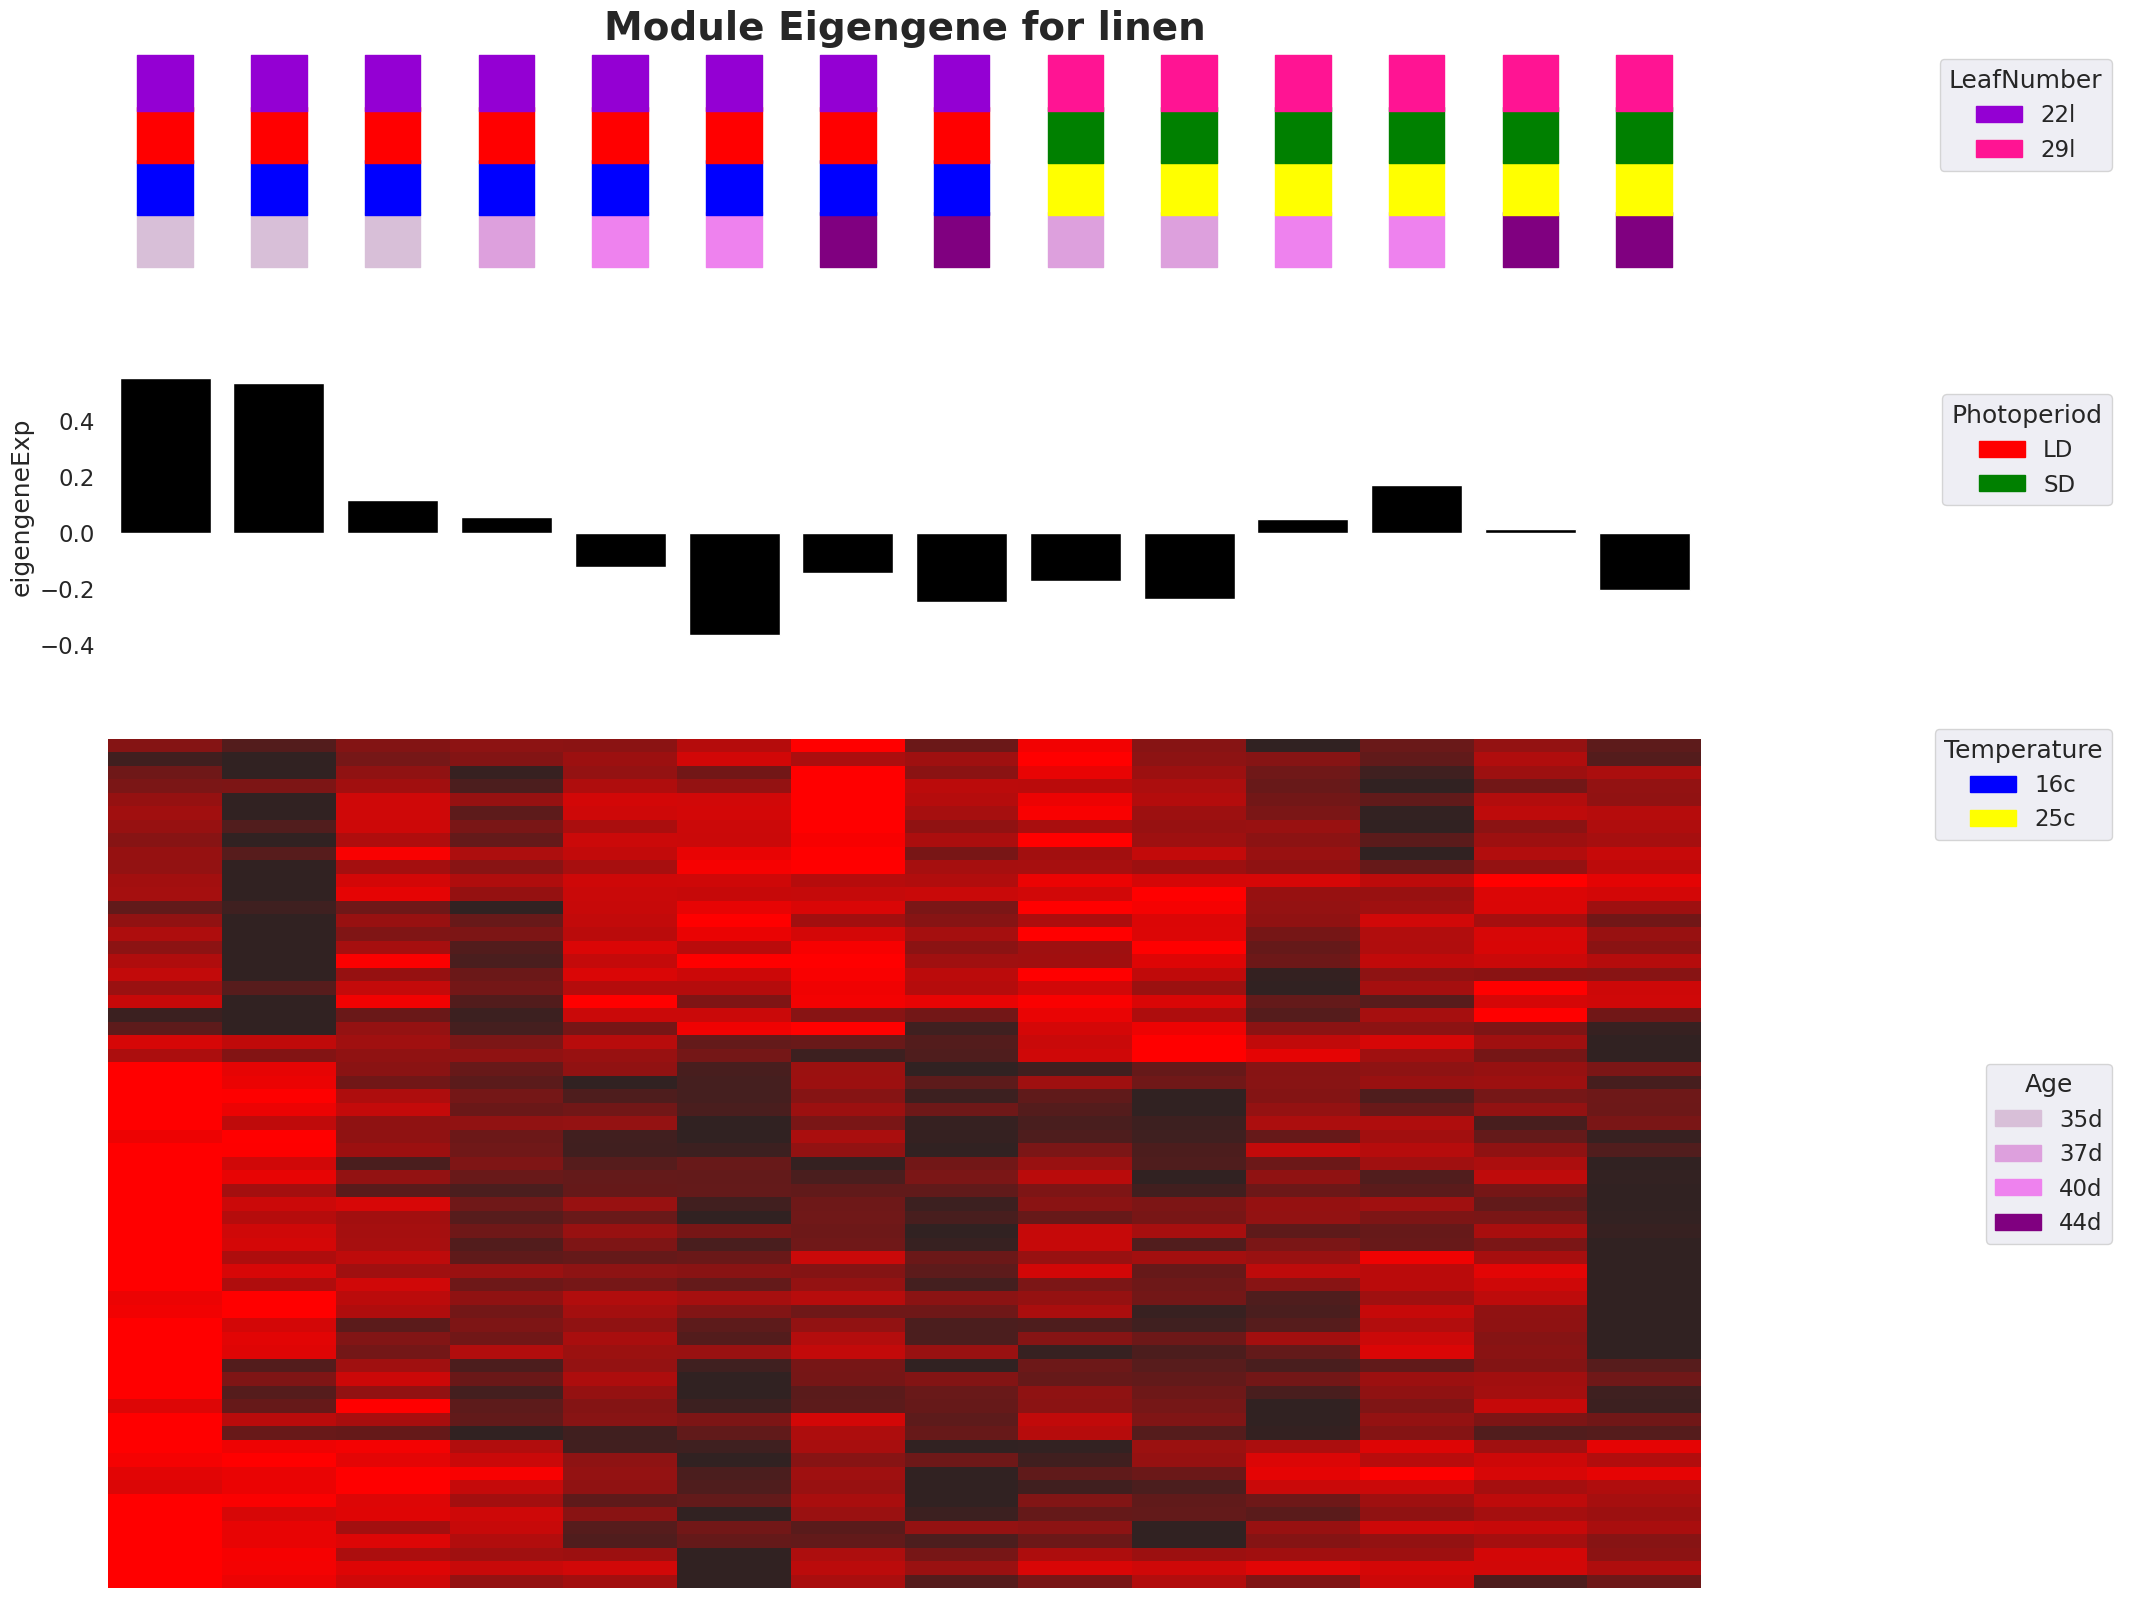

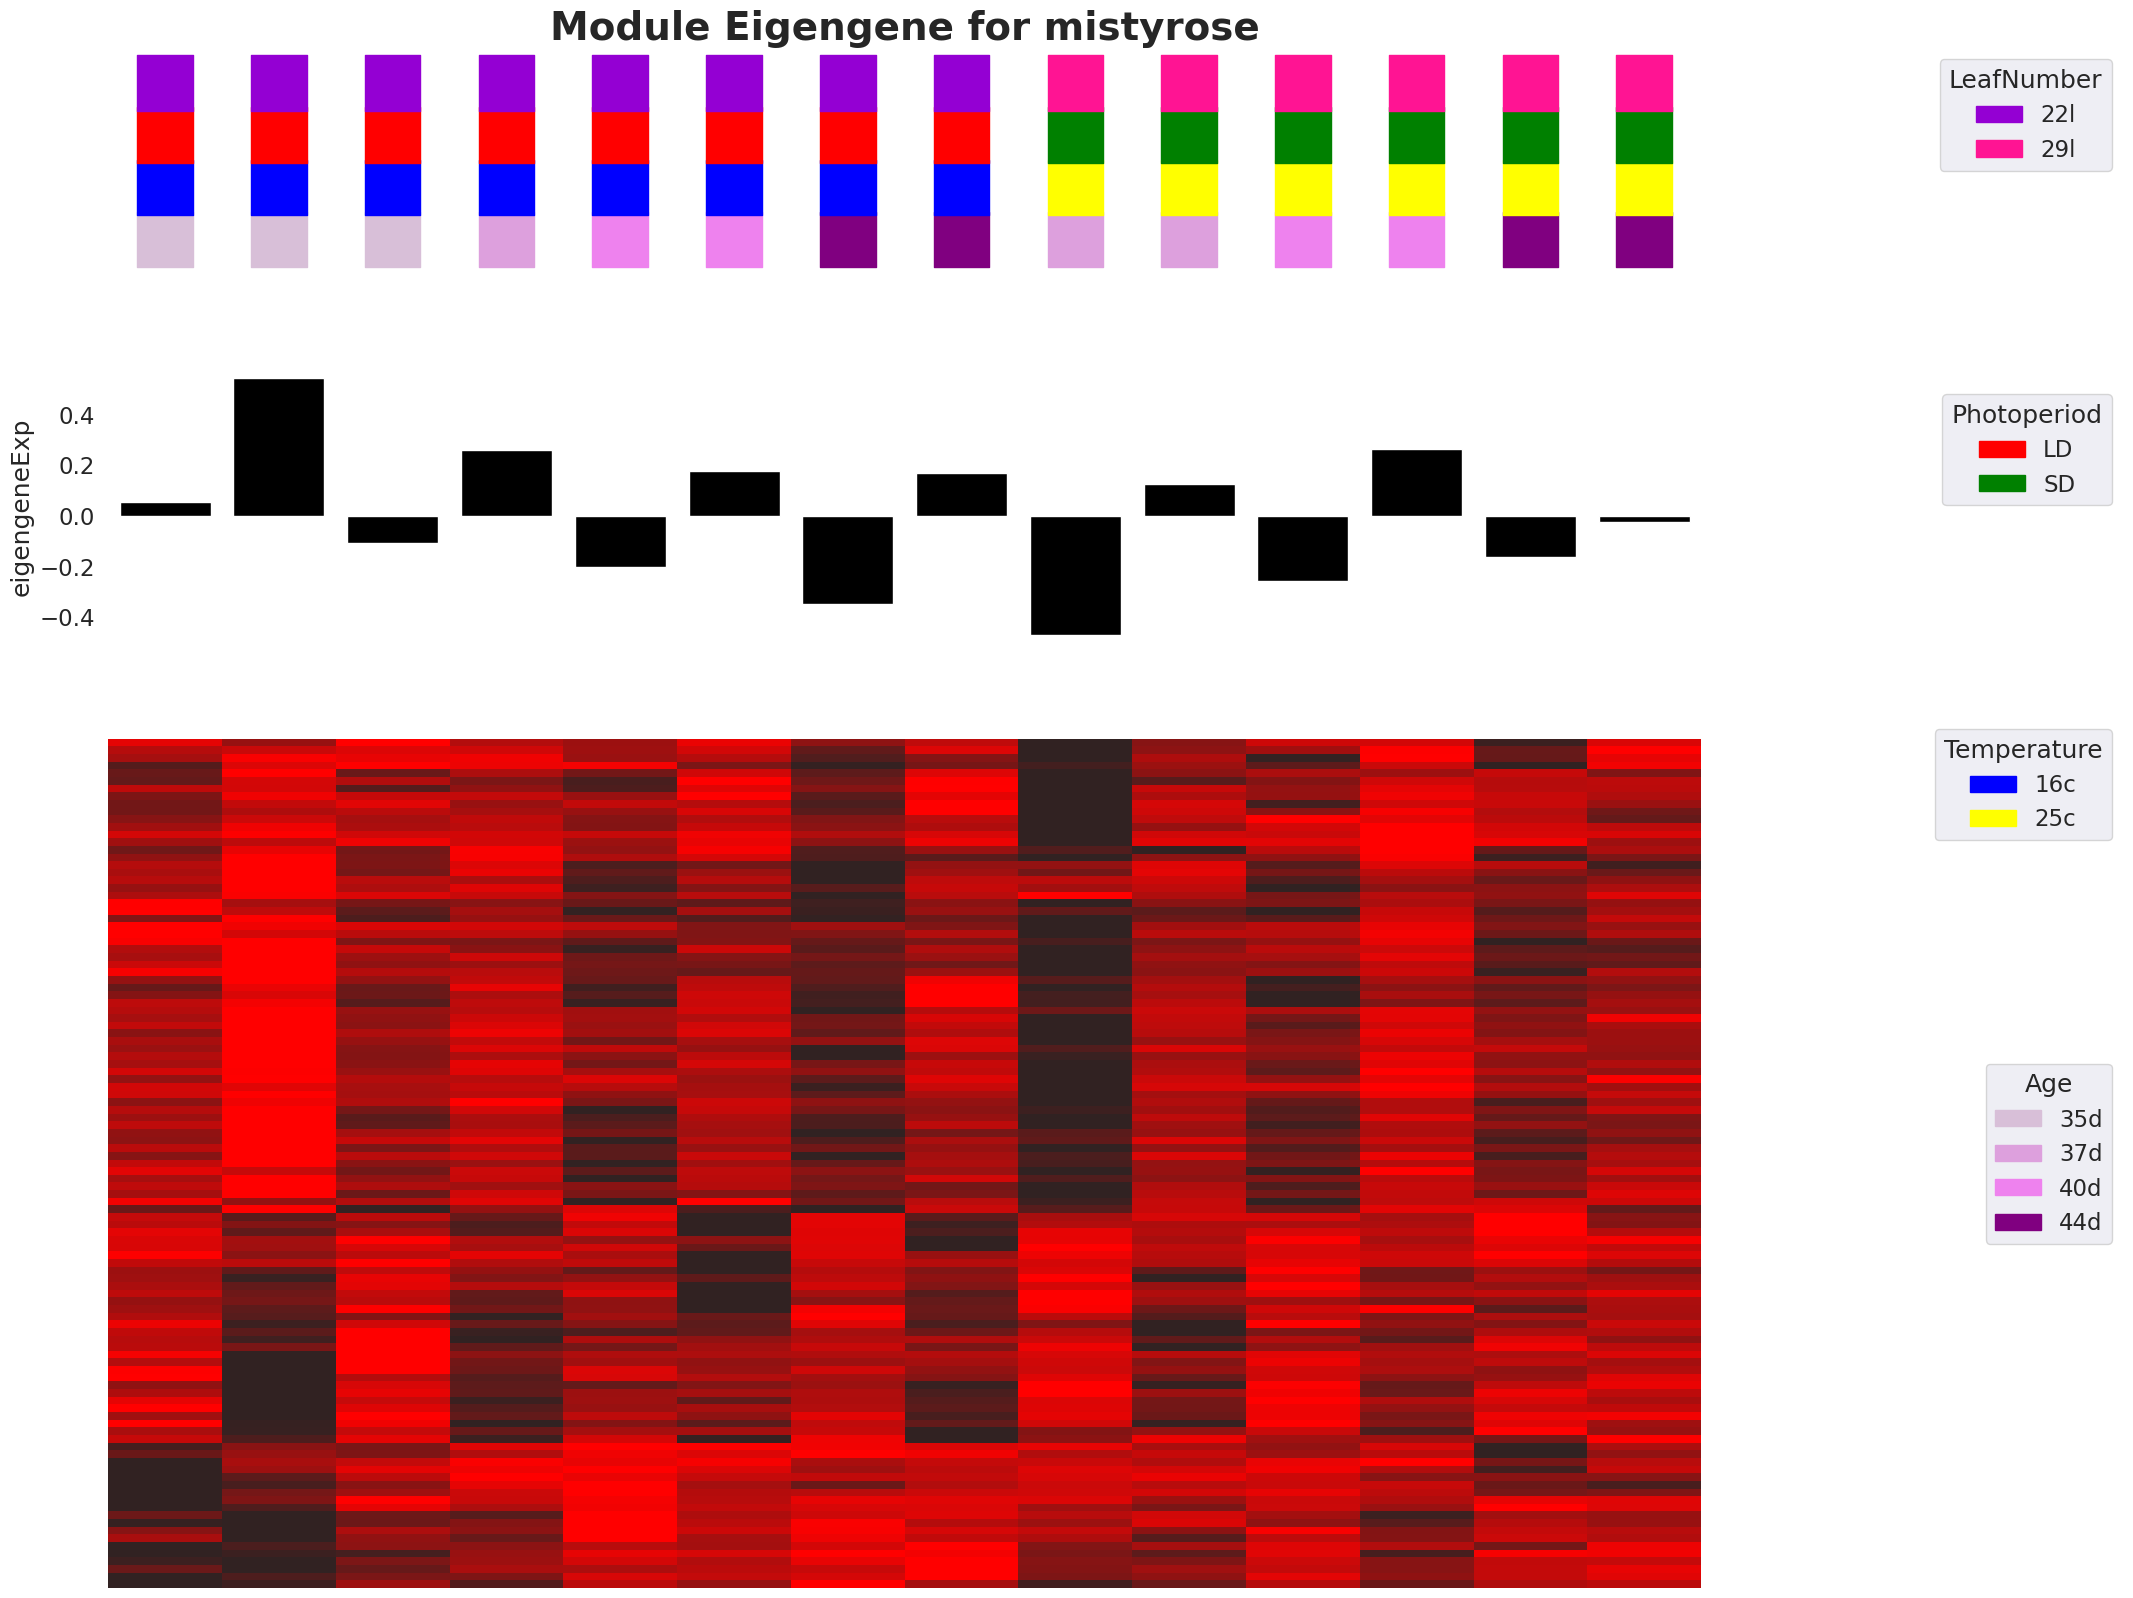

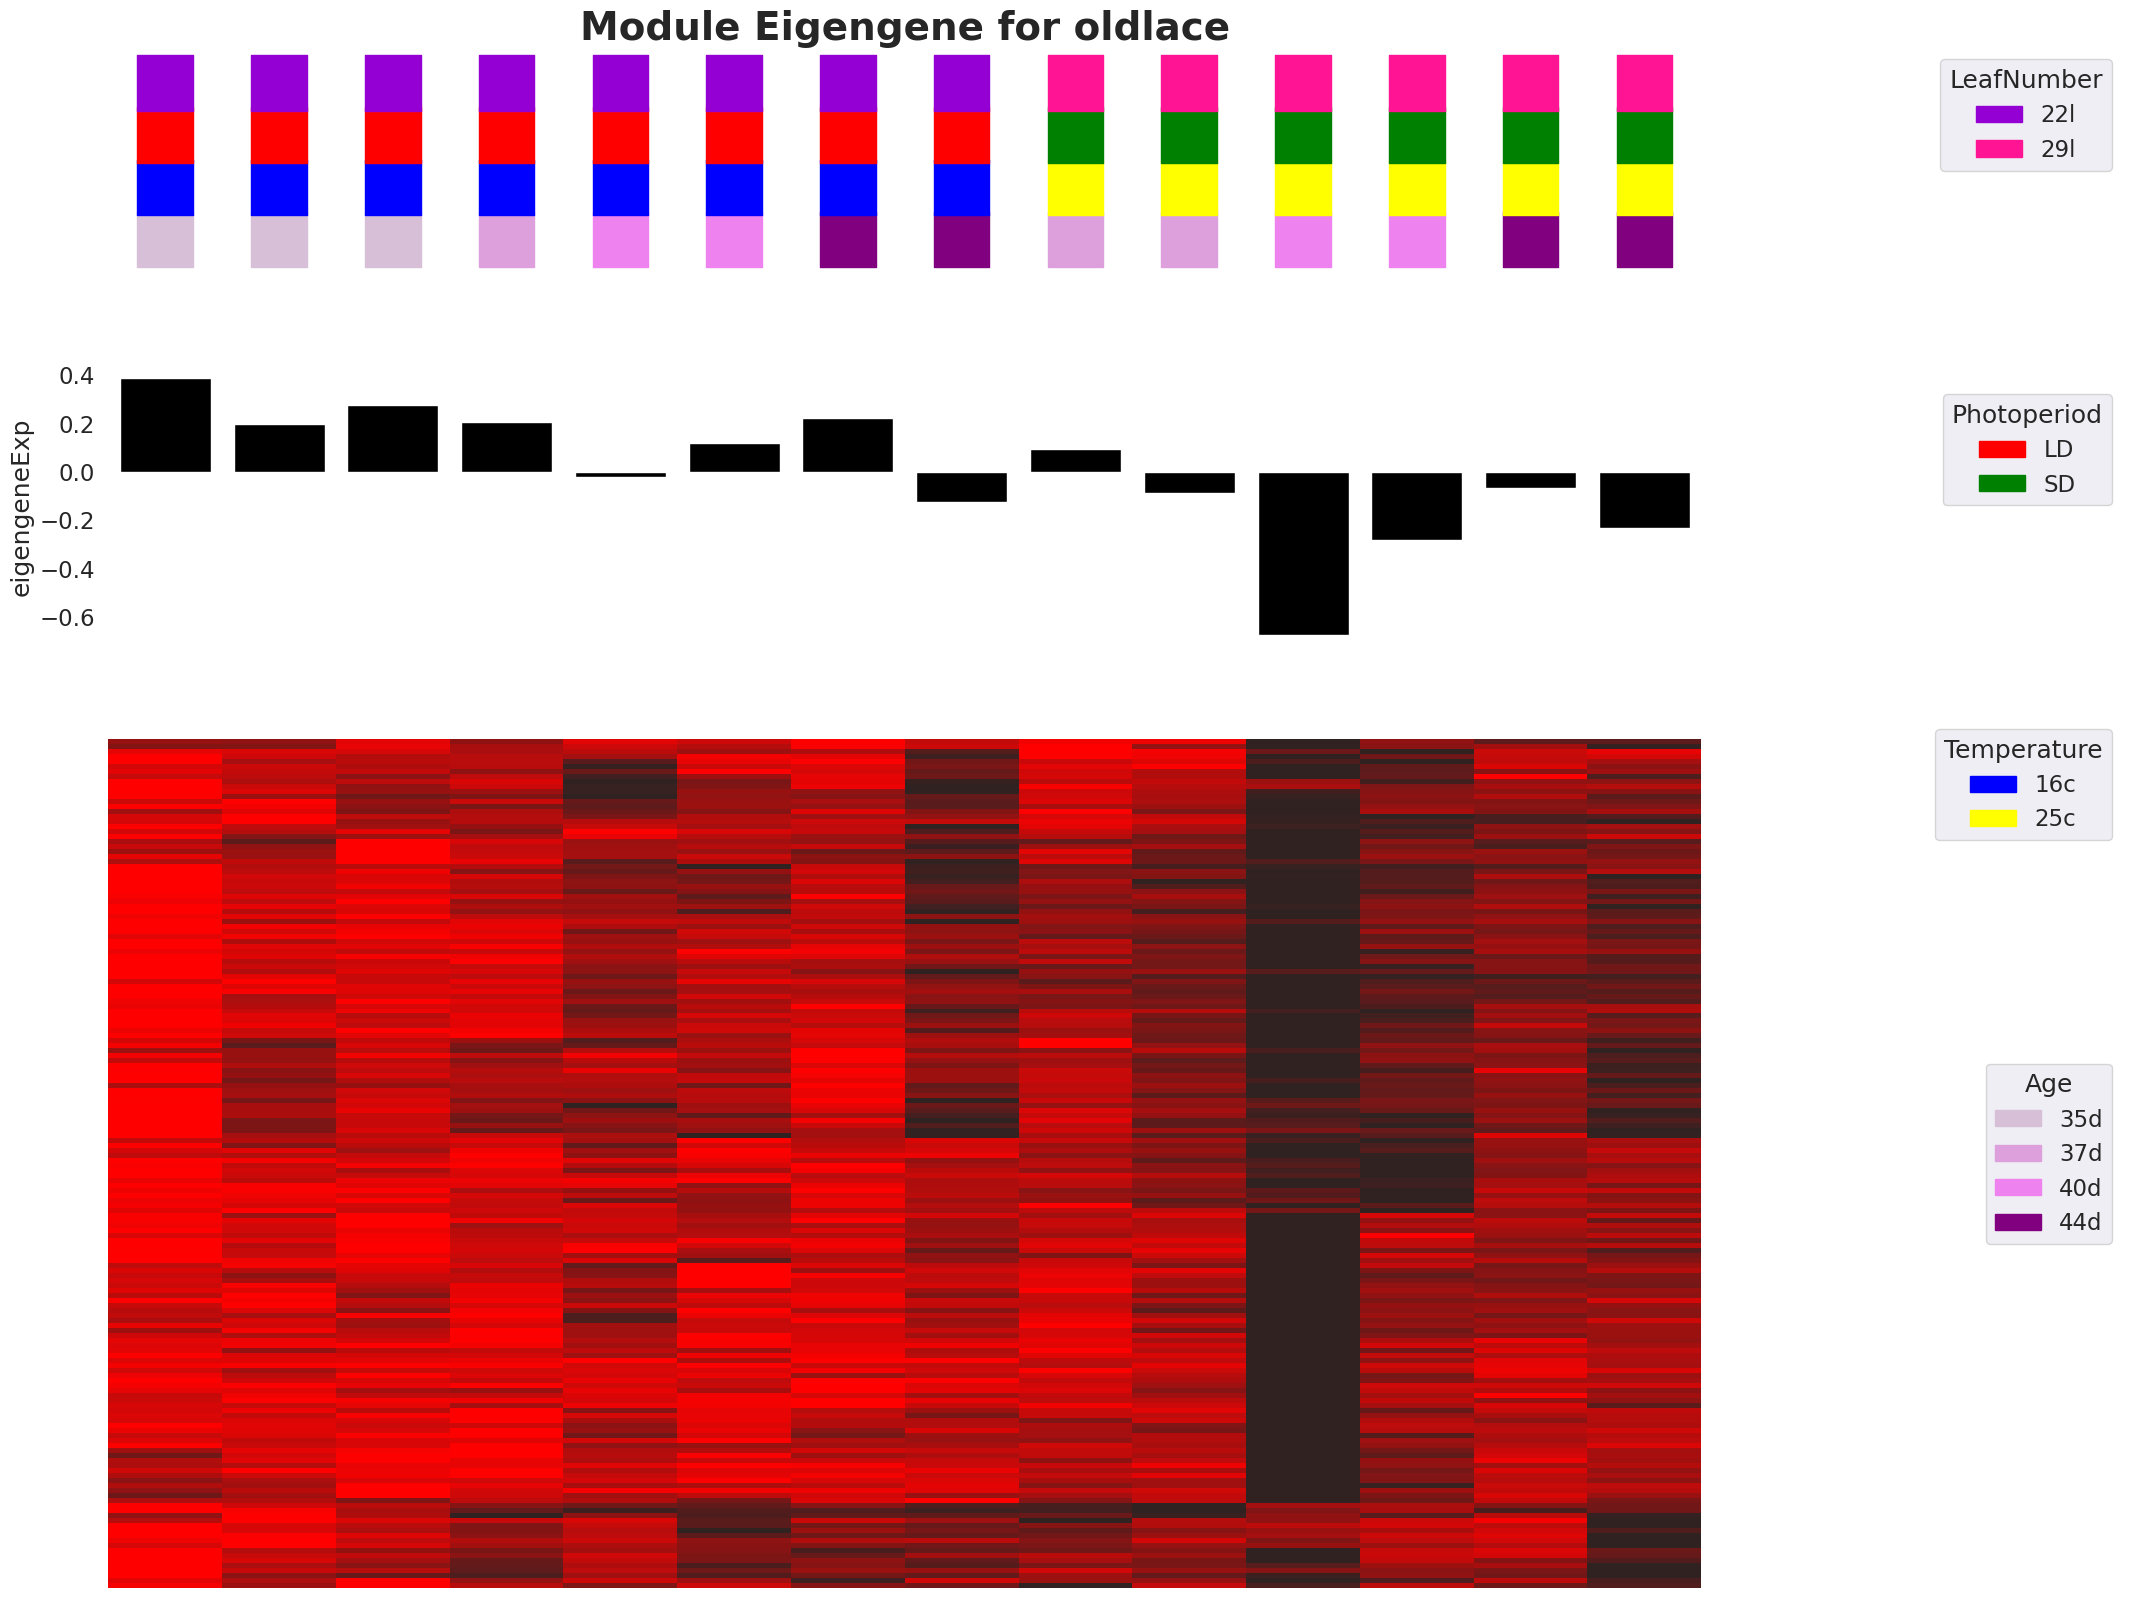

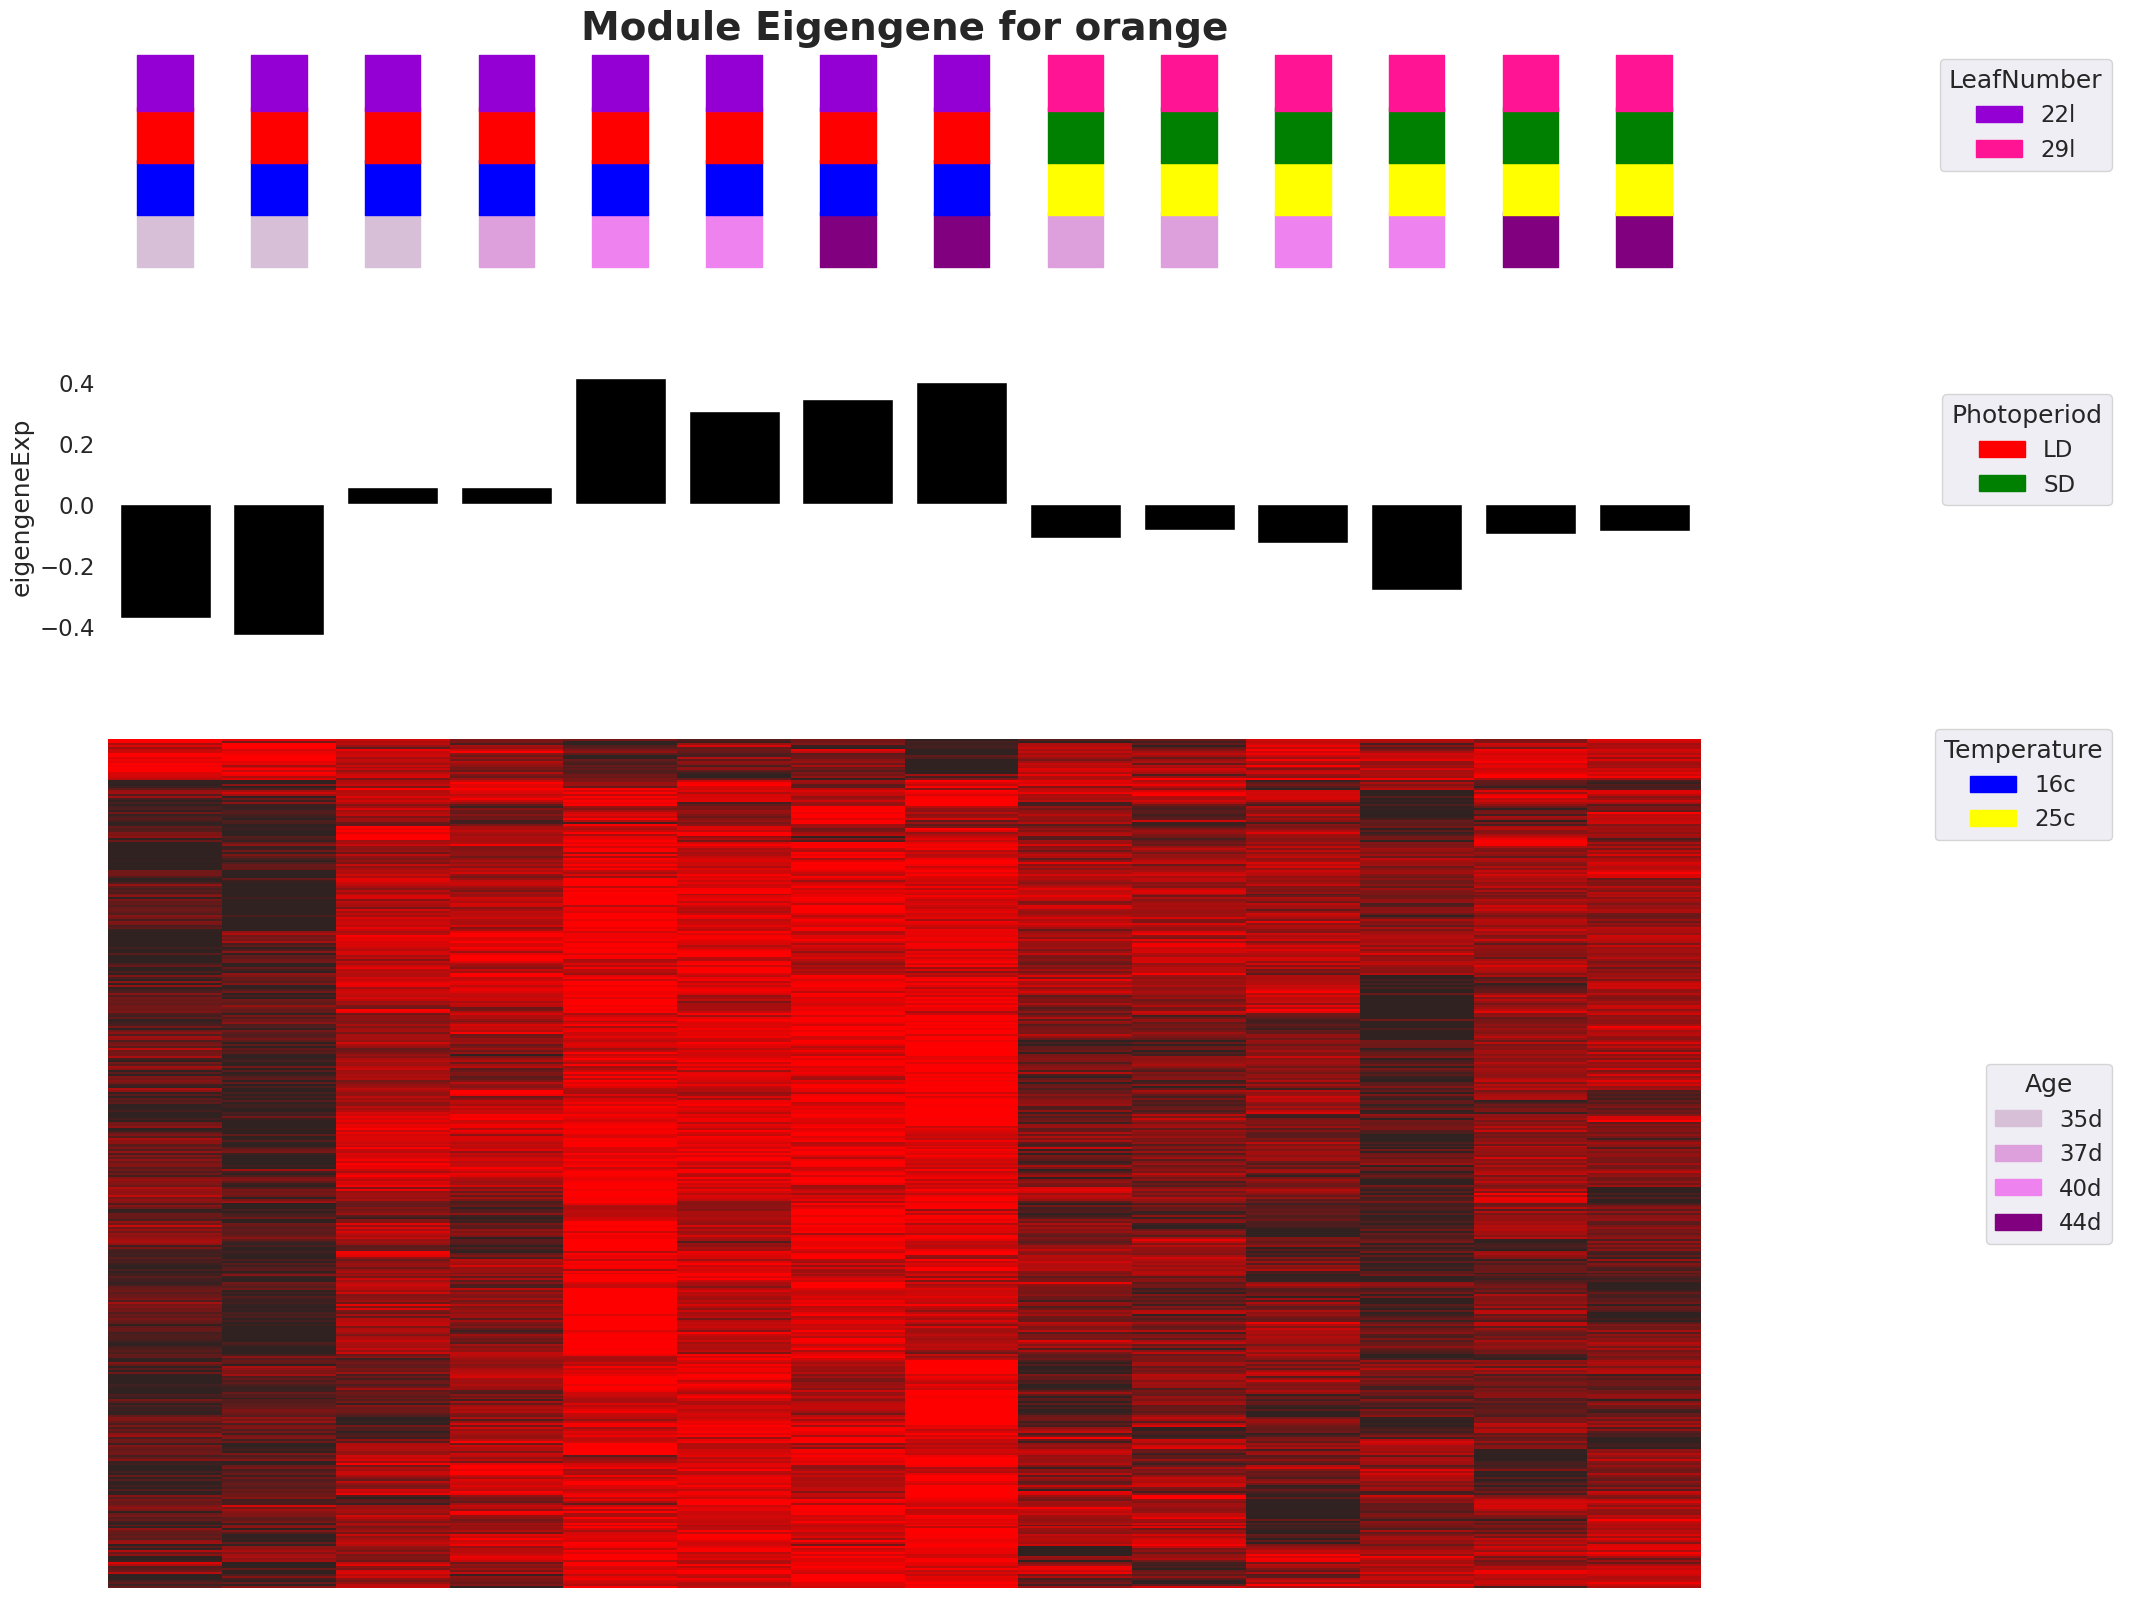

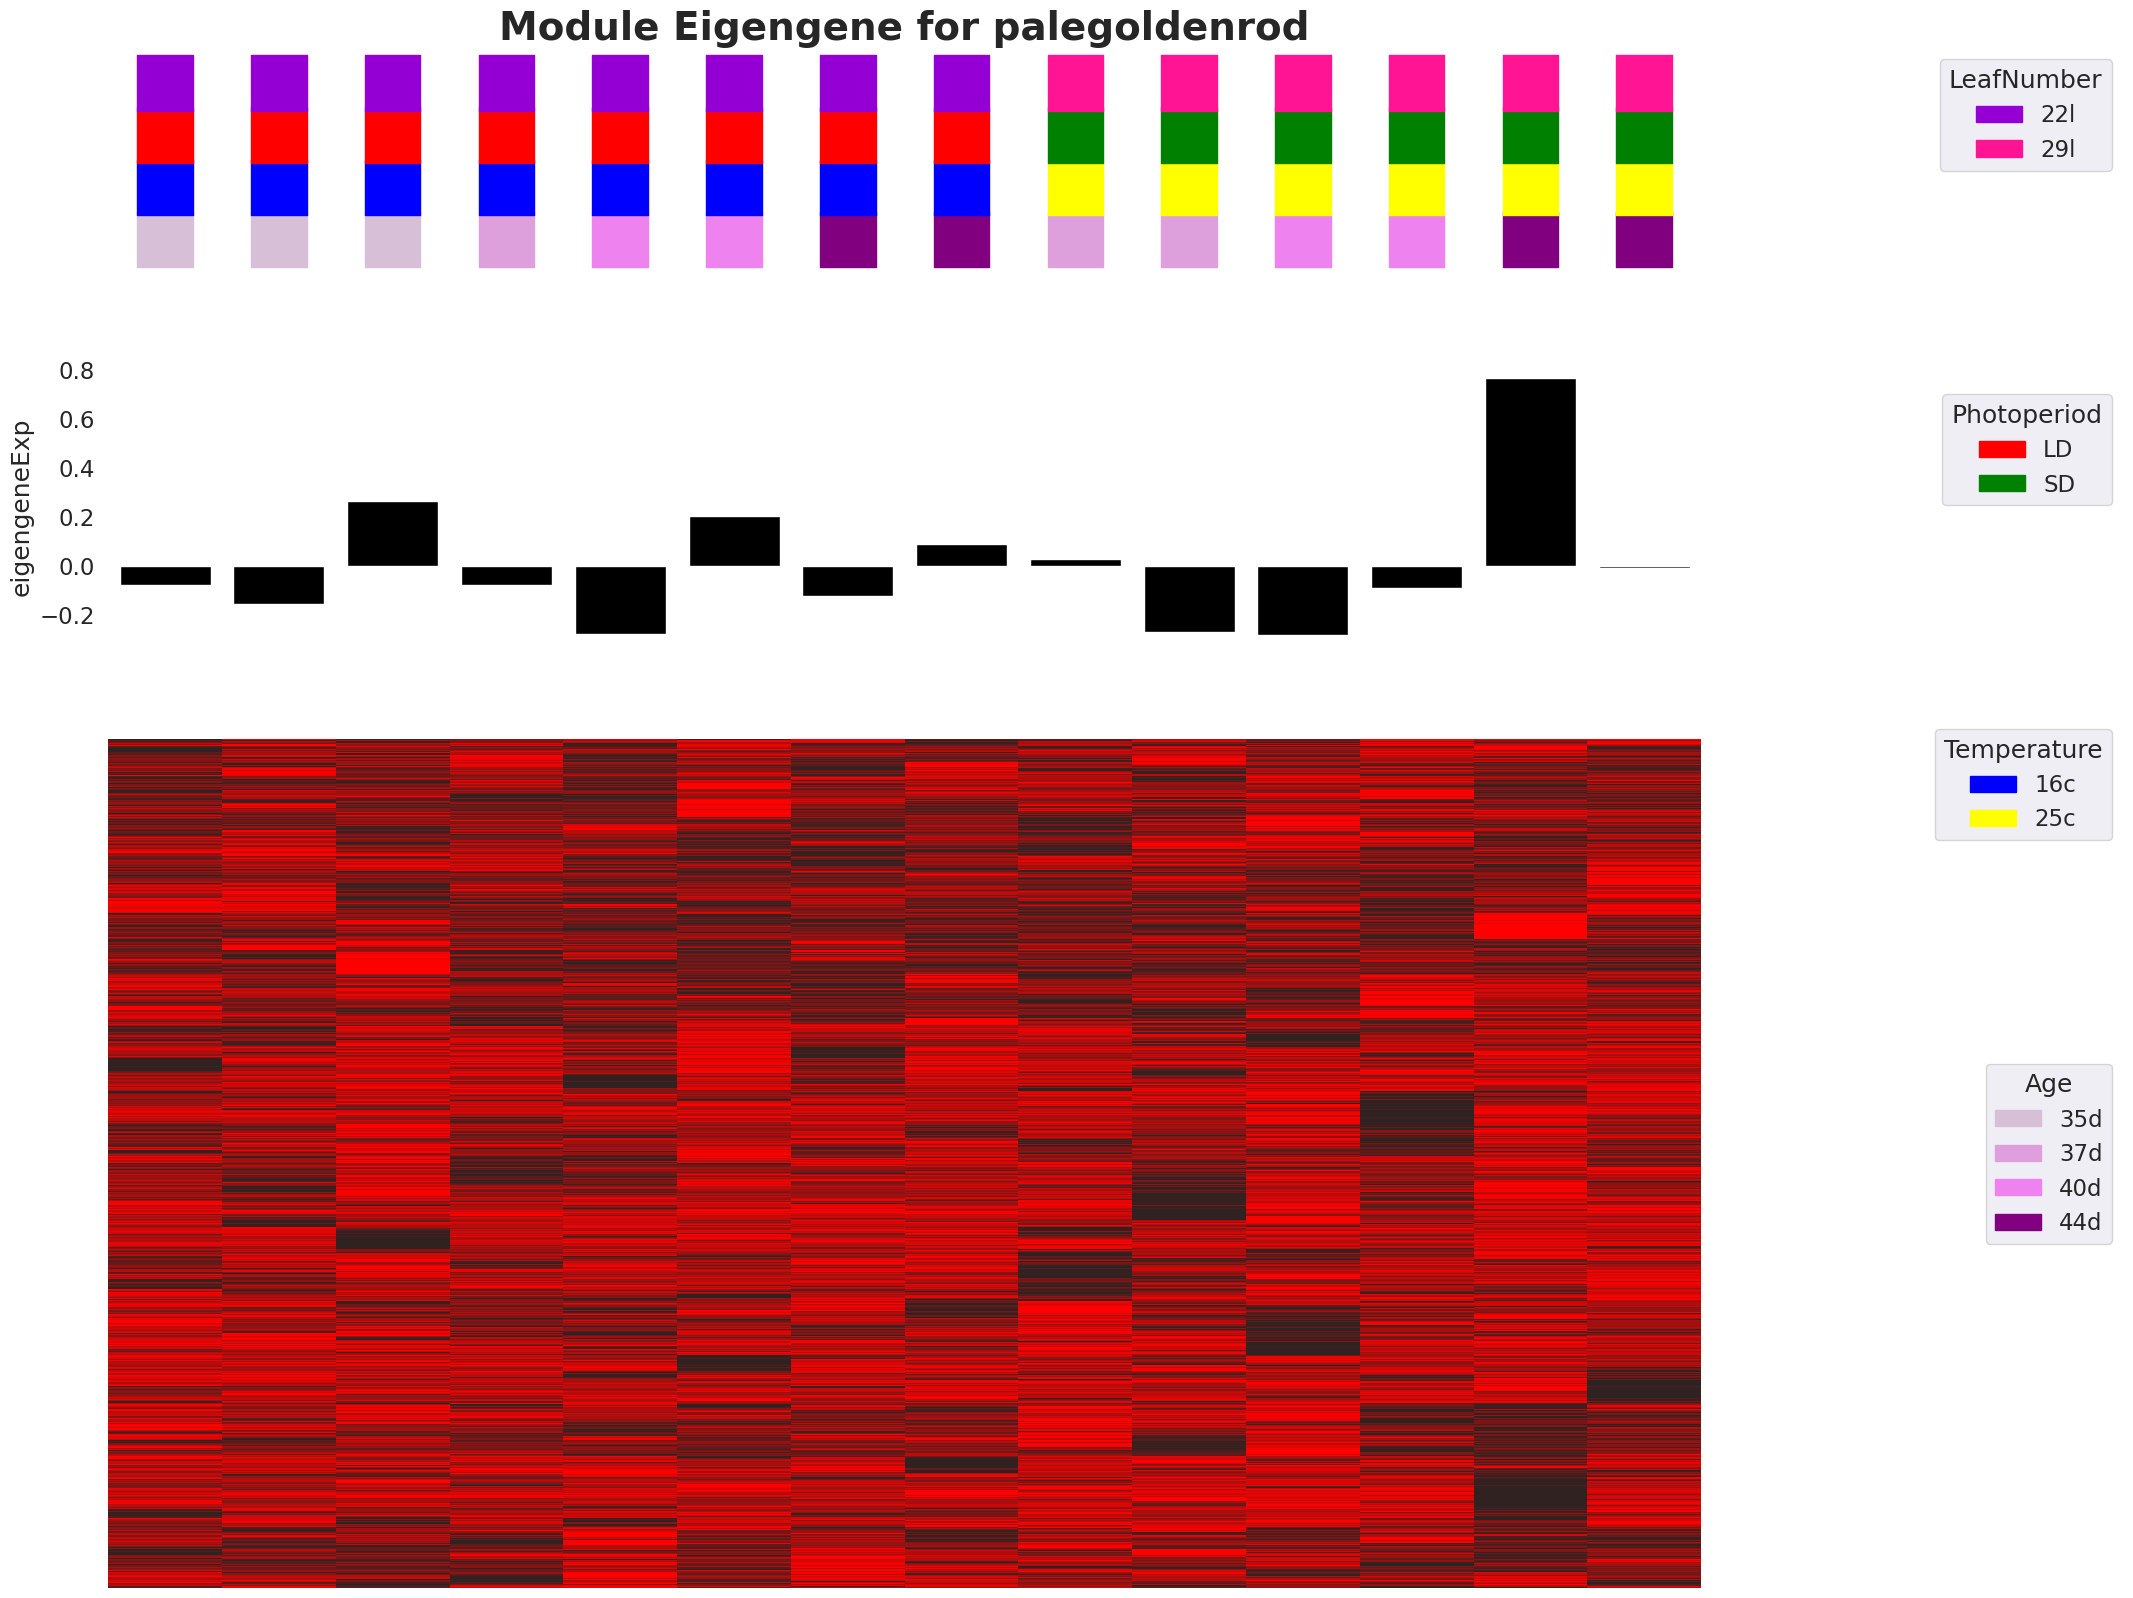

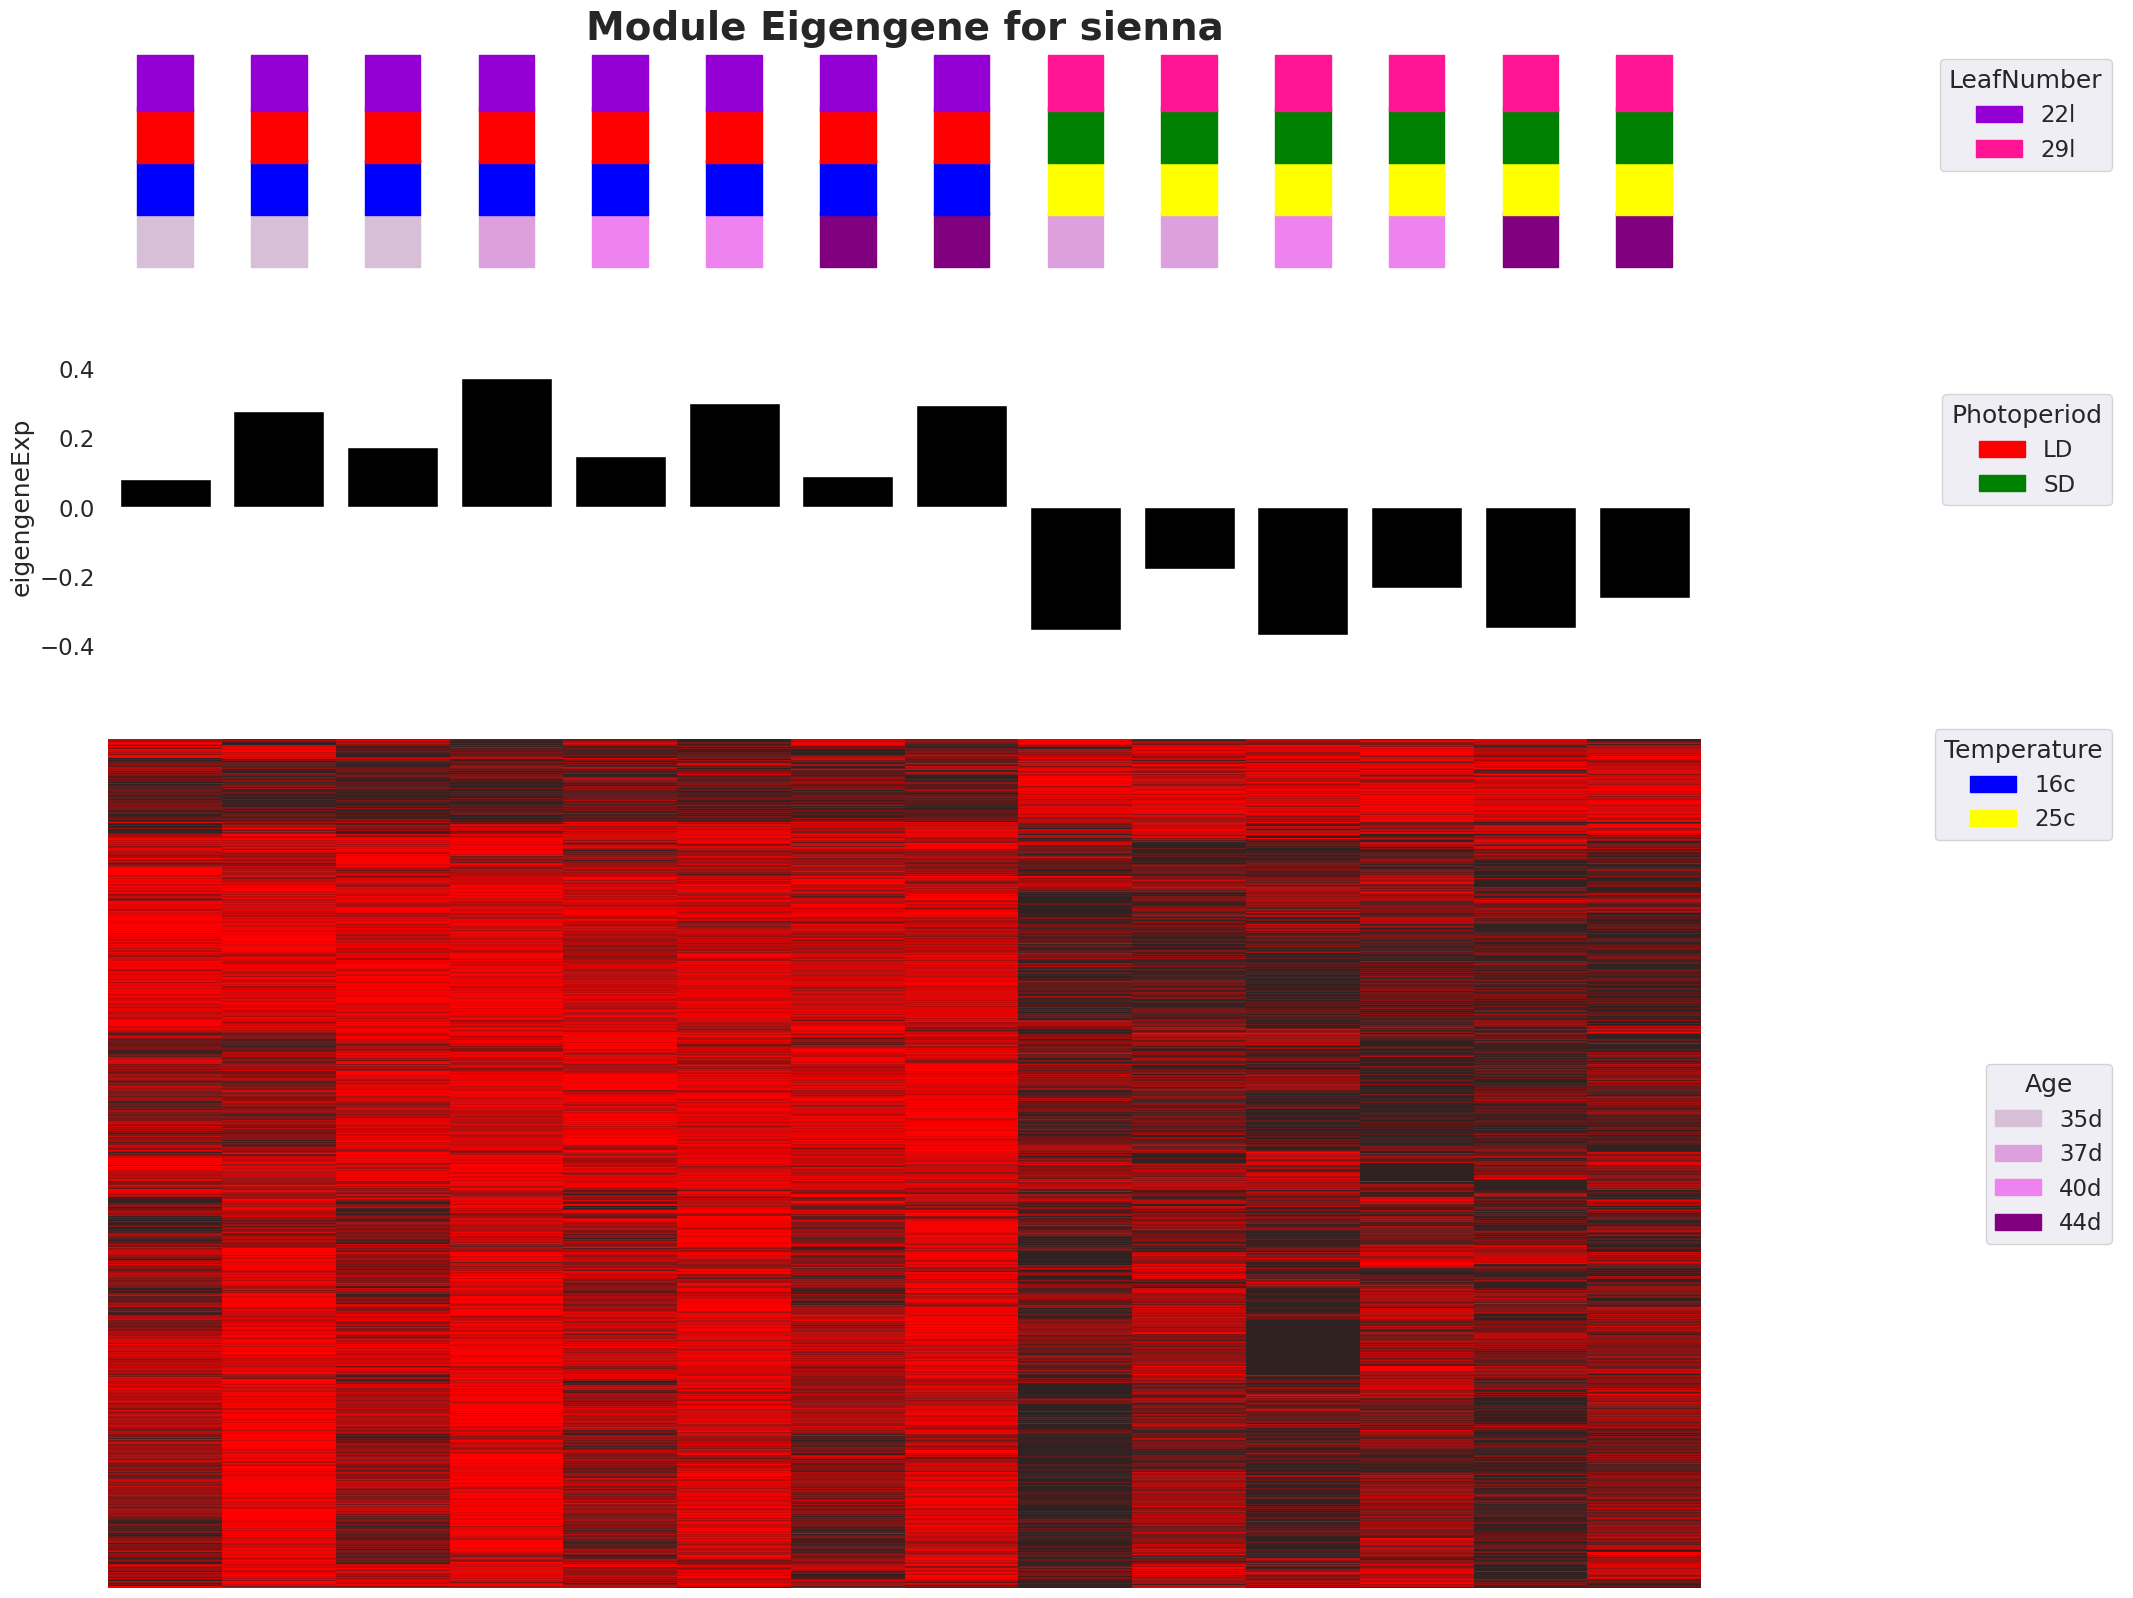

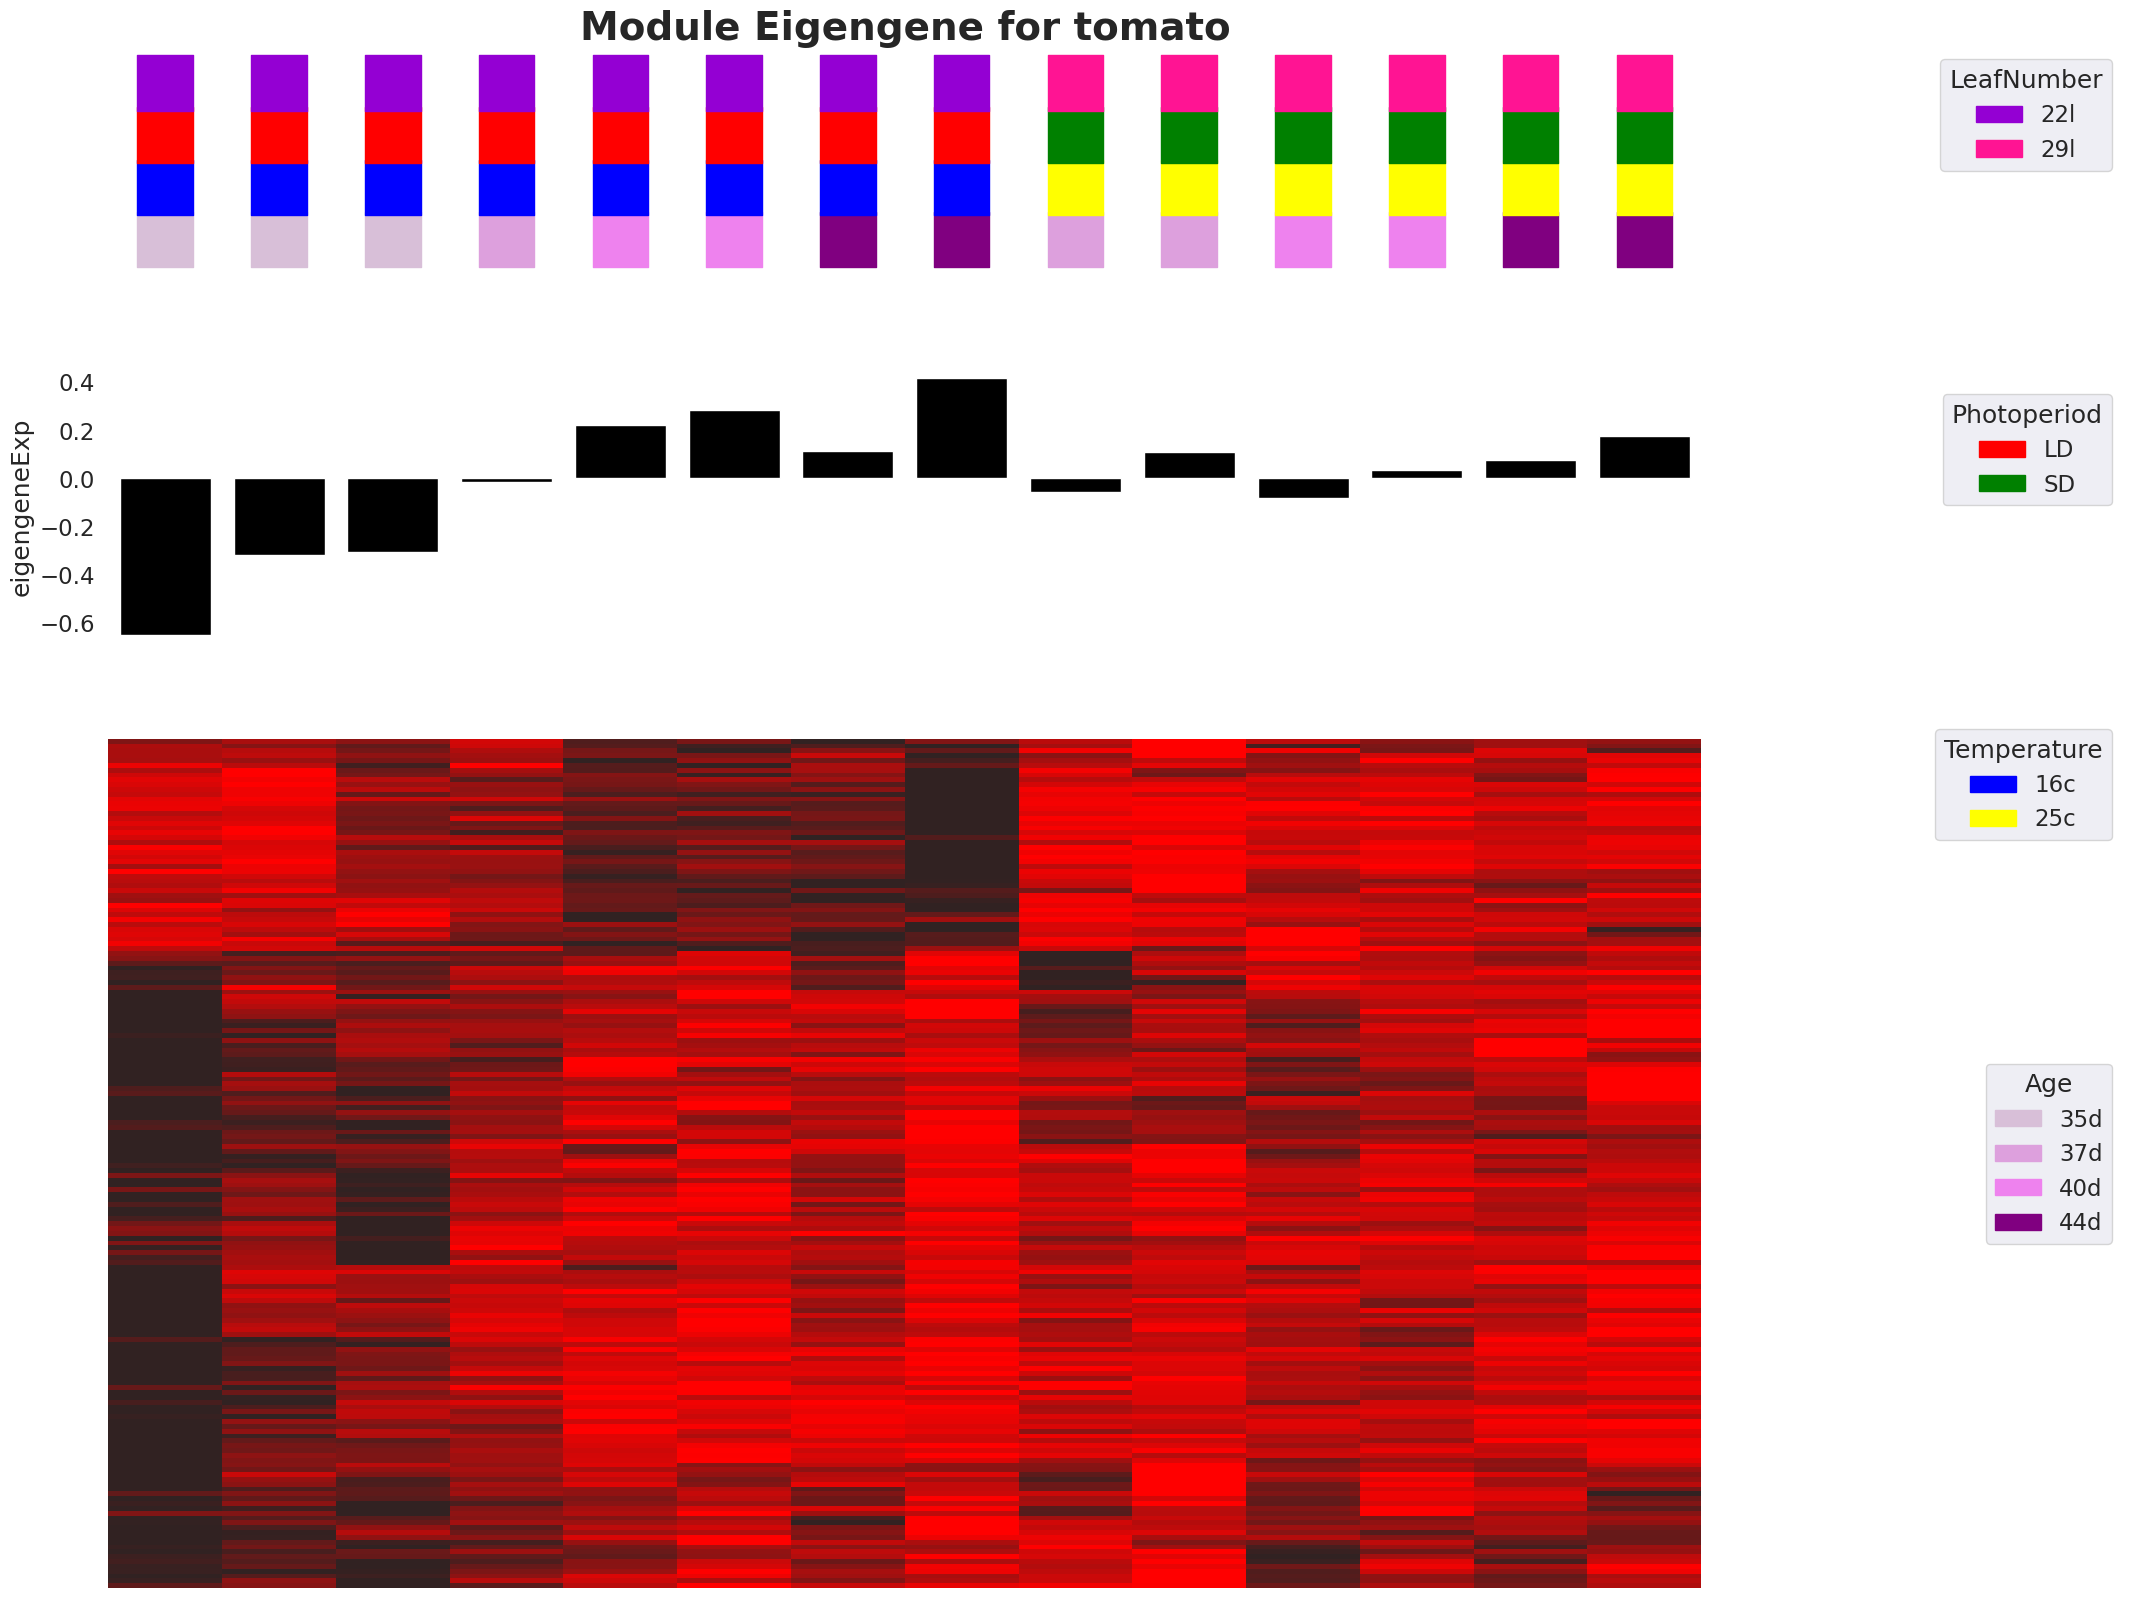

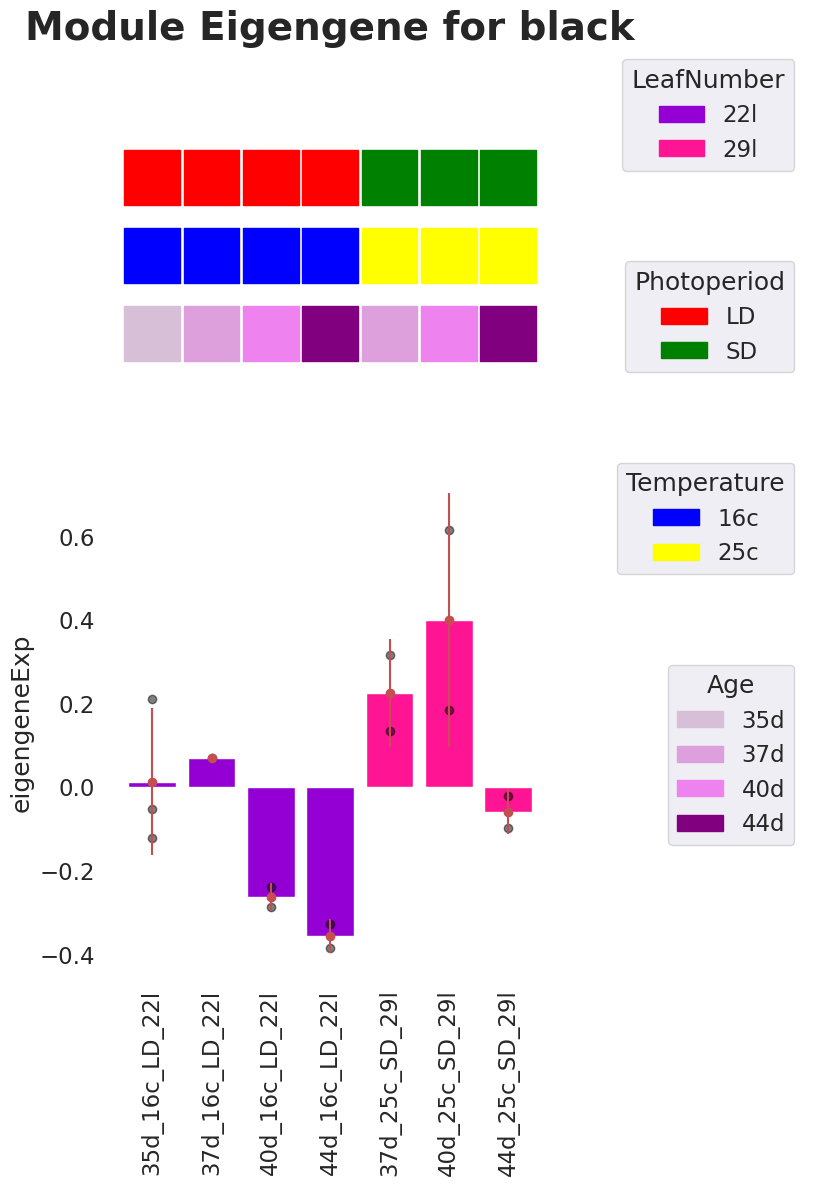

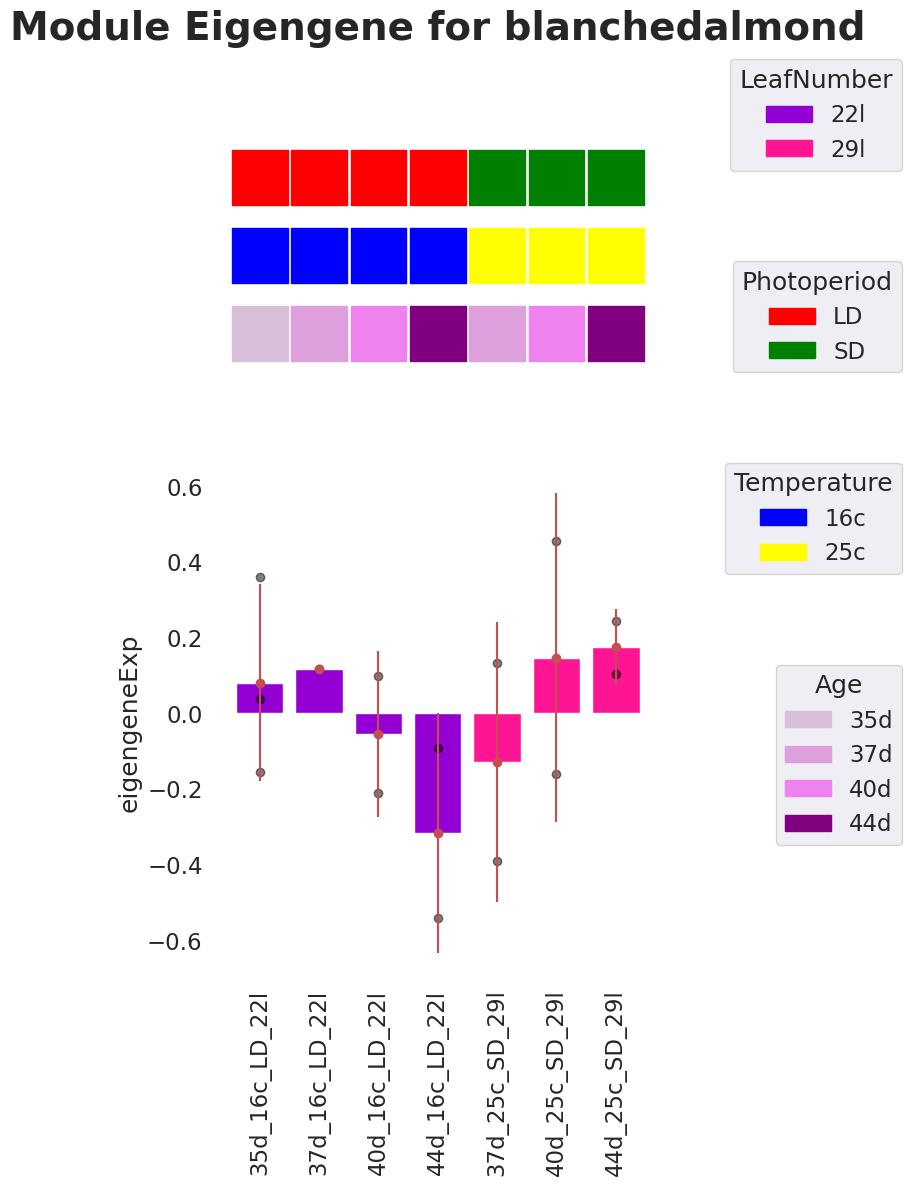

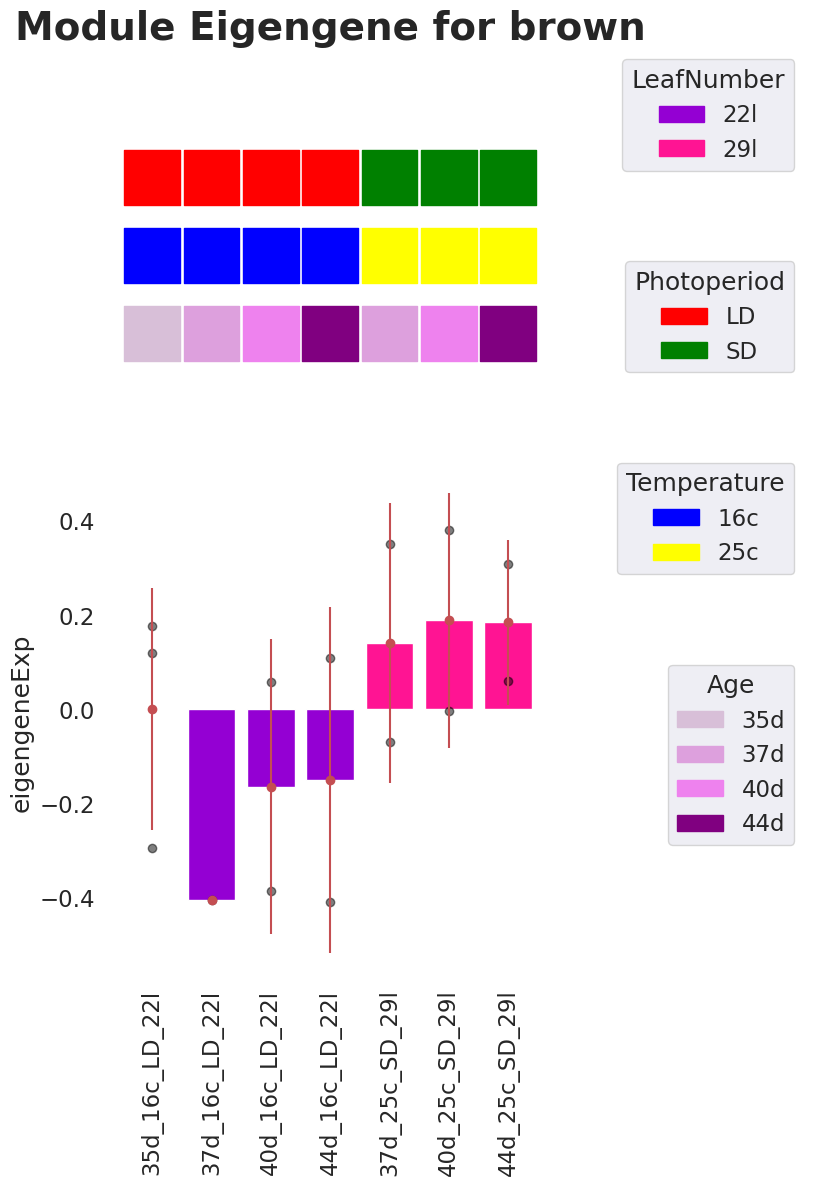

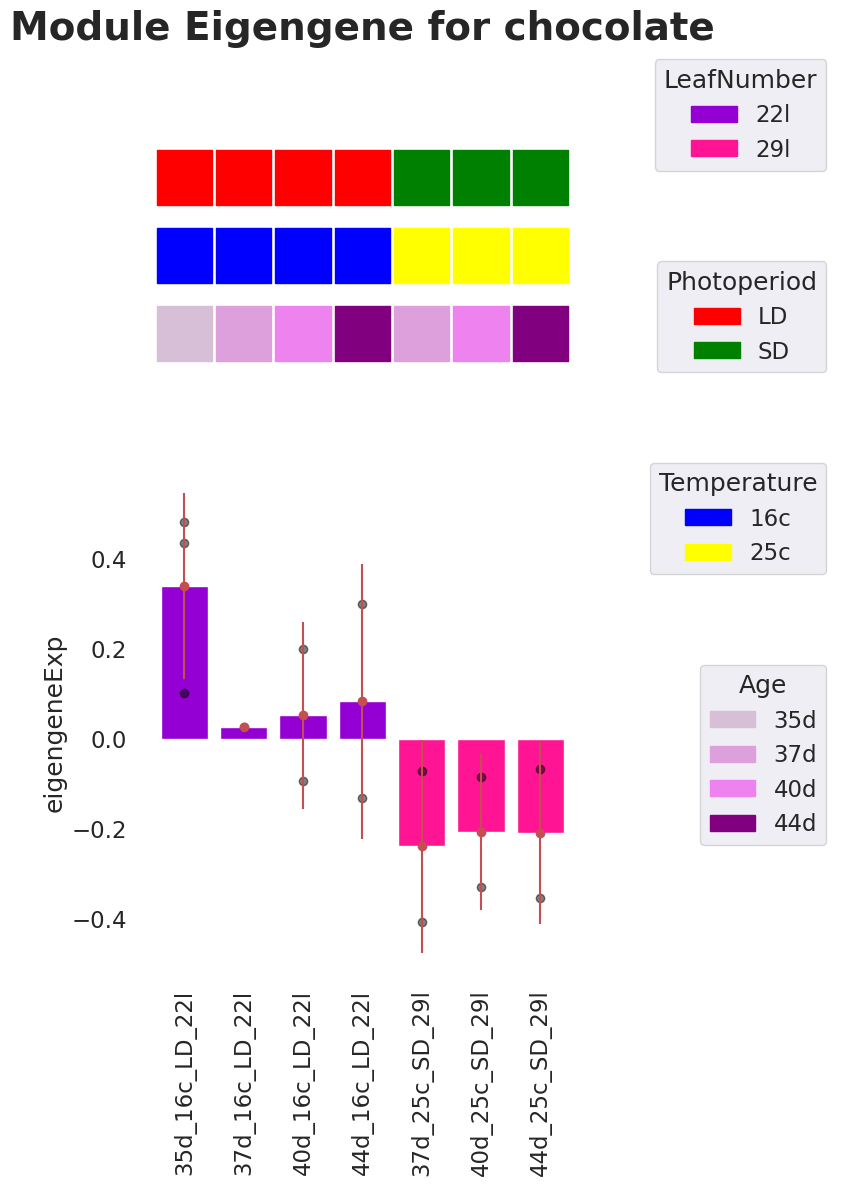

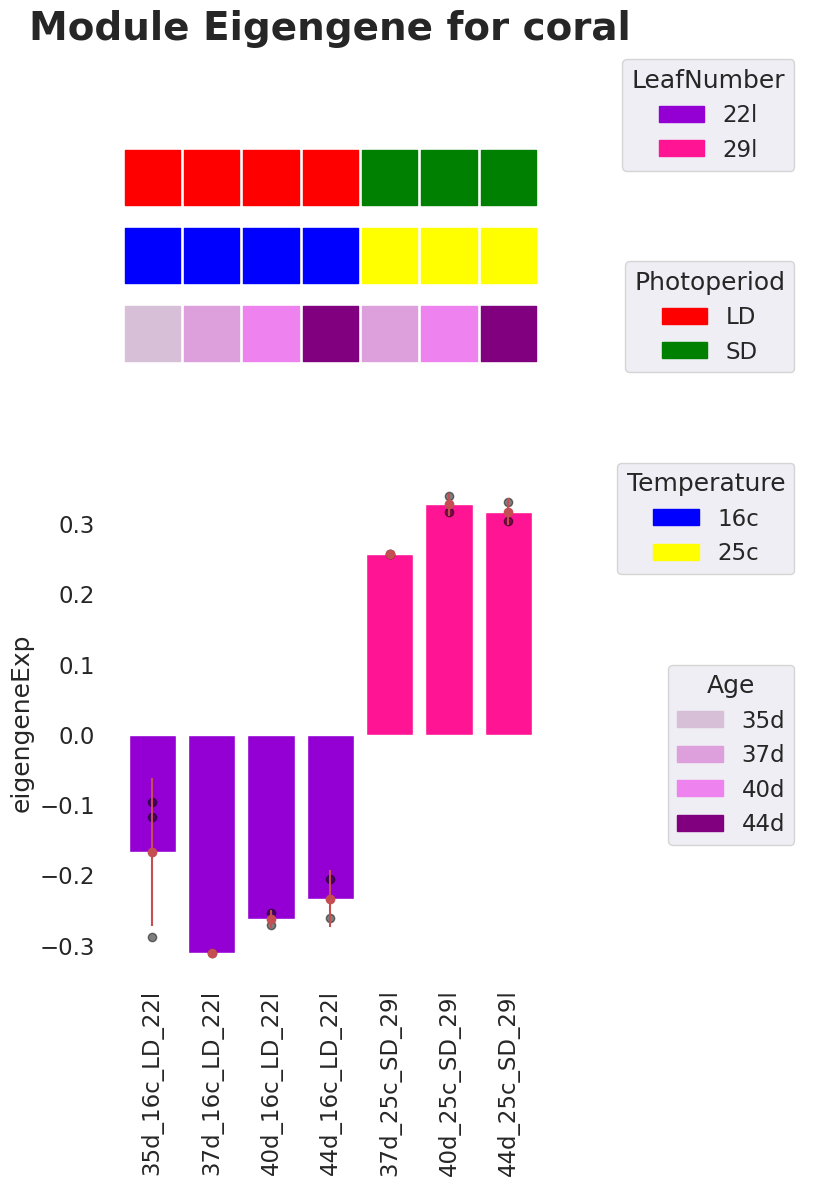

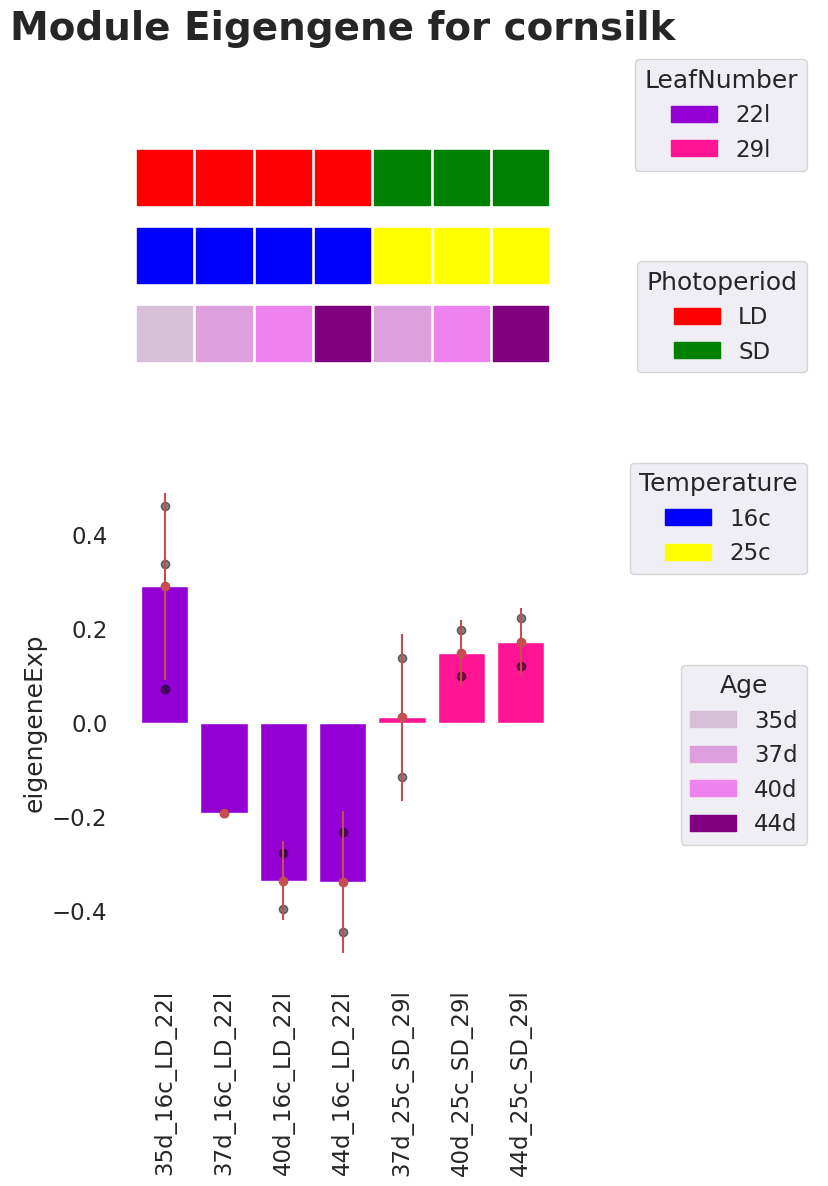

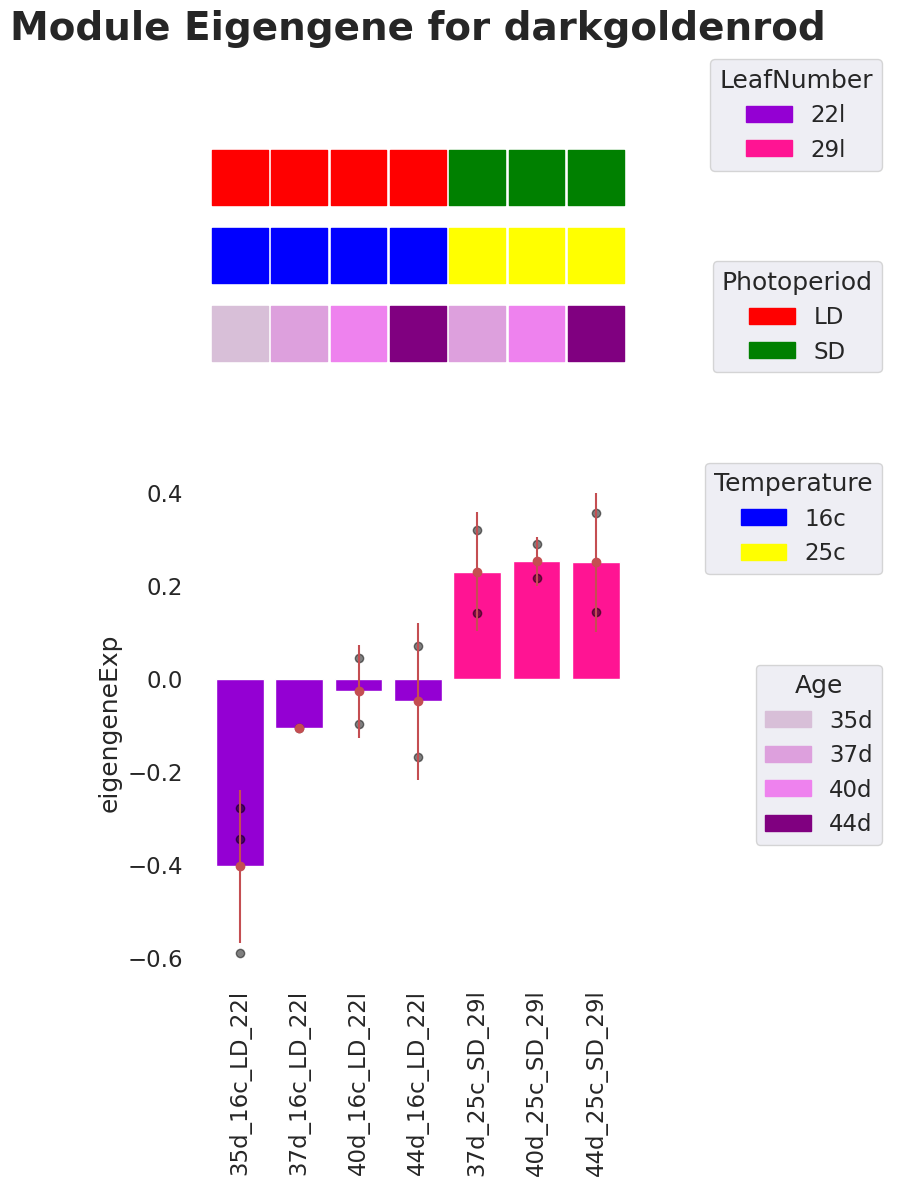

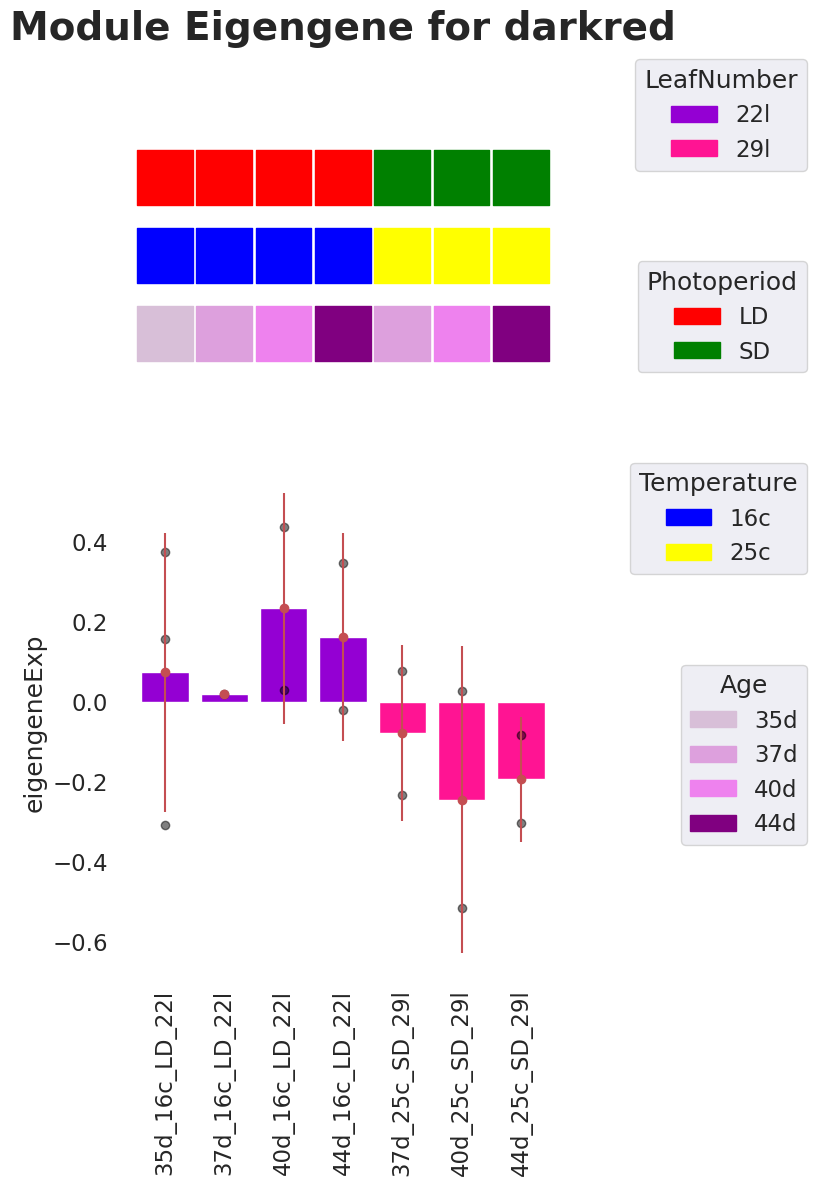

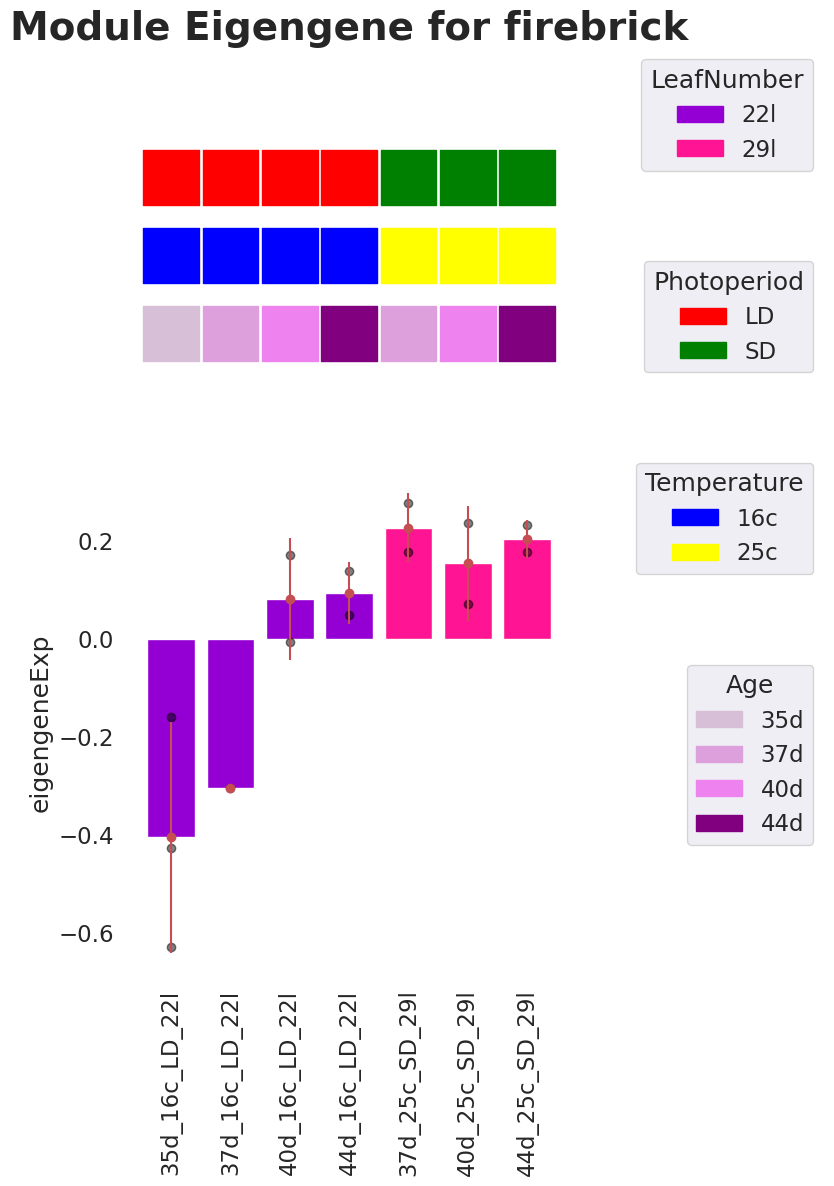

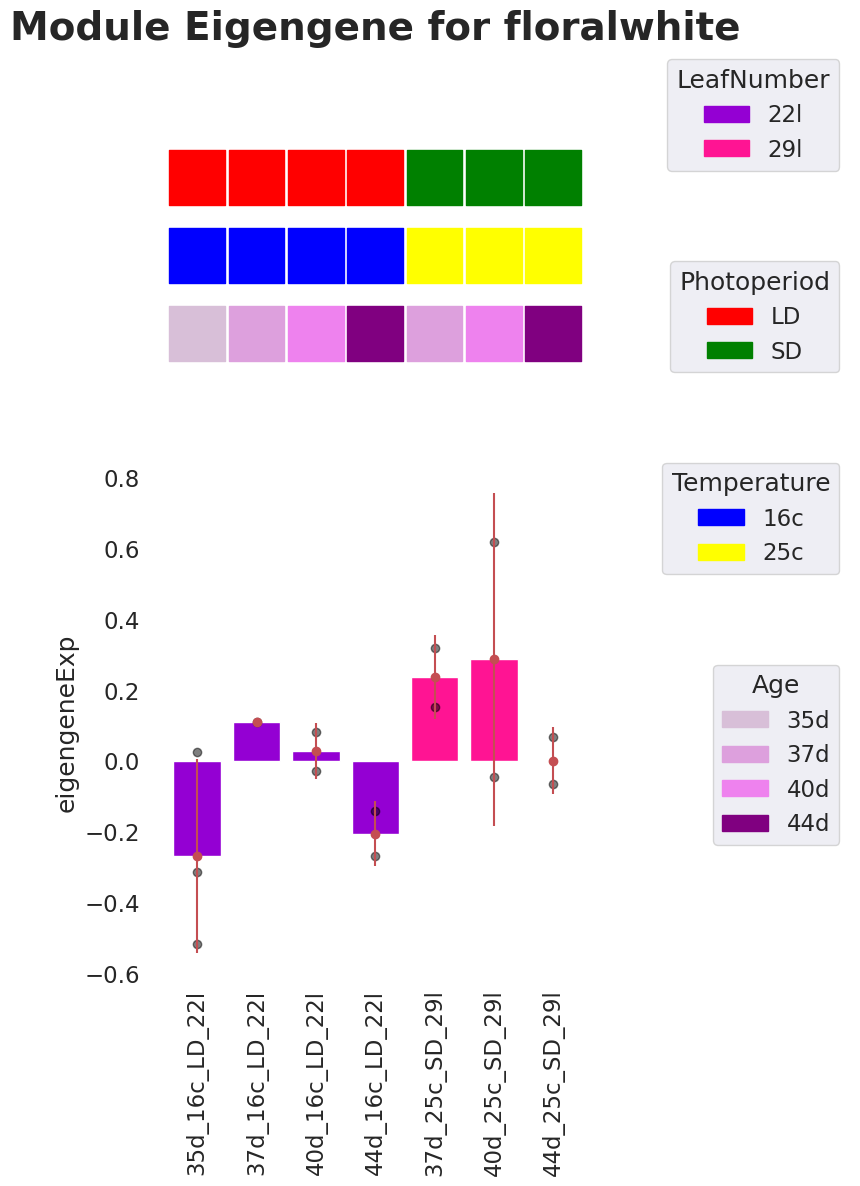

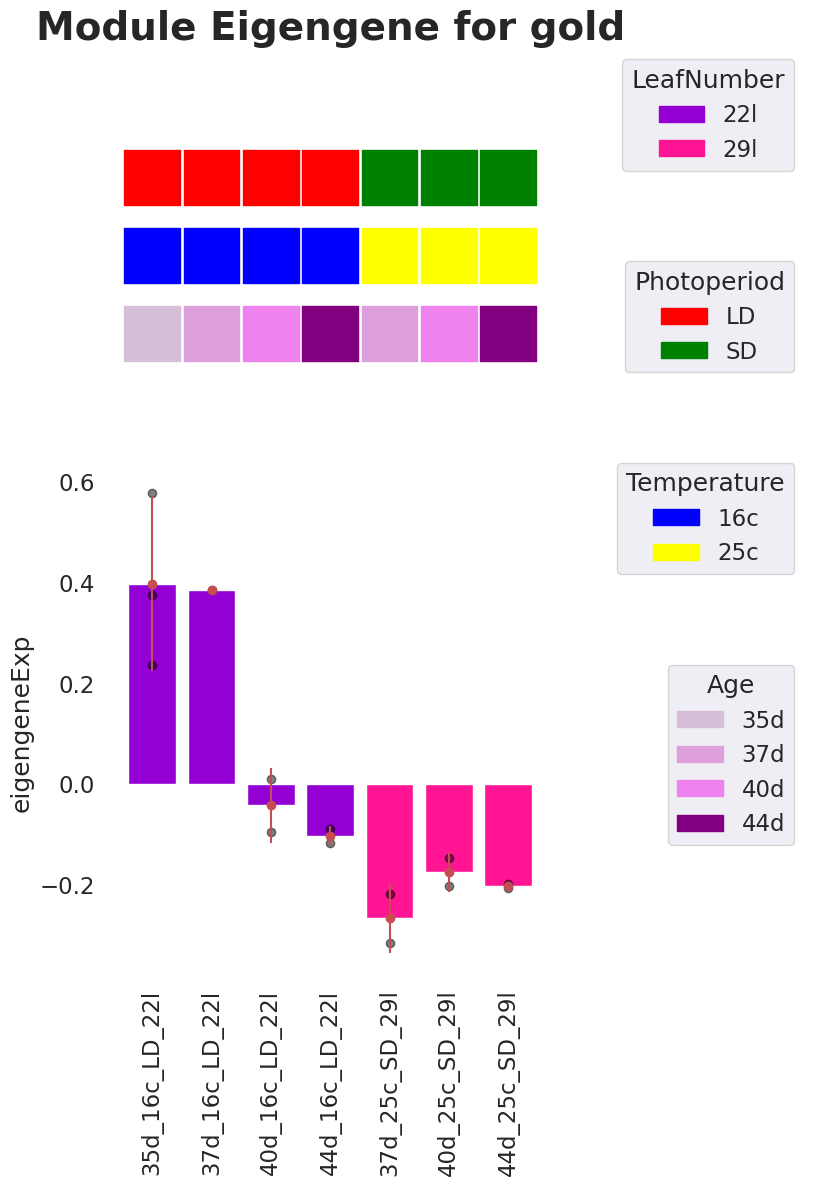

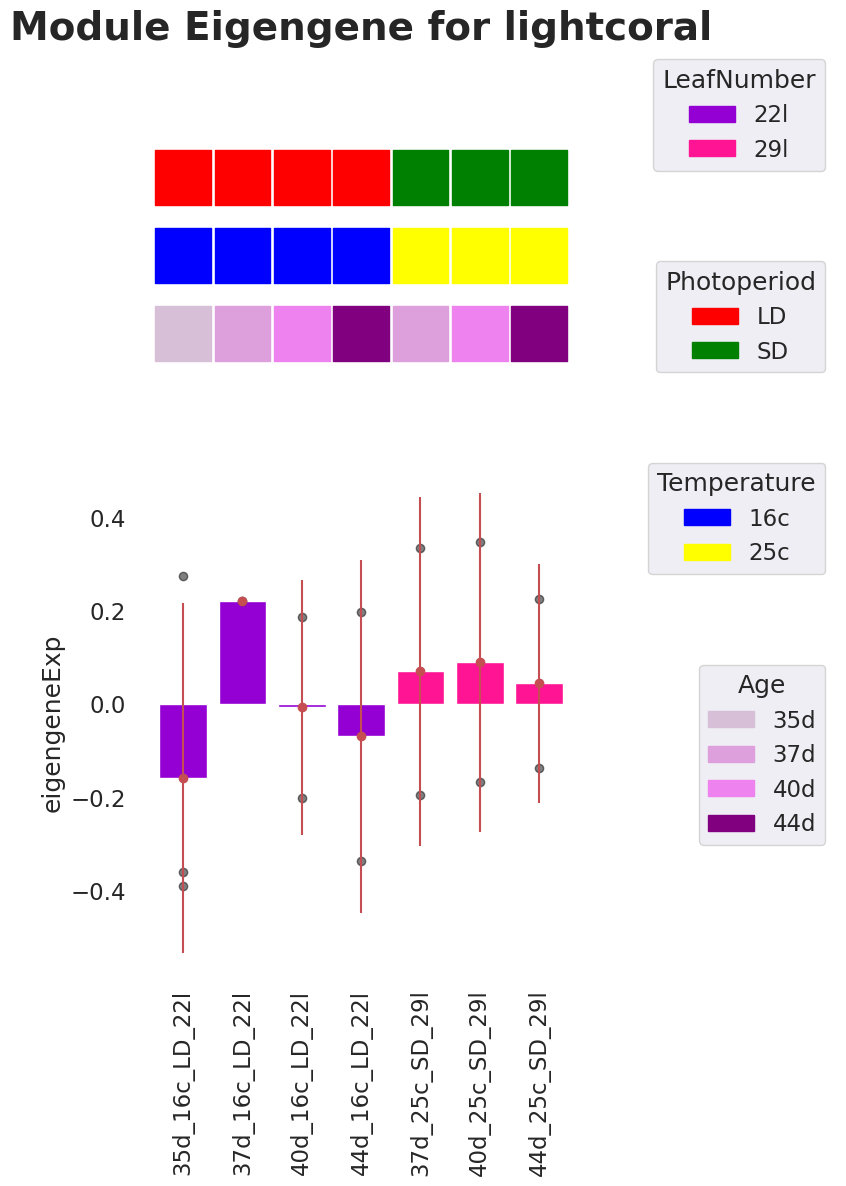

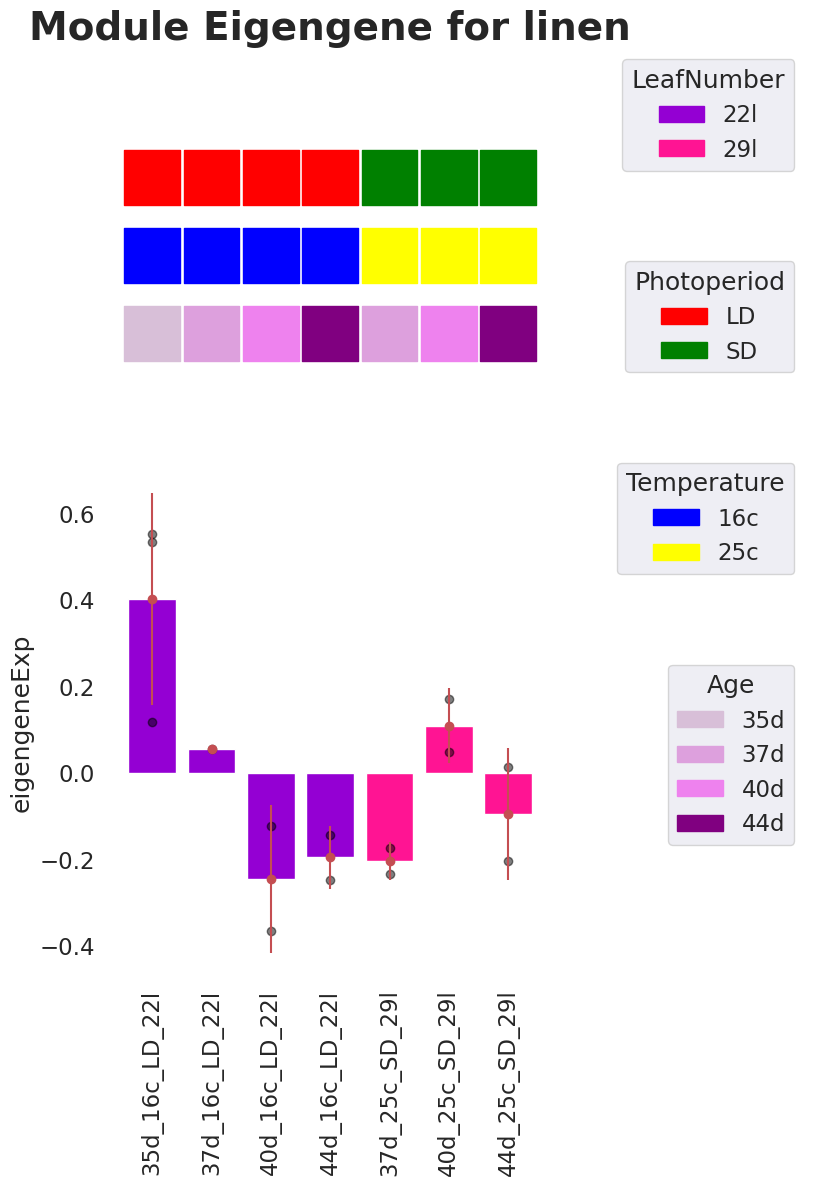

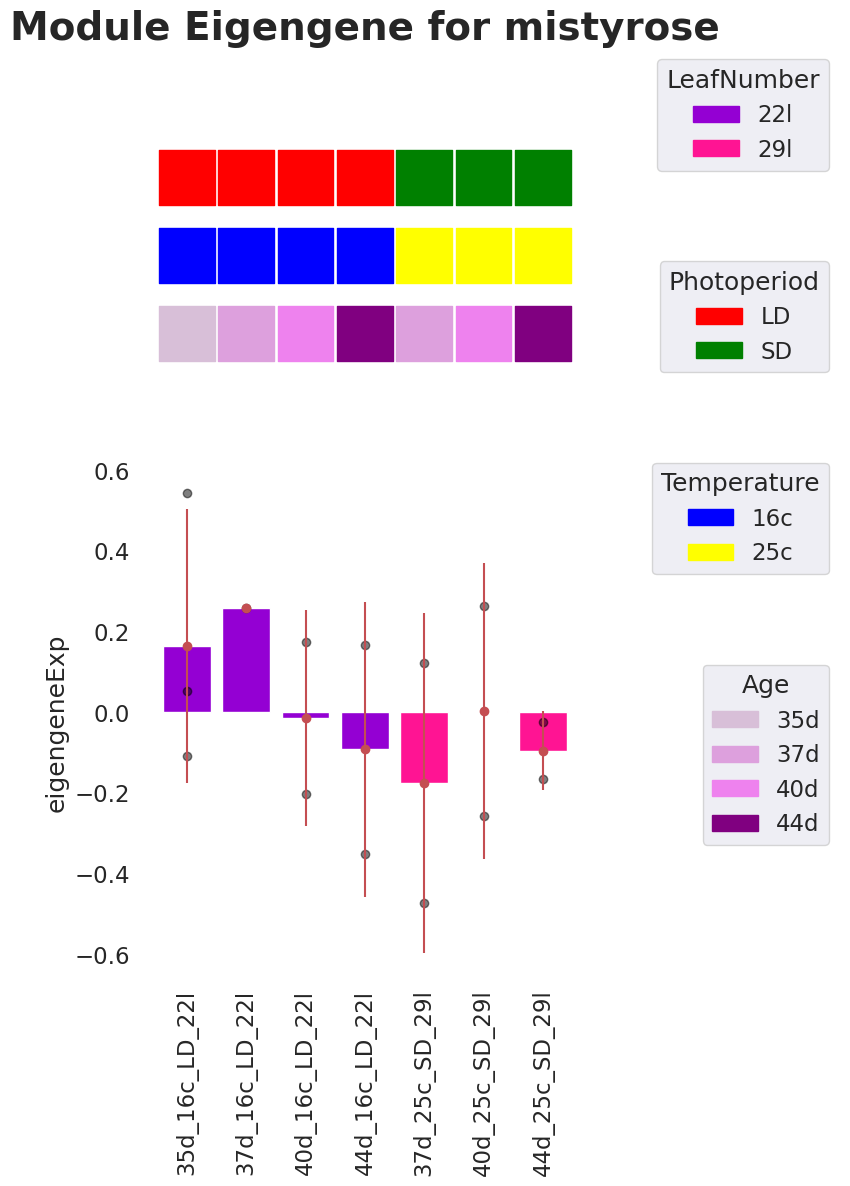

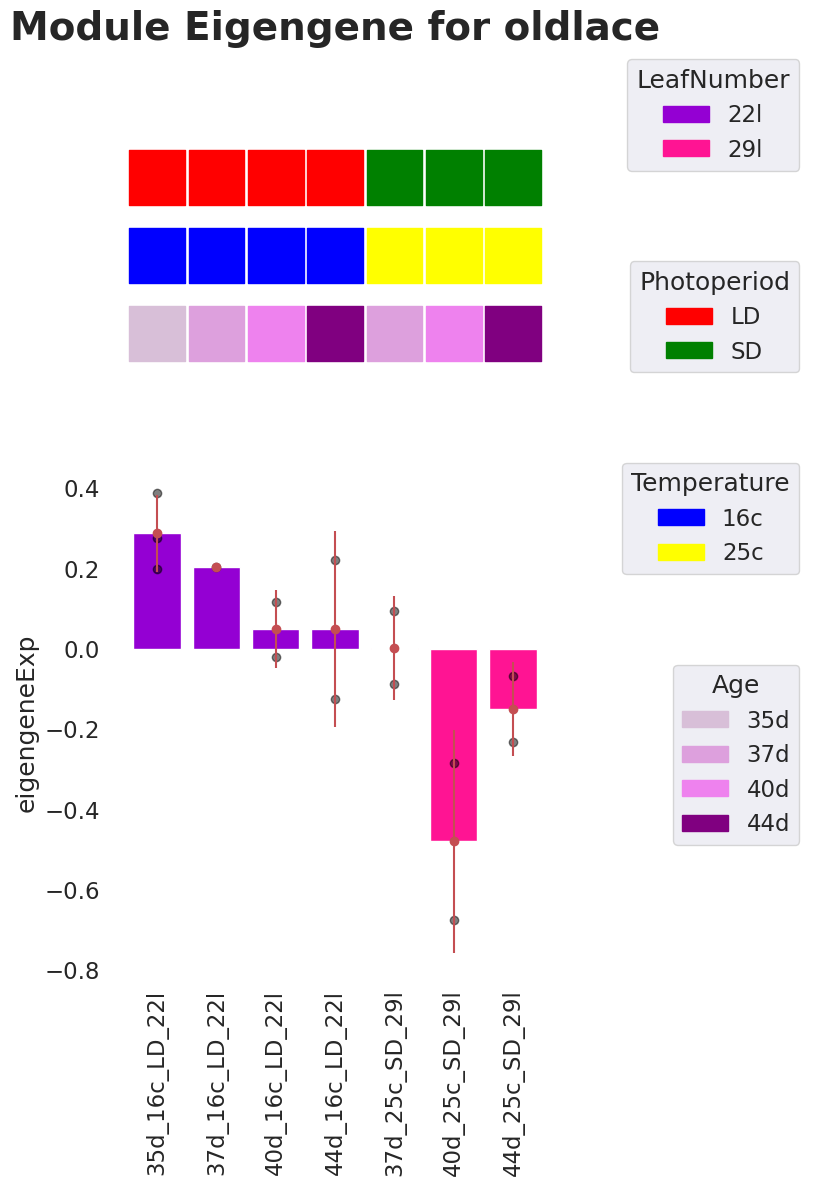

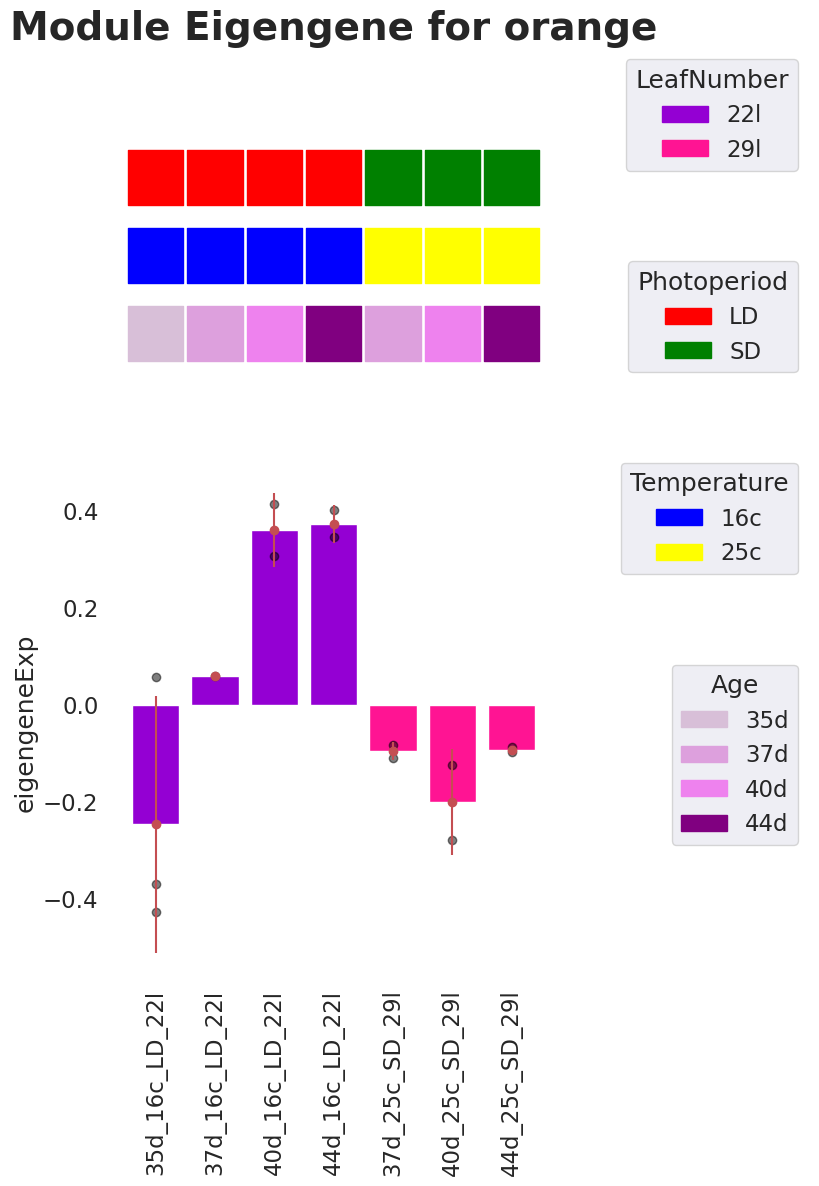

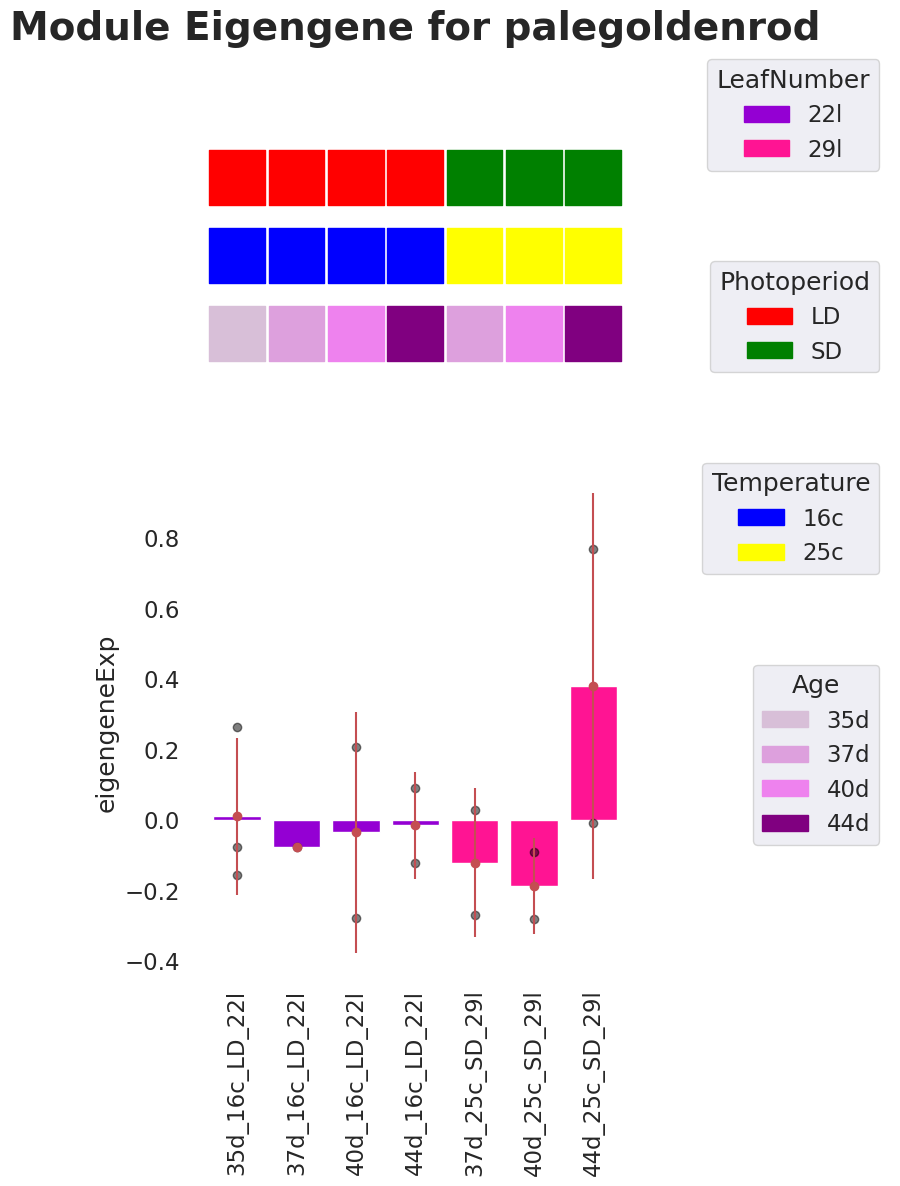

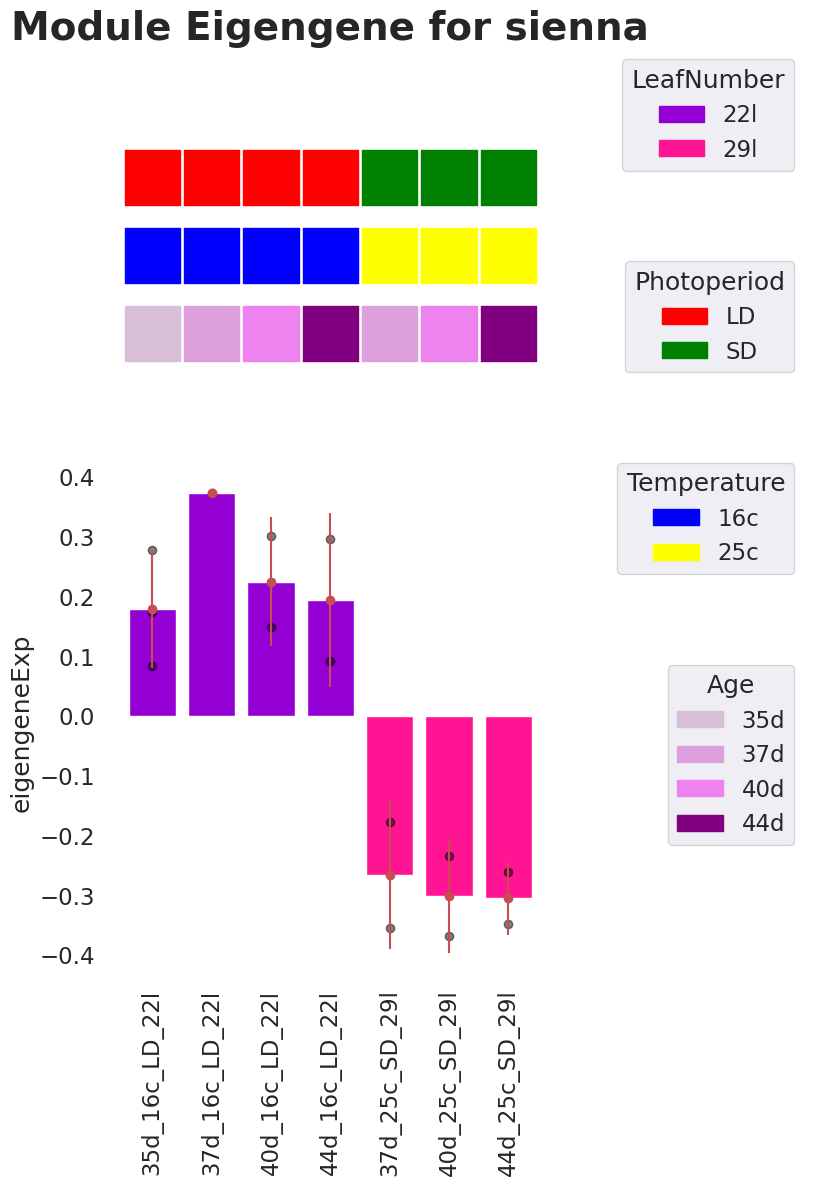

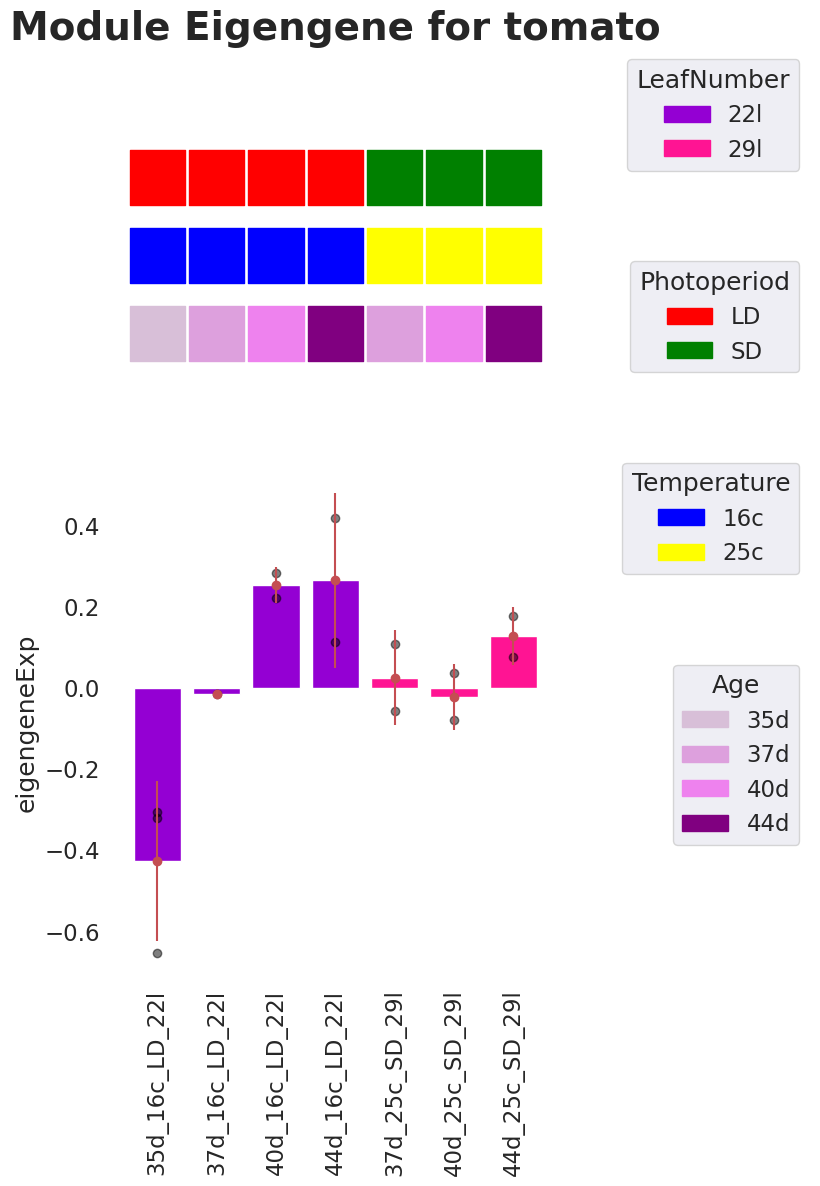

In [7]:
PyWGCNA_728_non_filt.analyseWGCNA(functional_enrichment_pvalue=0.05)

In [9]:
PyWGCNA_728_non_filt.saveWGCNA()

Saving WGCNA as E-MEXP-728-non-filtered-TPM6.p


In [8]:
PyWGCNA_728_non_filt = PyWGCNA.readWGCNA("E-MEXP-1304-TPM1.p")

Reading E-MEXP-1304-TPM1 WGCNA done!


In [ ]:
modules = PyWGCNA_728_non_filt.datExpr.var.moduleColors.unique().tolist()
PyWGCNA_728_non_filt.CoexpressionModulePlot(modules=modules, numGenes=100, numConnections=1000, minTOM=0, file_name="all")

# Hub Genes

In [9]:
PyWGCNA_728_non_filt.top_n_hub_genes(moduleName='dimgrey', n=5)

calculating adjacency matrix ...
	Done..



connectivity dynamicColors moduleColors  moduleLabels
AT1G67360    690.332038       dimgrey      dimgrey             1
AT3G23810    690.095997       dimgrey      dimgrey             1
AT5G57960    689.781890       dimgrey      dimgrey             1
AT3G55120    689.713069       dimgrey      dimgrey             1
AT5G17050    689.417232       dimgrey      dimgrey             1

In [10]:
PyWGCNA_728_non_filt.top_n_hub_genes(moduleName='darkgrey', n=5)

calculating adjacency matrix ...
	Done..



connectivity dynamicColors moduleColors  moduleLabels
AT2G46550    421.938489      darkgrey     darkgrey             0
AT1G11260    421.938442      darkgrey     darkgrey             0
AT2G03310    421.422920      darkgrey     darkgrey             0
AT4G03510    419.638961      darkgrey     darkgrey             0
AT5G24490    417.900969      darkgrey     darkgrey             0

In [11]:
PyWGCNA_728_non_filt.top_n_hub_genes(moduleName='lightgrey', n=5)

calculating adjacency matrix ...
	Done..



connectivity dynamicColors moduleColors  moduleLabels
AT2G18360    159.528602     lightgrey    lightgrey             2
AT5G63560    159.434574     lightgrey    lightgrey             2
AT3G44540    158.876592     lightgrey    lightgrey             2
AT5G37690    157.310240     lightgrey    lightgrey             2
AT4G33070    157.132347     lightgrey    lightgrey             2

## Functional Enrichment Plot

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [15]:
# Read the dataset
df = pd.read_csv("fea-728.csv", header=0, sep=";")
df

biological_process    module_name  \
0                  regulation of response to stimulus     Lightcoral   
1             regulation of photoperiodism, flowering     Lightcoral   
2         cellular response to environmental stimulus     Lightcoral   
3               cellular response to abiotic stimulus     Lightcoral   
4                                    response to cold     Lightcoral   
5                    response to temperature stimulus     Lightcoral   
6                                    response to heat         Sienna   
7                    response to temperature stimulus         Sienna   
8                          response to light stimulus        Oldlace   
9                        response to abiotic stimulus        Oldlace   
10                           response to low humidity        Oldlace   
11                      response to external stimulus  Darkgoldenron   
12                        response to light intensity      Firebrick   
13                       response to abiotic stimulus      Firebrick   
14                         response to light stimulus          Brown   
15                cadmium ion transmembrane transport          Black   
16                                   response to cold          Coral   
17                   response to temperature stimulus          Coral   
18            regulation of photoperiodism, flowering          Coral   
19                 regulation of response to stimulus          Coral   
20                         response to light stimulus          Coral   
21                                   response to cold         Orange   
22                   response to temperature stimulus         Orange   
23                cellular response to light stimulus         Orange   
24                               response to stimulus        Darkred   
25                          photoperiodism, flowering  Palegoldenrod   
26  vegetative to reproductive phase transition of...  Palegoldenrod   
27                 reproductive structure development  Palegoldenrod   

    fold_enrichment       p_value  
0              1.34  2.110000e-05  
1              2.36  1.260000e-04  
2              1.94  5.500000e-06  
3              1.94  5.500000e-06  
4              1.54  1.870000e-05  
5              1.42  1.170000e-06  
6              1.65  3.610000e-04  
7              1.33  3.660000e-04  
8              2.10  2.530000e-04  
9              1.71  1.160000e-04  
10           100.00  3.550000e-04  
11             0.61  5.680000e-04  
12             1.87  2.040000e-07  
13             1.79  6.960000e-14  
14             1.35  3.840000e-04  
15           100.00  3.190000e-04  
16             1.69  1.590000e-06  
17             1.57  6.270000e-09  
18             2.52  1.270000e-04  
19             1.38  2.250000e-05  
20             1.69  2.270000e-20  
21             2.21  9.980000e-04  
22             1.80  8.000000e-04  
23             3.94  1.840000e-04  
24             1.37  5.190000e-05  
25             2.15  9.340000e-04  
26             1.71  1.330000e-04  
27             1.38  3.090000e-07

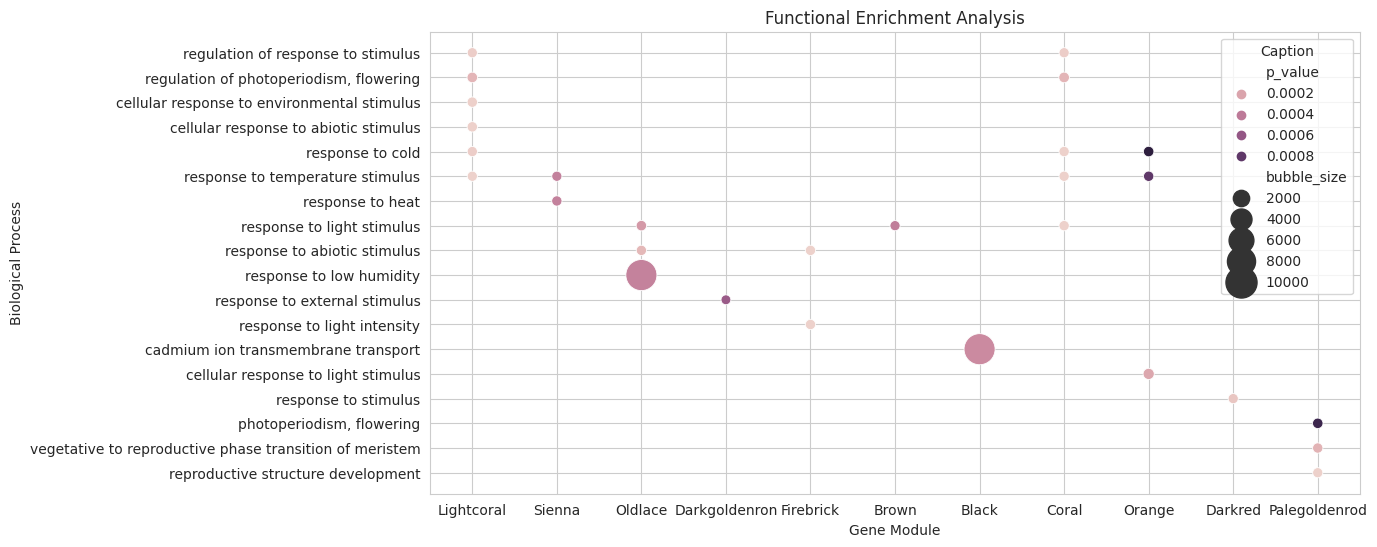

In [25]:
# Scale fold enrichment values for bubble size
scale_factor = 100
df['bubble_size'] = df['fold_enrichment'] * scale_factor

# Create the bubble plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Customize the bubble plot
bubble_plot = sns.scatterplot(
    y='biological_process',
    x='module_name',
    hue='p_value',  # Color based on biological process
    size='bubble_size',  # Size based on fold enrichment
    sizes=(50, 500),  # Adjust bubble size range as needed
    data=df,
)

# Add labels to axes
bubble_plot.set(ylabel='Biological Process', xlabel='Gene Module')

# Customize legend
bubble_plot.legend(title='Caption', loc='upper right')

# Show the plot
plt.title('Functional Enrichment Analysis')
plt.show()